# 📊 **ANALYSIS NOTEBOOK** 📊  
**Author:** *Luc Voorend*  
**Date:** *2025-05-20*

---

### 📘 **Description**  
This Jupyter notebook contains the code used to generate **all figures** in the *Results* section of the thesis.  
Its primary goal is to ensure **reproducibility** and to provide future Master's students working on this subject with clarity on **what exactly is shown in the graphs**.

> ⚠️ **Note:** The code has **not been cleaned or optimized** — it reflects the exact state used during the analysis phase.

---



In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sqlite3 as sql

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

In [5]:
#===============SET PARAMETERS FOR CUSTOM PLOTTING====================#

# Set the inside ticks to be default
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

# Set font size of x and y labels to be 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set custom color cycle
custom_colors = [    
    '#0081C8',  # Olynmpic Blue
    '#EE334E',  # Olynmpic Red
    '#00A651',  # Olympic Green
    '#FCB131', # Olympic Yellow
    '#ba55d3',  # Medium Orchid
    '#00ced1',  # Dark Turquoise
    '#a89078', #Pastel brown
    '#e9967a',  # Dark Salmon
    '#66cdaa',   # Medium Aquamarine
    '#db7093'  # Pale Violet Red
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

In [6]:
#===============FUNCTIONS====================#

# Function for binomial quantile confidence intervals, see thesis Appendix B.
def get_quantile_bounds(quantile = 0.5, N_samples = 1000):
    """
    Function to get the quantile bounds for a given quantile and number of samples:
        Assumes large enough sample size to approximate the quantile bounds of the binomial distribution with a normal distribution

    Input: 
    - quantile: float, the quantile to calculate the bounds for
    - N_samples: int, the number of samples to use in the calculation

    Output:
    - lower_bound: int, the index for lower bound of the quantile
    - upper_bound: int, the index for upper bound of the quantile
    """
    k_low = N_samples*quantile - np.sqrt(N_samples*quantile*(1-quantile))
    k_high = N_samples*quantile + np.sqrt(N_samples*quantile*(1-quantile))
    
    lower_bound = int(np.floor(k_low))
    upper_bound = int(np.ceil(k_high))
    
    return lower_bound, upper_bound

## 🔍 **Section 7.1: Event Selection**

In [8]:
# Load the predictions of the different models
# Predictions are done on all events in the validation set, no selection yet
pred_tc_cc = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22011/lepton_angle/TC_CC_101.csv')
pred_tc_cc_spline_less2 = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22011/lepton_angle/TC_CC_spline_less2_097.csv')
pred_spline_less2 = pd.read_csv("/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22011/lepton_angle/Spline_less_2_081.csv")

# Load the selections sets to create selection masks
event_no_total = pred_tc_cc['event_no']
tc_cc_selection = pd.read_csv('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/selection_files/snowstorm/22011/part_4/selection_CC_thorsten_cut.csv')
tc_cc_spline_less2_selection = pd.read_csv('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/selection_files/snowstorm/22011/part_4/selection_TC_CC_Spline_less_2.csv')
spline_less2_selection = pd.read_csv("/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/selection_files/snowstorm/22011/part_4/val_selection_opening_angle_less_2.csv")

# Create the selection masks
tc_cc_selection_mask = event_no_total.isin(tc_cc_selection.to_numpy().flatten())
tc_cc_spline_less2_selection_mask = event_no_total.isin(tc_cc_spline_less2_selection.to_numpy().flatten())
spline_less2_selection_mask = event_no_total.isin(spline_less2_selection.to_numpy().flatten())

# Print some information about the selection sets
print(f"Total number of events in the validation set: {len(event_no_total)} (22011 part 4)")
print("===================================================================")
print(f"Number of events passing the Thorsten Cut: {sum(tc_cc_selection_mask)}")
print(f"Number of events passing the Spline less than 2 cut: {sum(spline_less2_selection_mask)}")
print(f"Number of events passing the TC_CC Spline less than 2 cut: {sum(tc_cc_spline_less2_selection_mask)}")

FileNotFoundError: [Errno 2] No such file or directory: '/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22011/lepton_angle/TC_CC_101.csv'

In [ ]:
# Calculate the opening angles for the different models

# Select truth x, y, z from one of the prediction files (all files have the same truth values)
x_truth = pred_tc_cc['x_truth']
y_truth = pred_tc_cc['y_truth']
z_truth = pred_tc_cc['z_truth']

# Thorsten cut
x_tc_cc = pred_tc_cc['x_pred']
y_tc_cc = pred_tc_cc['y_pred']
z_tc_cc = pred_tc_cc['z_pred']

cos_opening_angle_tc_cc = (x_truth*x_tc_cc + y_truth*y_tc_cc + z_truth*z_tc_cc) / (np.sqrt(x_truth**2 + y_truth**2 + z_truth**2) * np.sqrt(x_tc_cc**2 + y_tc_cc**2 + z_tc_cc**2))
opening_angle_tc_cc = np.arccos(cos_opening_angle_tc_cc)
opening_angle_tc_cc = np.degrees(opening_angle_tc_cc)

# Spline less than 2 and Thorsten Cut
x_tc_cc_spline_less2 = pred_tc_cc_spline_less2['x_pred']
y_tc_cc_spline_less2 = pred_tc_cc_spline_less2['y_pred']
z_tc_cc_spline_less2 = pred_tc_cc_spline_less2['z_pred']

cos_opening_angle_tc_cc_spline_less2 = (x_truth*x_tc_cc_spline_less2 + y_truth*y_tc_cc_spline_less2 + z_truth*z_tc_cc_spline_less2) / (np.sqrt(x_truth**2 + y_truth**2 + z_truth**2) * np.sqrt(x_tc_cc_spline_less2**2 + y_tc_cc_spline_less2**2 + z_tc_cc_spline_less2**2))
opening_angle_tc_cc_spline_less2 = np.arccos(cos_opening_angle_tc_cc_spline_less2)
opening_angle_tc_cc_spline_less2 = np.degrees(opening_angle_tc_cc_spline_less2)

# Spline less than 2
x_spline_less_2 = pred_spline_less2['x_pred']
y_spline_less_2 = pred_spline_less2['y_pred']
z_spline_less_2 = pred_spline_less2['z_pred']

cos_opening_angle_spline_less_2 = (x_truth*x_spline_less_2 + y_truth*y_spline_less_2 + z_truth*z_spline_less_2) / (np.sqrt(x_truth**2 + y_truth**2 + z_truth**2) * np.sqrt(x_spline_less_2**2 + y_spline_less_2**2 + z_spline_less_2**2))
opening_angle_spline_less_2 = np.arccos(cos_opening_angle_spline_less_2)
opening_angle_spline_less_2 = np.degrees(opening_angle_spline_less_2)

### 

### 🖼️ **Figure 7.1**  
**Distribution of the opening angle** between the true lepton direction and the reconstructed lepton direction for models trained with different selection cuts on the training set.  
The models are validated on the same **uncut and uncleaned** validation set.  
The **median** of the models is indicated with a **dashed line** in the zoomed-in plot.


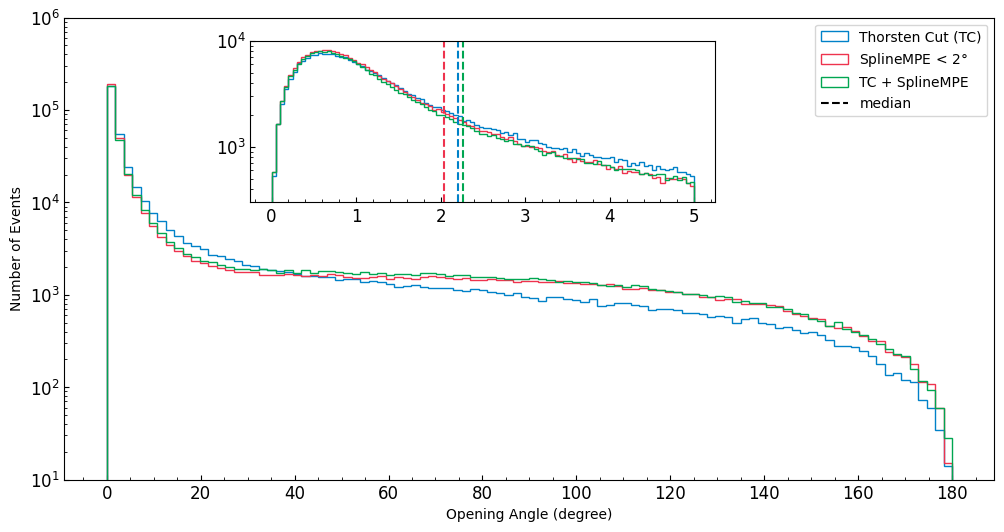

In [ ]:
# Plot the distribution of the opening angles for the different models with the selection cuts

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(opening_angle_tc_cc, bins=100, histtype='step', label='Thorsten Cut (TC)', range=(0, 180))
ax.hist(opening_angle_spline_less_2, bins=100, histtype='step', label='SplineMPE < $2\\degree$', range=(0, 180))
ax.hist(opening_angle_tc_cc_spline_less2, bins=100, histtype='step', label='TC + SplineMPE', range=(0, 180))
ax.set_xlabel('Opening Angle (degree)')
ax.set_ylabel('Number of Events')

ax.set_yscale('log')
ax.set_ylim(10, 1e6)

# add a black dashed line to the legend with label "median"
ax.plot([], linestyle='--', color='black', label='median')
ax.legend()

# add a second plot with the same x-axis and y-axis
ax2 = ax.inset_axes([0.2, 0.6, 0.5, 0.35])  # [x, y, width, height]
ax2.hist(opening_angle_tc_cc, bins=100, histtype='step', label='TC_CC', range=(0, 5))
ax2.hist(opening_angle_spline_less_2, bins=100, histtype='step', label='Spline_less_2', range=(0, 5))
ax2.hist(opening_angle_tc_cc_spline_less2, bins=100, histtype='step', label='TC_CC_spline_less2', range=(0, 5))
ax2.set_yscale('log')

# Set the y-axis limits for the inset plot
ax2.set_ylim(300, 1e4)

ax2.axvline(opening_angle_tc_cc.median(), color=custom_colors[0], linestyle='--')
ax2.axvline(opening_angle_spline_less_2.median(), color=custom_colors[1], linestyle='--')
ax2.axvline(opening_angle_tc_cc_spline_less2.median(), color=custom_colors[2], linestyle='--')

# ticks on primare axis every 20 degrees
ax.set_xticks(np.arange(0, 181, 20))

plt.show()

### 🖼️ **Figure 7.2**  
**2D Histograms of Angular Error Distributions**  

This figure presents **2D histograms** showing the **zenith** and **azimuthal angle error** distributions for various **event selection cuts**.  
The angle error is defined as **ψ<sub>true</sub> − ψ<sub>pred</sub>**.  
The **red cross** marks the **mode of the distribution**.


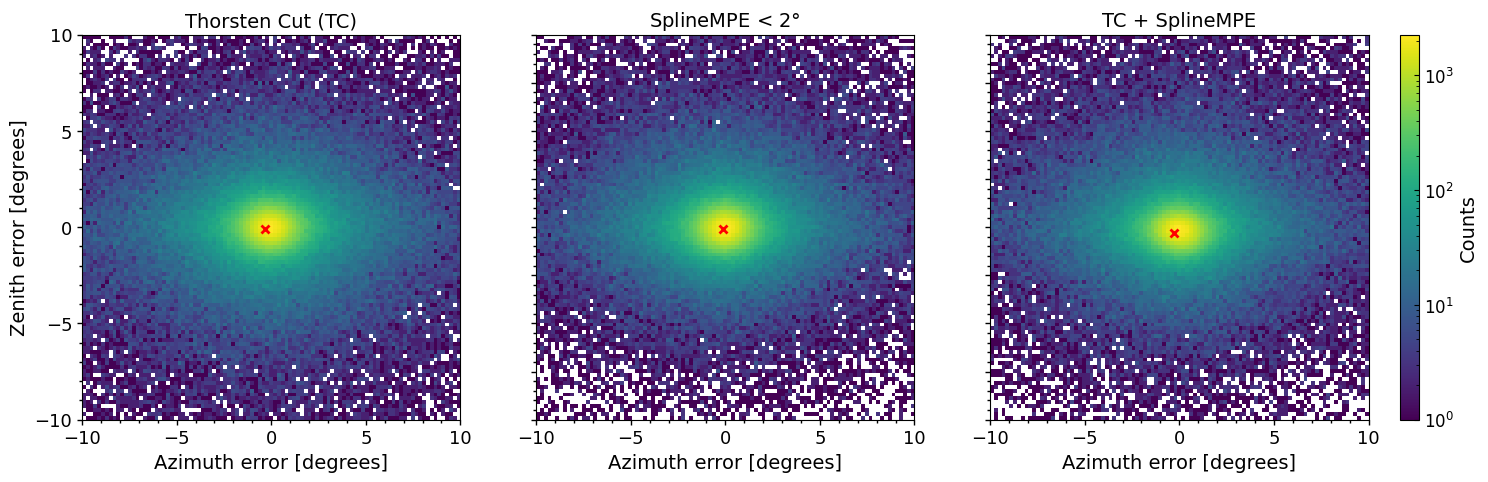

In [ ]:
# plot a 2D heatmap of azimuth and zenith opening angle for the three models
zenith_pred_tc_cc = np.arccos(z_tc_cc/np.sqrt(x_tc_cc**2 + y_tc_cc**2 + z_tc_cc**2))
zenith_truth = np.arccos(z_truth/np.sqrt(x_truth**2 + y_truth**2 + z_truth**2))
zenith_error_tc_cc = np.degrees(zenith_truth - zenith_pred_tc_cc)
azimuth_pred_tc_cc = np.arctan2(y_tc_cc, x_tc_cc)
azimuth_truth = np.arctan2(y_truth, x_truth)
azimuth_error_tc_cc = np.degrees(azimuth_truth - azimuth_pred_tc_cc)
# make sure azimuth error is between -180 and 180
azimuth_error_tc_cc = np.where(azimuth_error_tc_cc > 180, azimuth_error_tc_cc - 360, azimuth_error_tc_cc)

zenith_pred_tc_cc_spline_less2 = np.arccos(z_tc_cc_spline_less2/np.sqrt(x_tc_cc_spline_less2**2 + y_tc_cc_spline_less2**2 + z_tc_cc_spline_less2**2))
zenith_error_tc_cc_spline_less2 = np.degrees(zenith_truth - zenith_pred_tc_cc_spline_less2)
azimuth_pred_tc_cc_spline_less2 = np.arctan2(y_tc_cc_spline_less2, x_tc_cc_spline_less2)
azimuth_error_tc_cc_spline_less2 = np.degrees(azimuth_truth - azimuth_pred_tc_cc_spline_less2)
# make sure azimuth error is between -180 and 180
azimuth_error_tc_cc_spline_less2 = np.where(azimuth_error_tc_cc_spline_less2 > 180, azimuth_error_tc_cc_spline_less2 - 360, azimuth_error_tc_cc_spline_less2)

zenith_pred_spline_less_2 = np.arccos(z_spline_less_2/np.sqrt(x_spline_less_2**2 + y_spline_less_2**2 + z_spline_less_2**2))
zenith_error_spline_less_2 = np.degrees(zenith_truth - zenith_pred_spline_less_2)
azimuth_pred_spline_less_2 = np.arctan2(y_spline_less_2, x_spline_less_2)
azimuth_error_spline_less_2 = np.degrees(azimuth_truth - azimuth_pred_spline_less_2)
# make sure azimuth error is between -180 and 180
azimuth_error_spline_less_2 = np.where(azimuth_error_spline_less_2 > 180, azimuth_error_spline_less_2 - 360, azimuth_error_spline_less_2)

# plot the zenith and azimuth error for the three models
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# plot zenith error
zenith_bins = np.linspace(-10, 10, 100)
azimuth_bins = np.linspace(-10, 10, 100)
H_tc_cc, xedges, yedges = np.histogram2d(zenith_error_tc_cc, azimuth_error_tc_cc, bins=(zenith_bins, azimuth_bins))
H_tc_cc_spline_less2, xedges, yedges = np.histogram2d(zenith_error_tc_cc_spline_less2, azimuth_error_tc_cc_spline_less2, bins=(zenith_bins, azimuth_bins))
H_spline_less_2, xedges, yedges = np.histogram2d(zenith_error_spline_less_2, azimuth_error_spline_less_2, bins=(zenith_bins, azimuth_bins))

# find the mode of each histogram
H_tc_cc_mode = np.unravel_index(np.argmax(H_tc_cc), H_tc_cc.shape)
H_tc_cc_spline_less2_mode = np.unravel_index(np.argmax(H_tc_cc_spline_less2), H_tc_cc_spline_less2.shape)
H_spline_less_2_mode = np.unravel_index(np.argmax(H_spline_less_2), H_spline_less_2.shape)

# convert modes to zenith and azimuth errors
zenith_tc_cc_mode = yedges[H_tc_cc_mode[0]]
azimuth_tc_cc_mode = xedges[H_tc_cc_mode[1]]

zenith_tc_cc_spline_less2_mode = yedges[H_tc_cc_spline_less2_mode[0]]
azimuth_tc_cc_spline_less2_mode = xedges[H_tc_cc_spline_less2_mode[1]]

zenith_spline_less_2_mode = yedges[H_spline_less_2_mode[0]]
azimuth_spline_less_2_mode = xedges[H_spline_less_2_mode[1]]


# make the histograms masked where the value is 0
H_tc_cc = np.ma.masked_where(H_tc_cc == 0, H_tc_cc)
H_tc_cc_spline_less2 = np.ma.masked_where(H_tc_cc_spline_less2 == 0, H_tc_cc_spline_less2)
H_spline_less_2 = np.ma.masked_where(H_spline_less_2 == 0, H_spline_less_2)
# plot the histograms (zenith on y-axis, azimuth on x-axis)
axs[0].pcolormesh(yedges, xedges, H_tc_cc, cmap='viridis', norm=colors.LogNorm())
# plot a red cross at the mode of the histogram with a thickness of 2
axs[0].plot(azimuth_tc_cc_mode, zenith_tc_cc_mode, 'rx', markersize=6, markeredgewidth=2)
axs[0].set_xlabel('Azimuth error [degrees]', fontsize=14)
axs[0].set_ylabel('Zenith error [degrees]', fontsize=14)
axs[0].set_title('Thorsten Cut (TC)', fontsize=14)
axs[0].set_xlim(-10, 10)

# set y_ticks -10, -5, 0, 5, 10
axs[0].set_yticks(np.arange(-10, 11, 5))

# plot the histograms
axs[2].pcolormesh(yedges, xedges, H_tc_cc_spline_less2, cmap='viridis', norm=colors.LogNorm())
# plot a red cross at the mode of the histogram with a thickness of 2
axs[2].plot(azimuth_tc_cc_spline_less2_mode, zenith_tc_cc_spline_less2_mode, 'rx', markersize=6, markeredgewidth=2)
axs[2].set_xlabel('Azimuth error [degrees]', fontsize=14)
axs[2].set_title('TC + SplineMPE', fontsize=14)
axs[2].set_xlim(-10, 10)

axs[1].set_yticklabels([])

axs[1].pcolormesh(yedges, xedges, H_spline_less_2, cmap='viridis', norm=colors.LogNorm())
# plot a red cross at the mode of the histogram with a thickness of 2
axs[1].plot(azimuth_spline_less_2_mode, zenith_spline_less_2_mode, 'rx', markersize=6, markeredgewidth=2)
axs[1].set_xlabel('Azimuth error [degrees]', fontsize=14)
axs[1].set_title('SplineMPE < 2$\\degree$', fontsize=14)
axs[1].set_xlim(-10, 10)

axs[2].set_yticklabels([])

# set plot to use outer ticks
axs[0].tick_params(axis='both',  direction='out',  width=1, colors='black', labelsize=12)
axs[1].tick_params(axis='both',  direction='out',  width=1, colors='black', labelsize=12)
axs[2].tick_params(axis='both',  direction='out',  width=1, colors='black', labelsize=12)

# minor ticks
axs[0].tick_params(axis='both', which='minor', direction='out', width=1, colors='black')
axs[1].tick_params(axis='both', which='minor', direction='out', width=1, colors='black')
axs[2].tick_params(axis='both', which='minor', direction='out', width=1, colors='black')

# set tick label fontsize
axs[0].tick_params(axis='both', labelsize=13)
axs[1].tick_params(axis='both', labelsize=13)
axs[2].tick_params(axis='both', labelsize=13)

# add colorbar
cbar = fig.colorbar(axs[0].collections[0], ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Counts', fontsize=14)

plt.show()

In [ ]:
# Load truth information for binned performance
truth_parquet = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22011/truth_4.parquet"
truth = pd.read_parquet(truth_parquet)

true_energy = truth['energy']
zenith_truth = truth['zenith']
azimuth_truth = truth['azimuth']

### 🖼️ **Figure 7.3**  
**Median Opening Angle vs. Neutrino Energy**  

Median opening angle as a function of neutrino energy for models with different training selection cuts. Dots indicate the sample median, and shaded bands indicate the 1σ confidence interval on this median.



In [ ]:
# plot the median opening angle as a function of true energy for TC_CC, TC_CC_spline_less2 and Spline_less_2
energy_bins = np.logspace(4, 6, 9)
median_opening_angle_tc_cc = np.zeros(len(energy_bins)-1)
median_opening_angle_tc_cc_spline_less2 = np.zeros(len(energy_bins)-1)
median_opening_angle_spline_less_2 = np.zeros(len(energy_bins)-1)

# also track the 1 sigma uncertainty on the median
lower_bound_tc_cc = np.zeros(len(energy_bins)-1)
upper_bound_tc_cc = np.zeros(len(energy_bins)-1)
lower_bound_tc_cc_spline_less2 = np.zeros(len(energy_bins)-1)
upper_bound_tc_cc_spline_less2 = np.zeros(len(energy_bins)-1)
lower_bound_spline_less_2 = np.zeros(len(energy_bins)-1)
upper_bound_spline_less_2 = np.zeros(len(energy_bins)-1)

for i in range(len(energy_bins)-1):
    energy_mask = (true_energy > energy_bins[i]) & (true_energy <= energy_bins[i+1])
    # median without selection
    median_opening_angle_tc_cc[i] = opening_angle_tc_cc[energy_mask].median()
    median_opening_angle_tc_cc_spline_less2[i] = opening_angle_tc_cc_spline_less2[energy_mask].median()
    median_opening_angle_spline_less_2[i] = opening_angle_spline_less_2[energy_mask].median()

    counts = np.sum(energy_mask)
    # calculate the 1 sigma uncertainty on the median by using the quantile bounds function
    quantile = 0.5
    N_samples = counts

    k_low = N_samples*quantile - np.sqrt(N_samples*quantile*(1-quantile))
    k_high = N_samples*quantile + np.sqrt(N_samples*quantile*(1-quantile))

    sorted_opening_angle_tc_cc = np.sort(opening_angle_tc_cc[energy_mask])
    sorted_opening_angle_tc_cc_spline_less2 = np.sort(opening_angle_tc_cc_spline_less2[energy_mask])
    sorted_opening_angle_spline_less_2 = np.sort(opening_angle_spline_less_2[energy_mask])

    lower_bound_tc_cc[i] = sorted_opening_angle_tc_cc[int(k_low)]
    upper_bound_tc_cc[i] = sorted_opening_angle_tc_cc[int(k_high)]

    lower_bound_tc_cc_spline_less2[i] = sorted_opening_angle_tc_cc_spline_less2[int(k_low)]
    upper_bound_tc_cc_spline_less2[i] = sorted_opening_angle_tc_cc_spline_less2[int(k_high)]

    lower_bound_spline_less_2[i] = sorted_opening_angle_spline_less_2[int(k_low)]
    upper_bound_spline_less_2[i] = sorted_opening_angle_spline_less_2[int(k_high)]

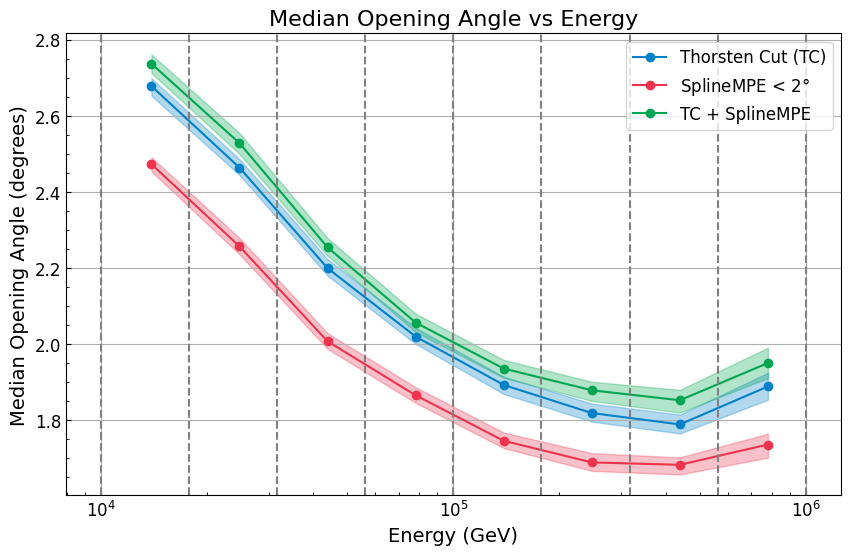

In [ ]:
# Plot the median opening angle as a function of energy
fig, ax = plt.subplots(figsize=(10, 6))
bin_centers = (energy_bins[:-1] + energy_bins[1:]) / 2
ax.plot(bin_centers, median_opening_angle_tc_cc, label='Thorsten Cut (TC)', marker='o')
ax.plot(bin_centers, median_opening_angle_spline_less_2, label='SplineMPE < 2$\\degree$', marker='o')
ax.plot(bin_centers, median_opening_angle_tc_cc_spline_less2, label='TC + SplineMPE', marker='o')

# color uncertainty bands in the same color as the lines
ax.fill_between(bin_centers, lower_bound_tc_cc, upper_bound_tc_cc, color=custom_colors[0], alpha=0.3)
ax.fill_between(bin_centers, lower_bound_tc_cc_spline_less2, upper_bound_tc_cc_spline_less2, color=custom_colors[2], alpha=0.3)
ax.fill_between(bin_centers, lower_bound_spline_less_2, upper_bound_spline_less_2, color=custom_colors[1], alpha=0.3)
ax.set_xlabel("Energy (GeV)", fontsize=14)
ax.set_ylabel("Median Opening Angle (degrees)", fontsize=14)
ax.set_xscale('log')
# legend upper right
ax.legend(loc='upper right', fontsize=12)
# add dashed lines for bin edges
for i in range(len(energy_bins)):
    ax.axvline(energy_bins[i], color='gray', linestyle='--')

ax.grid()
ax.set_title("Median Opening Angle vs Energy", fontsize=16)

# x and y labels to fontsize 14
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
plt.show()

### 🖼️ **Figure 7.4**  
**Median Opening Angle vs. True Azimuthal Direction**  

Median opening angle as a function of true azimuthal direction for models with different training selection cuts. Dots indicate the sample median, and shaded bands indicate the 1σ confidence interval on this median.


In [ ]:
# median opening angle binned in true azimuth
azimuth_bins = np.linspace(0, 2*np.pi, 10)
median_opening_angle_tc_cc_azimuth = np.zeros(len(azimuth_bins)-1)
median_opening_angle_spline_less_2_azimuth = np.zeros(len(azimuth_bins)-1)
median_opening_angle_tc_cc_spline_less2_azimuth = np.zeros(len(azimuth_bins)-1)
lower_bound_tc_cc_azimuth = np.zeros(len(azimuth_bins)-1)
upper_bound_tc_cc_azimuth = np.zeros(len(azimuth_bins)-1)
lower_bound_tc_cc_spline_less2_azimuth = np.zeros(len(azimuth_bins)-1)
upper_bound_tc_cc_spline_less2_azimuth = np.zeros(len(azimuth_bins)-1)
lower_bound_spline_less_2_azimuth = np.zeros(len(azimuth_bins)-1)
upper_bound_spline_less_2_azimuth = np.zeros(len(azimuth_bins)-1)

for i in range(len(azimuth_bins)-1):
    azimuth_mask = (azimuth_truth > azimuth_bins[i]) & (azimuth_truth <= azimuth_bins[i+1])
    # median without selection
    median_opening_angle_tc_cc_azimuth[i] = opening_angle_tc_cc[azimuth_mask].median()
    median_opening_angle_tc_cc_spline_less2_azimuth[i] = opening_angle_tc_cc_spline_less2[azimuth_mask].median()
    median_opening_angle_spline_less_2_azimuth[i] = opening_angle_spline_less_2[azimuth_mask].median()

    counts = np.sum(azimuth_mask)
    # calculate the 1 sigma uncertainty on the median by using the quantile bounds function
    quantile = 0.5
    N_samples = counts

    k_low = N_samples*quantile - np.sqrt(N_samples*quantile*(1-quantile))
    k_high = N_samples*quantile + np.sqrt(N_samples*quantile*(1-quantile))

    sorted_opening_angle_tc_cc = np.sort(opening_angle_tc_cc[azimuth_mask])
    sorted_opening_angle_tc_cc_spline_less2 = np.sort(opening_angle_tc_cc_spline_less2[azimuth_mask])
    sorted_opening_angle_spline_less_2 = np.sort(opening_angle_spline_less_2[azimuth_mask])

    lower_bound_tc_cc_azimuth[i] = sorted_opening_angle_tc_cc[int(k_low)]
    upper_bound_tc_cc_azimuth[i] = sorted_opening_angle_tc_cc[int(k_high)]

    lower_bound_tc_cc_spline_less2_azimuth[i] = sorted_opening_angle_tc_cc_spline_less2[int(k_low)]
    upper_bound_tc_cc_spline_less2_azimuth[i] = sorted_opening_angle_tc_cc_spline_less2[int(k_high)]

    lower_bound_spline_less_2_azimuth[i] = sorted_opening_angle_spline_less_2[int(k_low)]
    upper_bound_spline_less_2_azimuth[i] = sorted_opening_angle_spline_less_2[int(k_high)]


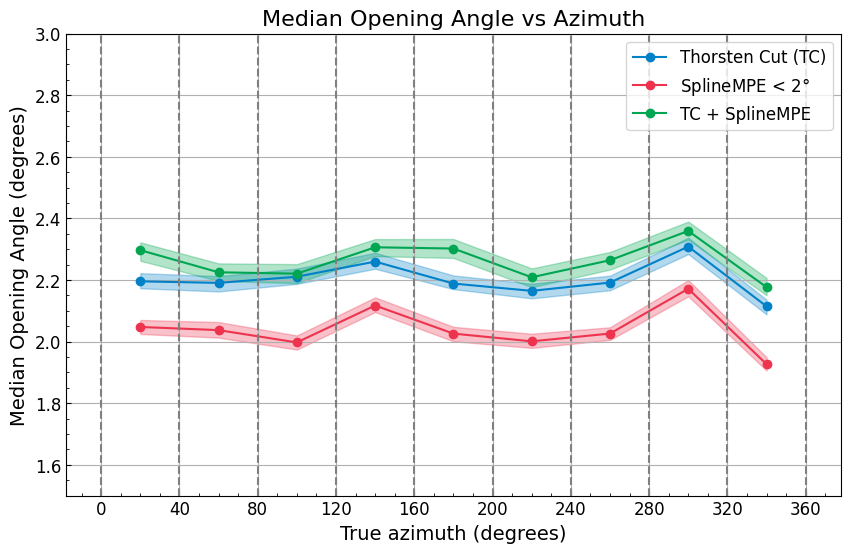

In [ ]:
# Plot the median opening angle as a function of azimuth
fig, ax = plt.subplots(figsize=(10, 6))
bin_centers = (azimuth_bins[:-1] + azimuth_bins[1:]) / 2
bin_centers = np.degrees(bin_centers)
ax.plot(bin_centers, median_opening_angle_tc_cc_azimuth, label='Thorsten Cut (TC)', marker='o')
ax.plot(bin_centers, median_opening_angle_spline_less_2_azimuth, label='SplineMPE < 2$\\degree$', marker='o')
ax.plot(bin_centers, median_opening_angle_tc_cc_spline_less2_azimuth, label='TC + SplineMPE', marker='o')
# color uncertainty bands in the same color as the lines
ax.fill_between(bin_centers, lower_bound_tc_cc_azimuth, upper_bound_tc_cc_azimuth, color=custom_colors[0], alpha=0.3)
ax.fill_between(bin_centers, lower_bound_tc_cc_spline_less2_azimuth, upper_bound_tc_cc_spline_less2_azimuth, color=custom_colors[2], alpha=0.3)
ax.fill_between(bin_centers, lower_bound_spline_less_2_azimuth, upper_bound_spline_less_2_azimuth, color=custom_colors[1], alpha=0.3)
ax.set_xlabel("True azimuth (degrees)", fontsize=14)
ax.set_ylabel("Median Opening Angle (degrees)", fontsize=14)
ax.set_title("Median Opening Angle vs Azimuth", fontsize=16)
ax.set_ylim(1.5, 3)
# dashed lines for bin edges
for i in range(len(azimuth_bins)):
    ax.axvline(np.degrees(azimuth_bins[i]), color='gray', linestyle='--')
ax.legend(loc='upper right', fontsize=12)
# set x-ticks every 40 degrees
ax.set_xticks(np.arange(-0, 361, 40))
ax.grid()
# x and y labels to fontsize 14
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
plt.show()

### 🖼️ **Figure 7.5**  
**Median Opening Angle vs. True Zenith Direction**  

Median opening angle as a function of true zenith direction for models with different training selection cuts. Dots indicate the sample median, and shaded bands indicate the 1σ confidence interval on this median.


In [ ]:
# make a plot binned in true zenith
zenith_bins = np.linspace(0, np.pi, 10)
median_opening_angle_tc_cc_zenith = np.zeros(len(zenith_bins)-1)
median_opening_angle_spline_less_2_zenith = np.zeros(len(zenith_bins)-1)
median_opening_angle_tc_cc_spline_less2_zenith = np.zeros(len(zenith_bins)-1)

lower_bound_tc_cc_zenith = np.zeros(len(zenith_bins)-1)
upper_bound_tc_cc_zenith = np.zeros(len(zenith_bins)-1)

lower_bound_tc_cc_spline_less2_zenith = np.zeros(len(zenith_bins)-1)
upper_bound_tc_cc_spline_less2_zenith = np.zeros(len(zenith_bins)-1)

lower_bound_spline_less_2_zenith = np.zeros(len(zenith_bins)-1)
upper_bound_spline_less_2_zenith = np.zeros(len(zenith_bins)-1)

for i in range(len(zenith_bins)-1):
    zenith_mask = (zenith_truth > zenith_bins[i]) & (zenith_truth <= zenith_bins[i+1])
    # median without selection
    median_opening_angle_tc_cc_zenith[i] = opening_angle_tc_cc[zenith_mask].median()
    median_opening_angle_tc_cc_spline_less2_zenith[i] = opening_angle_tc_cc_spline_less2[zenith_mask].median()
    median_opening_angle_spline_less_2_zenith[i] = opening_angle_spline_less_2[zenith_mask].median()

    counts = np.sum(zenith_mask)
    # calculate the 1 sigma uncertainty on the median by using the quantile bounds function
    quantile = 0.5
    N_samples = counts

    k_low = N_samples*quantile - np.sqrt(N_samples*quantile*(1-quantile))
    k_high = N_samples*quantile + np.sqrt(N_samples*quantile*(1-quantile))

    sorted_opening_angle_tc_cc = np.sort(opening_angle_tc_cc[zenith_mask])
    sorted_opening_angle_tc_cc_spline_less2 = np.sort(opening_angle_tc_cc_spline_less2[zenith_mask])
    sorted_opening_angle_spline_less_2 = np.sort(opening_angle_spline_less_2[zenith_mask])

    lower_bound_tc_cc_zenith[i] = sorted_opening_angle_tc_cc[int(k_low)]
    upper_bound_tc_cc_zenith[i] = sorted_opening_angle_tc_cc[int(k_high)]

    lower_bound_tc_cc_spline_less2_zenith[i] = sorted_opening_angle_tc_cc_spline_less2[int(k_low)]
    upper_bound_tc_cc_spline_less2_zenith[i] = sorted_opening_angle_tc_cc_spline_less2[int(k_high)]

    lower_bound_spline_less_2_zenith[i] = sorted_opening_angle_spline_less_2[int(k_low)]
    upper_bound_spline_less_2_zenith[i] = sorted_opening_angle_spline_less_2[int(k_high)]

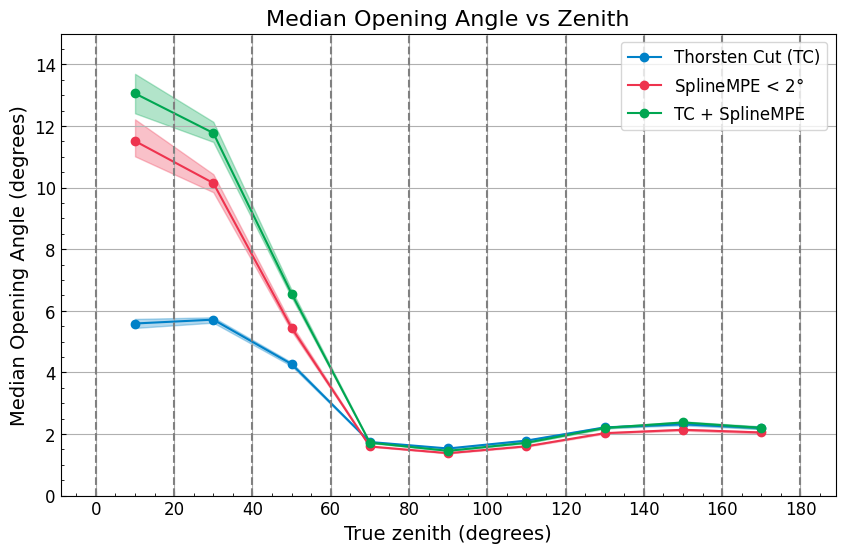

In [ ]:
# Plot the median opening angle as a function of zenith
fig, ax = plt.subplots(figsize=(10, 6))
bin_centers = (zenith_bins[:-1] + zenith_bins[1:]) / 2

bin_centers = np.degrees(bin_centers)
ax.plot(bin_centers, median_opening_angle_tc_cc_zenith, label='Thorsten Cut (TC)', marker='o')
ax.plot(bin_centers, median_opening_angle_spline_less_2_zenith, label='SplineMPE < 2$\\degree$', marker='o')
ax.plot(bin_centers, median_opening_angle_tc_cc_spline_less2_zenith, label='TC + SplineMPE', marker='o')
# color uncertainty bands in the same color as the lines
ax.fill_between(bin_centers, lower_bound_tc_cc_zenith, upper_bound_tc_cc_zenith, color=custom_colors[0], alpha=0.3)
ax.fill_between(bin_centers, lower_bound_tc_cc_spline_less2_zenith, upper_bound_tc_cc_spline_less2_zenith, color=custom_colors[2], alpha=0.3)
ax.fill_between(bin_centers, lower_bound_spline_less_2_zenith, upper_bound_spline_less_2_zenith, color=custom_colors[1], alpha=0.3)
ax.set_xlabel("True zenith (degrees)", fontsize=14)
ax.set_ylabel("Median Opening Angle (degrees)", fontsize=14)
ax.set_title("Median Opening Angle vs Zenith", fontsize=16)
ax.set_ylim(0, 15)
# dashed lines for bin edges
for i in range(len(zenith_bins)):
    ax.axvline(np.degrees(zenith_bins[i]), color='gray', linestyle='--')
ax.legend(loc='upper right', fontsize=12)
# set x-ticks every 20 degrees
ax.set_xticks(np.arange(0, 181, 20))

# x and y labels to fontsize 14
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax.grid()
plt.show()

### 🖼️ **Figure 7.6**  
**Opening Angle Distribution on Matched Selection**  

Distribution of the opening angle between the true lepton direction and the reconstructed lepton direction for models trained with different selection cuts on the training set. The models are validated on the subset of the total validation set that meets the same selection criteria as the training events. The distribution has significantly smaller tails than when validated on the raw validation set.


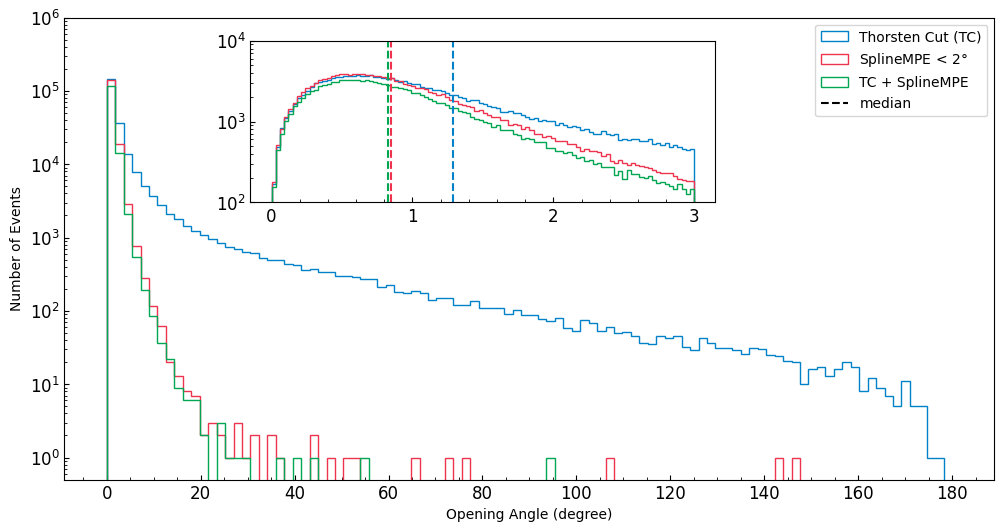

In [ ]:
# repeat with selection masks
opening_angle_tc_cc_selection = opening_angle_tc_cc[tc_cc_selection_mask]
opening_angle_tc_cc_spline_less2_selection = opening_angle_tc_cc_spline_less2[tc_cc_spline_less2_selection_mask]
opening_angle_spline_less_2_selection = opening_angle_spline_less_2[spline_less2_selection_mask]

# put the second plot as a mini-plot inside the first plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(opening_angle_tc_cc_selection, bins=100, histtype='step', label='Thorsten Cut (TC)', range=(0, 180))
ax.hist(opening_angle_spline_less_2_selection, bins=100, histtype='step', label='SplineMPE < $2\\degree$', range=(0, 180))
ax.hist(opening_angle_tc_cc_spline_less2_selection, bins=100, histtype='step', label='TC + SplineMPE', range=(0, 180))
ax.set_xlabel('Opening Angle (degree)')
ax.set_ylabel('Number of Events')
ax.set_yscale('log')
ax.set_ylim(0.5, 1e6)

# add a black dashed line to the legend with label "median"
ax.plot([], linestyle='--', color='black', label='median')
ax.legend()

# add a second plot with the same x-axis and y-axis
ax2 = ax.inset_axes([0.2, 0.6, 0.5, 0.35])  # [x, y, width, height]
ax2.hist(opening_angle_tc_cc_selection, bins=100, histtype='step', label='TC_CC', range=(0, 3))
ax2.hist(opening_angle_spline_less_2_selection, bins=100, histtype='step', label='Spline_less_2', range=(0, 3))
ax2.hist(opening_angle_tc_cc_spline_less2_selection, bins=100, histtype='step', label='TC_CC_spline_less2', range=(0, 3))

ax2.set_yscale('log')
ax2.set_ylim(100, 1e4)

ax2.axvline(opening_angle_tc_cc_selection.median(), color=custom_colors[0], linestyle='--')
ax2.axvline(opening_angle_spline_less_2_selection.median(), color=custom_colors[1], linestyle='--')
ax2.axvline(opening_angle_tc_cc_spline_less2_selection.median(), color=custom_colors[2], linestyle='--')

# x ticks every degree
ax2.set_xticks(np.arange(0, 4, 1))

# ticks on primare axis every 20 degrees
ax.set_xticks(np.arange(0, 181, 20))
plt.show()

## 📈 **Section 7.2: Transformer Scaling Laws**

In [ ]:
# Load performance for validation opening angle as function of data set size

# Local analysis with values directly copied
data_sizes = [100_000, 300_000, 500_000, 1_000_000, 2_000_000]
val_opening_angles = [2.7255570888519287, 1.9268136024475098, 1.6703494787216187, 1.4328579902648926, 1.2474106550216675]

### 🖼️ **Figure 7.7**  
**Scaling of Angular Reconstruction with Training Set Size**  

Performance of angular reconstruction for high energy IceCube events improves with increasing training set size. The performance follows a power law scaling, shown with a fit in red.


Power law fit: a=63.66053589685372, b=-0.27502232786116215


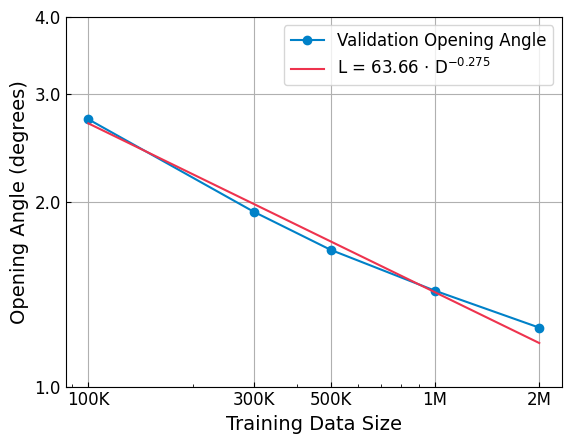

In [ ]:
# fit a power law to the data
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a *x**b

popt, pcov = curve_fit(power_law, data_sizes, val_opening_angles)
print(f"Power law fit: a={popt[0]}, b={popt[1]}")

# plot the power law fit
plt.figure()
plt.plot(data_sizes, val_opening_angles, marker='o',label="Validation Opening Angle")
# plot the power law fit, print the equation in the legend using superscript for the exponent
plt.plot(data_sizes, power_law(np.array(data_sizes), *popt), label=r'L = %.2f $\cdot$ D$^{%.3f}$' % tuple(popt))
plt.xlabel("Training Data Size", fontsize=14)
plt.ylabel("Opening Angle (degrees)", fontsize=14)
plt.legend(fontsize=12)

plt.yscale("log")
plt.xscale("log")
plt.grid()
xticks = [100_000, 300_000, 500_000, 1_000_000, 2_000_000]
xlabels = ["100K", "300K", "500K", "1M", "2M"]
yticks = [1.0,2.0,3.0,4.0]
plt.yticks(yticks, yticks)
plt.xticks(xticks, xlabels)

# enable minor ticks on y-axis
plt.minorticks_on()

plt.show()

### 🖼️ **Figure 7.8**  
**Log-Scaled Dataset Size vs. Angular Reconstruction Performance**  

Performance of angular reconstruction for high energy IceCube events as a function of dataset size, scaled with a natural logarithm and shifted on the x-axis. The data points are fit with an exponential decay plus a constant to get a rough estimate of the model capacity limitation L(N).



Exponential decay fit: a=1.5774235564653079, b=0.22940942010849172, c=-0.5696819618082192


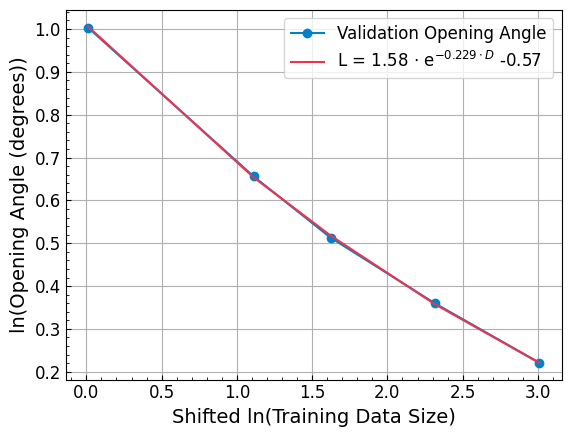

In [ ]:
log_val_opening_angles = np.log(val_opening_angles)
log_data_sizes = np.log(data_sizes)

log_data_sizes = log_data_sizes - 11.5*np.ones(len(log_data_sizes))

# fit an exponential decay with a constant offset to the data
from scipy.optimize import curve_fit
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# fit with inital guess a = 1.5, b = 0.25, c = -0.5
popt, pcov = curve_fit(exp_decay, log_data_sizes, log_val_opening_angles, p0=(1.5, 0.25, -0.5))
print(f"\nExponential decay fit: a={popt[0]}, b={popt[1]}, c={popt[2]}")

plt.figure()
plt.plot(log_data_sizes, log_val_opening_angles, marker='o',label="Validation Opening Angle")
# plot the exponential decay fit, print the equation in the legend using superscript for the exponent
plt.plot(log_data_sizes, exp_decay(log_data_sizes,1.58, 0.23, -0.57), label=r'L = %.2f $\cdot$ e$^{-%.3f \cdot D}$ %.2f' % tuple(popt))
plt.xlabel("Shifted ln(Training Data Size)", fontsize=14)
plt.ylabel("ln(Opening Angle (degrees))", fontsize=14)

plt.legend(fontsize=12)

plt.grid()
# enable minor ticks on y-axis
plt.minorticks_on()
plt.show()

In [ ]:
# Performance as function of model parameter size

# Analysis was done locally so performance numbers were directly copied
median_opening_angles = np.array([
    1.7489880323410034,  # 128, 4 (embedding, layers)
    1.638291597366333,   # 128, 6
    1.580162525177002,   # 128, 8
    1.6176153421401978,  # 256, 4
    1.6077864170074463,  # 256, 6
    1.5154283046722412,  # 256, 8
    1.5360780954360962,  # 512, 4
    1.3933910131454468,  # 512, 6
    1.3543634414672852,  # 512, 8 
])

layers = [4, 6, 8]
emb_dims = [128, 256, 512]
# create grid of all combinations of layers and embedding dimensions
layers = np.array(layers)
emb_dims = np.array(emb_dims)
lay = np.tile(layers, len(emb_dims))
emb = np.repeat(emb_dims, len(layers))

### 🖼️ **Figure 7.9**  
**Transformer Model Size vs. Median Opening Angle**  

Scaling of the median opening angle between the predicted direction and true neutrino direction as a function of transformer model size.


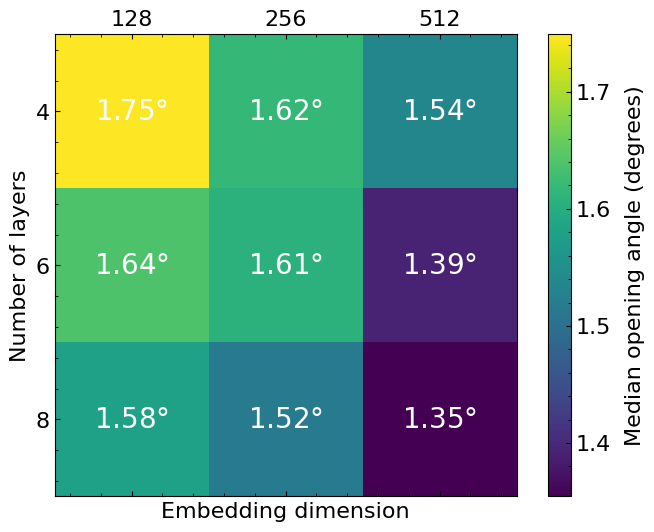

In [ ]:
# plot as a 3x3 heatmap
fig, ax = plt.subplots(figsize=(8, 6))
# reshape the data to a 3x3 grid
heatmap_data = median_opening_angles.reshape(len(layers), len(emb_dims))

# create a heatmap
cax = ax.matshow(heatmap_data.T, cmap='viridis')
# add color bar
cbar = fig.colorbar(cax)
# add a little space between the color bar annd its label
cbar.set_label('Median opening angle (degrees)', fontsize=16, labelpad=10)


# set colorbar ticks from 1.3 to 1.8 at 0.1 intervals
cbar.set_ticks(np.arange(1.4, 1.7, 0.1))
# set tick size to 16
cbar.ax.tick_params(labelsize=16)

# set x and y ticks to be the layer and embedding dimension values
ax.set_xticks(np.arange(len(emb_dims)))
ax.set_yticks(np.arange(len(layers)))

ax.set_xticklabels(emb_dims)
ax.set_yticklabels(layers)
# set tick label size to 16
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
# set x and y labels
ax.set_xlabel('Embedding dimension', fontsize=16)
ax.set_ylabel('Number of layers', fontsize=16)

# add text annotations for each cell
for i in range(len(layers)):
    for j in range(len(emb_dims)):
            ax.text(j, i, f'${heatmap_data[j, i]:.2f}\\degree$', ha='center', va='center', color='white', fontsize=20, weight='bold')

plt.show()

### 🖼️ **Figure 7.10**  
**Training Time Scaling with Transformer Model Size**  

Scaling of the training time as a function of transformer model size. Training times are normalized to the time of the smallest model.


In [ ]:
# Use average batch per second during training step (prevents influence of server downtime etc)
batch_per_second = [26.2, 19.7, 15.3, 17.7, 12.6, 9.8, 9.0, 6.3, 4.8] # 128_4, 128_6, 128_8, 256_4, 256_6, 256_8, 512_4, 512_6, 512_8
runtime = 1 / np.array(batch_per_second)
# normalize the runtime to the first value
runtime = runtime / runtime[0]

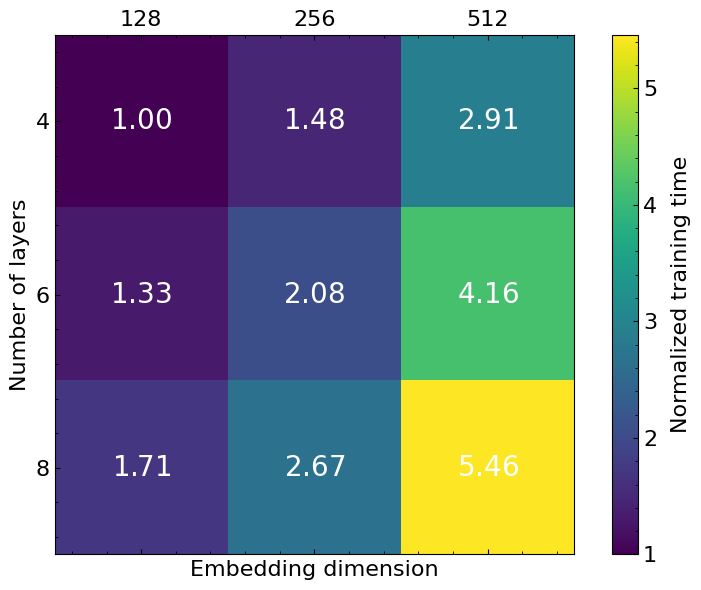

In [ ]:
# make a runtime heatmap
fig, ax = plt.subplots(figsize=(8, 6))
# reshape the data to a 3x3 grid
heatmap_runtime = runtime.reshape(len(layers), len(emb_dims))

# create a heatmap
cax = ax.matshow(heatmap_runtime.T, cmap='viridis')
# add color bar
cbar = fig.colorbar(cax)
# add a little space between the color bar annd its label
cbar.set_label('Normalized training time', fontsize=16, labelpad=10)

#set colorbar ticks from 1 to 5 at integer intervals
cbar.set_ticks(np.arange(1,6, 1))
# set tick label size to 16
cbar.ax.tick_params(labelsize=16)

# set x and y ticks to be the layer and embedding dimension values
ax.set_xticks(np.arange(len(emb_dims)))
ax.set_yticks(np.arange(len(layers)))
ax.set_xticklabels(emb_dims)
ax.set_yticklabels(layers)
# set tick label size to 16
ax.tick_params(axis='both', labelsize=16)
# set x and y labels
ax.set_xlabel('Embedding dimension', fontsize=16)
ax.set_ylabel('Number of layers', fontsize=16)


# add text annotations for each cell
for i in range(len(layers)):
    for j in range(len(emb_dims)):
        ax.text(j, i, f'${heatmap_runtime[j, i]:.2f}$', ha='center', va='center', color='white', fontsize=20, weight='bold')

fig.tight_layout()

## ⚡️🧿 **Section 7.3: Pulse Maps vs. PMT‑fication**

In [ ]:
# load predictions of the pulse and pmt models for the 22011 set
pulse_prediction = pd.read_csv("/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22011/neutrino/1Mil_Pulses4.csv")
pmt_prediction = pd.read_csv("/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22011/neutrino/1Mil_PMT.csv")

In [ ]:
# calculate the opening angle between the predicted and true values
x_pred_pulse = pulse_prediction['x_pred']
y_pred_pulse = pulse_prediction['y_pred']
z_pred_pulse = pulse_prediction['z_pred']

x_truth_pulse = pulse_prediction['x_truth']
y_truth_pulse = pulse_prediction['y_truth']
z_truth_pulse = pulse_prediction['z_truth']

x_pred_pmt = pmt_prediction['x_pred']
y_pred_pmt = pmt_prediction['y_pred']
z_pred_pmt = pmt_prediction['z_pred']

x_truth_pmt = pmt_prediction['x_truth'] # same as x_truth_pulse
y_truth_pmt = pmt_prediction['y_truth'] # same as y_truth_pulse
z_truth_pmt = pmt_prediction['z_truth'] # same as z_truth_pulse

cos_opening_angle_pulse = (x_pred_pulse*x_truth_pulse + y_pred_pulse*y_truth_pulse + z_pred_pulse*z_truth_pulse) / (np.sqrt(x_pred_pulse**2 + y_pred_pulse**2 + z_pred_pulse**2) * np.sqrt(x_truth_pulse**2 + y_truth_pulse**2 + z_truth_pulse**2))
cos_opening_angle_pulse = np.clip(cos_opening_angle_pulse, -1, 1)
opening_angle_pulse = np.arccos(cos_opening_angle_pulse)
opening_angle_pulse = np.degrees(opening_angle_pulse)

cos_opening_angle_pmt = (x_pred_pmt*x_truth_pmt + y_pred_pmt*y_truth_pmt + z_pred_pmt*z_truth_pmt) / (np.sqrt(x_pred_pmt**2 + y_pred_pmt**2 + z_pred_pmt**2) * np.sqrt(x_truth_pmt**2 + y_truth_pmt**2 + z_truth_pmt**2))
cos_opening_angle_pmt = np.clip(cos_opening_angle_pmt, -1, 1)
opening_angle_pmt = np.arccos(cos_opening_angle_pmt)
opening_angle_pmt = np.degrees(opening_angle_pmt)

In [ ]:
# Load the Thorsten Cut selection to create the selection mask
truth_total = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22011/truth_4.parquet"
truth_TC_CC = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered/Snowstorm/CC_CRclean_MuonLike/22011/truth_4.parquet"
truth_total = pd.read_parquet(truth_total)
truth_TC_CC = pd.read_parquet(truth_TC_CC)

# create a mask for the TC_CC events
TC_CC_mask = truth_total['event_no'].isin(truth_TC_CC['event_no'])

# Print summary
print(f"Total number of events: {len(truth_total)}")
print(f"Number of TC_CC events: {len(truth_TC_CC)}")

Total number of events: 404014
Number of TC_CC events: 237393


### 🖼️ **Figure 7.11**  
**Opening Angle Distribution for Pulse Maps vs. PMTs**  

Distribution of the opening angle between the predicted and true neutrino direction for a transformer model trained on events represented as pulse maps versus PMTs. The distribution is truncated at 5°. The dashed lines indicate the median of the full distributions.


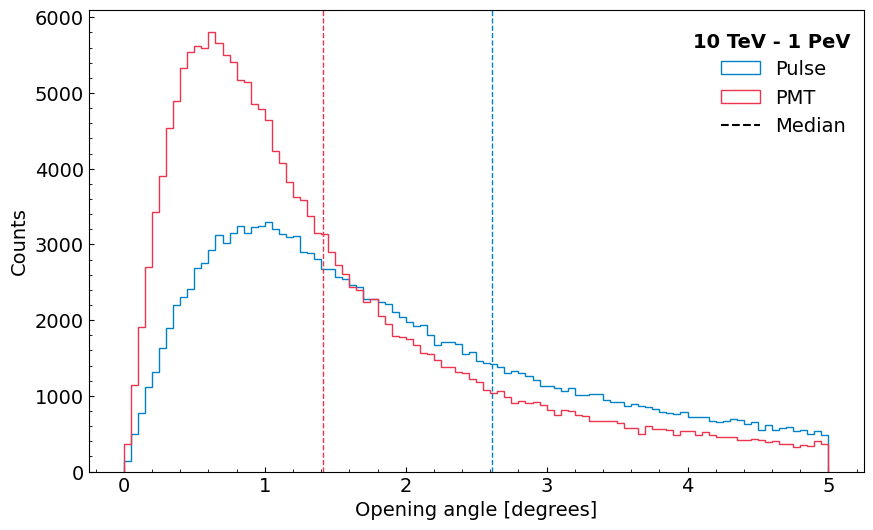

In [ ]:
# plot the distribution of the opening angle for both the pulse and PMT prediction in the same plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(opening_angle_pulse[TC_CC_mask], bins=100, range=(0, 5), histtype='step', color=custom_colors[0], label = "Pulse")
ax.hist(opening_angle_pmt[TC_CC_mask], bins=100, range=(0, 5), histtype='step', color=custom_colors[1], label = "PMT")

ax.set_xlabel("Opening angle [degrees]", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1, 0.93), frameon=False)
plt.text(0.78, 0.95, "10 TeV - 1 PeV", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')

# plot vertical dashed lines for the median
ax.axvline(opening_angle_pmt[TC_CC_mask].median(), color=custom_colors[1], linestyle='dashed', linewidth=1)
ax.axvline(opening_angle_pulse[TC_CC_mask].median(), color=custom_colors[0], linestyle='dashed', linewidth=1)

# add black dashed line to legend
ax.plot([], [], 'k--', label='Median')
ax.legend(loc="upper right", bbox_to_anchor=(1, 0.93), frameon=False, fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 🖼️ **Figure 7.12**  
**Median Opening Angle vs. Pulses per Event**  

Median opening angle as a function of pulses per event for a transformer trained on pulse maps or PMT-fied data. The training data is in the energy range 10 TeV − 1 PeV. The models were truncated to a maximum sequence length of 256 during training, indicated by the black dashed line. The bottom plot shows the ratio in median of the PMT model to the pulse model.


In [ ]:
pulse_data_path_22011 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22011/merged_part_4.db"

#===============LOAD DATA====================#
conn = sql.connect(pulse_data_path_22011)
query = "SELECT event_no FROM SRTInIcePulses"
data_pulse_22011 = pd.read_sql(query, conn)
conn.close()

num_pulses_per_event_22011 = data_pulse_22011['event_no'].value_counts(sort=False).values

In [ ]:
# plot opening angle binned in number of pulses per event
pulse_bins = np.logspace(1, 5, 10)

median_opening_angle_pmt_pulses = []
median_opening_angle_pulse_pulses = []
counts_per_bin = []

upper_bounds_pmt = []
lower_bounds_pmt = []

upper_bounds_pulse = []
lower_bounds_pulse = []

quantile = 0.5


for i in range(len(pulse_bins)-1):
    mask = (num_pulses_per_event_22011 > pulse_bins[i]) & (num_pulses_per_event_22011 < pulse_bins[i+1])
    N_samples = np.sum(mask)
    counts_per_bin.append(N_samples)

    median_opening_angle_pmt_pulses.append(np.median(opening_angle_pmt[mask]))
    median_opening_angle_pulse_pulses.append(np.median(opening_angle_pulse[mask]))

    sorted_opening_angle_pmt = np.sort(opening_angle_pmt[mask])
    sorted_opening_angle_pulse = np.sort(opening_angle_pulse[mask])

    k_low = N_samples*quantile - np.sqrt(N_samples*quantile*(1-quantile))
    k_high = N_samples*quantile + np.sqrt(N_samples*quantile*(1-quantile))

    lower_bounds_pmt.append(sorted_opening_angle_pmt[int(k_low)])
    upper_bounds_pmt.append(sorted_opening_angle_pmt[int(k_high)])

    lower_bounds_pulse.append(sorted_opening_angle_pulse[int(k_low)])
    upper_bounds_pulse.append(sorted_opening_angle_pulse[int(k_high)])

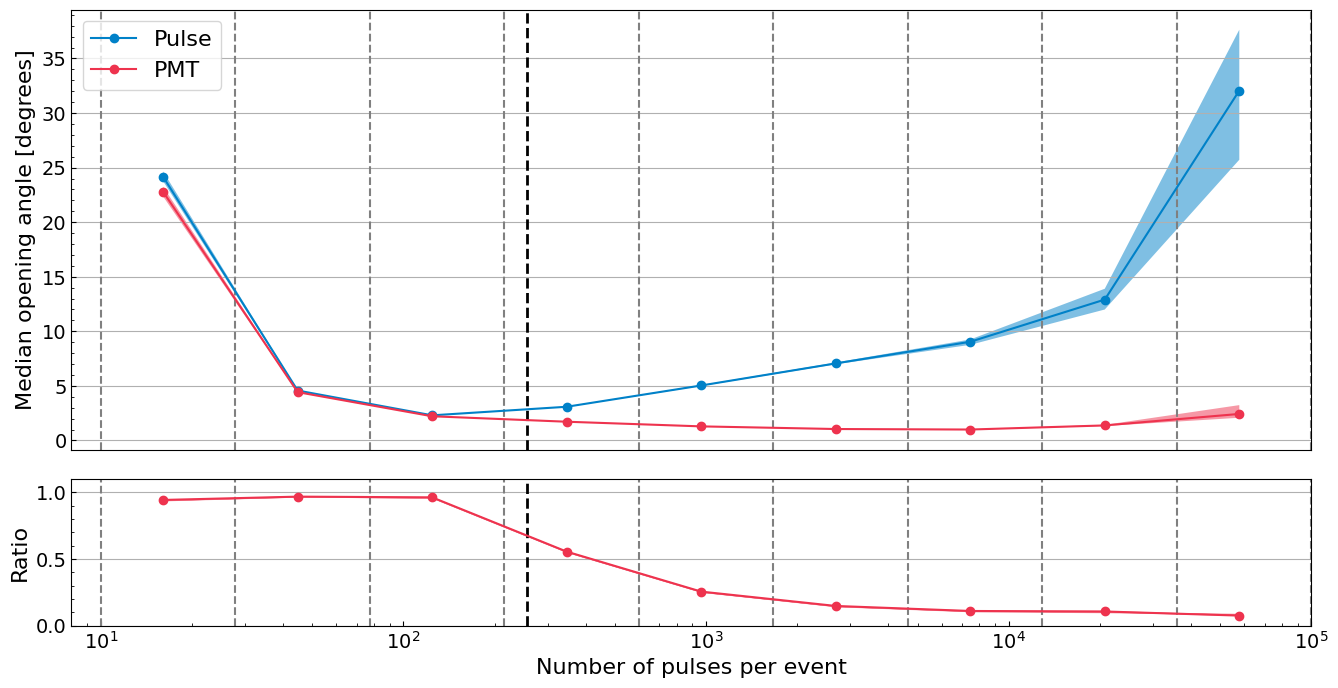

In [ ]:
#Create figure and GridSpec with correct height ratios
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2], hspace=0.1)

# Create subplots with GridSpec
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Vertical dashed lines at bin edges
for pulse_bin in pulse_bins:
    if pulse_bin != 256:
        ax1.axvline(pulse_bin, color='gray', linestyle='--')

# draw thick black dashed line at 256
ax1.axvline(256, color='black', linestyle='--', linewidth=2)

bin_centers = (pulse_bins[:-1] + pulse_bins[1:]) / 2
bin_centers = bin_centers*0.85

# Plot median opening angle
ax1.plot(bin_centers, median_opening_angle_pulse_pulses, '-o', label='Pulse')
ax1.plot(bin_centers, median_opening_angle_pmt_pulses, '-o', label='PMT')
ax1.fill_between(bin_centers, lower_bounds_pulse, upper_bounds_pulse, alpha=0.5)
ax1.fill_between(bin_centers, lower_bounds_pmt, upper_bounds_pmt, alpha=0.5)
ax1.set_ylabel('Median opening angle [degrees]', fontsize=16)
ax1.legend(loc="upper left", fontsize=16)
ax1.set_xscale('log')
ax1.set_xlim(8, 1e5)

ax1.grid(axis='y')

ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# set tick size to 14
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Plot relative performance
median_opening_angle_pmt_pulses = np.array(median_opening_angle_pmt_pulses)
median_opening_angle_pulse_pulses = np.array(median_opening_angle_pulse_pulses)
baseline = median_opening_angle_pulse_pulses / median_opening_angle_pulse_pulses
# relative performance
relative = median_opening_angle_pmt_pulses / median_opening_angle_pulse_pulses
error_on_relative_upper = 1/median_opening_angle_pulse_pulses * (upper_bounds_pmt - median_opening_angle_pmt_pulses) - median_opening_angle_pmt_pulses / median_opening_angle_pulse_pulses**2 * (upper_bounds_pulse - median_opening_angle_pulse_pulses)
error_on_relative_lower = 1/median_opening_angle_pulse_pulses * (median_opening_angle_pmt_pulses - lower_bounds_pmt) - median_opening_angle_pmt_pulses / median_opening_angle_pulse_pulses**2 * (median_opening_angle_pulse_pulses - lower_bounds_pulse)

# Vertical dashed lines at bin edges
for pulse_bin in pulse_bins:
    if pulse_bin != 256:
        ax2.axvline(pulse_bin, color='gray', linestyle='--')

# draw thick black dashed line at 256
ax2.axvline(256, color='black', linestyle='--', linewidth=2)

ax2.plot(bin_centers, relative, '-o', color=custom_colors[1])
ax2.fill_between(bin_centers, relative - error_on_relative_lower, relative + error_on_relative_upper, 
                 alpha=0.5, color=custom_colors[1])
ax2.set_ylabel('Ratio', fontsize=16)
ax2.set_xlabel('Number of pulses per event', fontsize=16)
ax2.set_xscale('log')
ax2.set_ylim(0, 1.1)

# set tick size to 14
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)

# Enable grid on y-axis of relative performance plot
ax2.grid(axis='y')

# Show plot
plt.show()

### 🖼️ **Figure 7.13**  
**Median Opening Angle vs. PMTs per Event**  

Median opening angle of the PMT-fied transformer model as a function of PMTs per event before padding or truncation. The training data is in the energy range 10 TeV − 1 PeV. The model was truncated to a maximum sequence length of 256 PMTs during training, indicated by the black dashed line.


In [ ]:
truth_Ndoms = truth_total['N_doms']

# plot as function of number of DOMs
dom_bins = np.array([8,16, 32, 64, 128, 256, 512, 1024, 2048])

median_opening_angle_pmt_doms = []
counts_per_bin = []

upper_bound_pmt_doms = []
lower_bound_pmt_doms = []

quantile = 0.5

for i in range(len(dom_bins)-1):
    mask = (truth_Ndoms > dom_bins[i]) & (truth_Ndoms < dom_bins[i+1])
    mask = mask & TC_CC_mask
    counts = np.sum(mask)

    median_opening_angle_pmt_doms.append(np.median(opening_angle_pmt[mask]))
    counts_per_bin.append(np.sum(mask))

    lower_bound, upper_bound = get_quantile_bounds(quantile, counts)
    sorted_opening_angle_pmt = np.sort(opening_angle_pmt[mask])
    lower_bound_pmt_doms.append(sorted_opening_angle_pmt[lower_bound])
    upper_bound_pmt_doms.append(sorted_opening_angle_pmt[upper_bound])

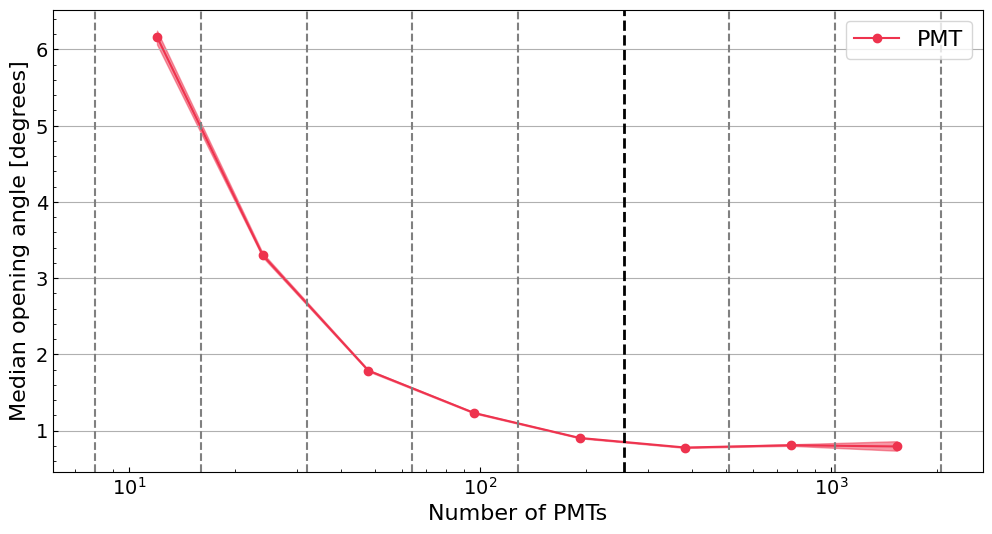

In [ ]:
bin_centers = (dom_bins[:-1] + dom_bins[1:]) / 2

plt.figure(figsize=(12, 6))
plt.plot(bin_centers, median_opening_angle_pmt_doms, '-o', label='PMT', color=custom_colors[1])
plt.fill_between(bin_centers, lower_bound_pmt_doms, upper_bound_pmt_doms, alpha=0.5, color=custom_colors[1])
#plt.plot(bin_centers, median_opening_angle_pulse_doms, '-o',label='Pulse')
plt.xlabel('Number of PMTs', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Median opening angle [degrees]', fontsize=16)
plt.legend(fontsize=16)
plt.xscale('log')

# vertical dashed lines at bin edges
for i in range(len(dom_bins)):
    if dom_bins[i] == 256:
        plt.axvline(dom_bins[i], color='black', linestyle='--', linewidth=2)
    else:
        plt.axvline(dom_bins[i], color='gray', linestyle='--')

plt.grid(axis='y')
plt.show()

### 🖼️ **Figure 7.14**  
**Median Opening Angle vs. True Neutrino Energy**  

Median opening angle of the PMT-fied and pulse map transformer models as a function of true neutrino energy. The training and validation data is in the energy range 10 TeV − 1 PeV.


In [ ]:
truth_energy = truth_total['energy']

# plot histogram of median opening angle pmt and pulse, binned in energy
energy_bins = np.logspace(4, 6, 9)

median_opening_angle_pmt = []
median_opening_angle_pulse = []

counts_per_bin = []

upper_bound_pmt = []
lower_bound_pmt = []    

upper_bound_pulse = []
lower_bound_pulse = []

quantile = 0.5


for i in range(len(energy_bins)-1):
    mask = (truth_energy > energy_bins[i]) & (truth_energy < energy_bins[i+1])
    mask = mask & TC_CC_mask
    counts = np.sum(mask)
    counts_per_bin.append(counts)

    median_opening_angle_pmt.append(np.median(opening_angle_pmt[mask]))
    median_opening_angle_pulse.append(np.median(opening_angle_pulse[mask]))

    lower_bound, upper_bound = get_quantile_bounds(quantile, counts)

    sorted_opening_angle_pmt = np.sort(opening_angle_pmt[mask])
    sorted_opening_angle_pulse = np.sort(opening_angle_pulse[mask])

    lower_bound_pmt.append(sorted_opening_angle_pmt[lower_bound])
    upper_bound_pmt.append(sorted_opening_angle_pmt[upper_bound])

    lower_bound_pulse.append(sorted_opening_angle_pulse[lower_bound])
    upper_bound_pulse.append(sorted_opening_angle_pulse[upper_bound])

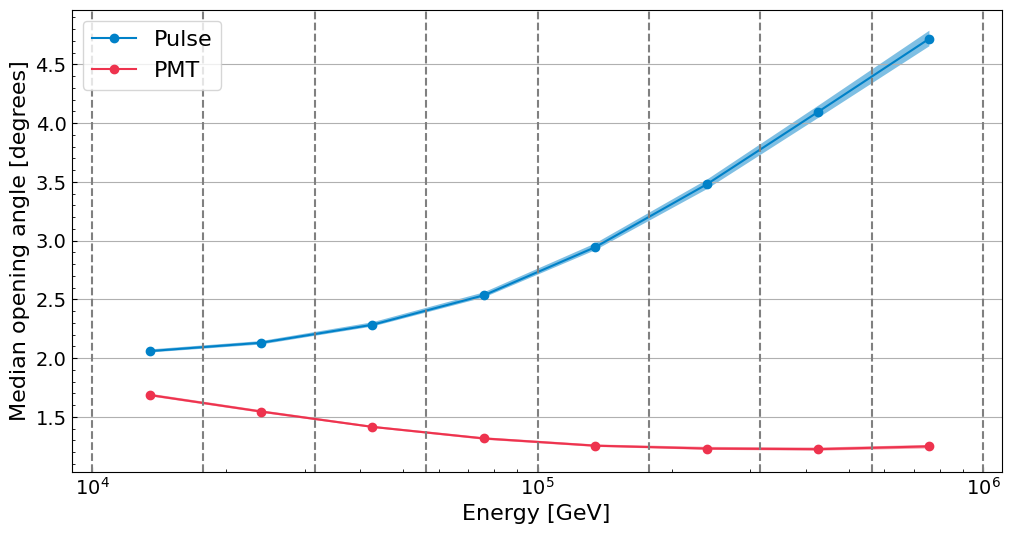

In [ ]:
bin_centers = (energy_bins[:-1] + energy_bins[1:]) / 2
bin_centers = 0.97*bin_centers

plt.figure(figsize=(12, 6))
plt.plot(bin_centers, median_opening_angle_pulse, '-o',label='Pulse')
plt.plot(bin_centers, median_opening_angle_pmt, '-o', label='PMT')

plt.fill_between(bin_centers, lower_bound_pulse, upper_bound_pulse, alpha=0.5)
plt.fill_between(bin_centers, lower_bound_pmt, upper_bound_pmt, alpha=0.5)

plt.xscale('log')
plt.xlabel('Energy [GeV]', fontsize=16)
plt.ylabel('Median opening angle [degrees]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", fontsize=16)
plt.xlim(9e3, 1.1e6)

# vertical dashed lines at bin edges
for i in range(len(energy_bins)):
    plt.axvline(energy_bins[i], color='gray', linestyle='--')

plt.grid(axis='y')
plt.show()

In [ ]:
# Load the predictions for the 22010 set (first 500k events)
pulse_pred_22010 = pd.read_csv("/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22010/neutrino/1Mil_Pulses4_500.csv")
pmt_pred_22010 = pd.read_csv("/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22010/neutrino/1Mil_PMT_truth4_500k.csv")

In [ ]:
# calculate the opening angle between the predicted and true values
x_pred_pulse_22010 = pulse_pred_22010['x_pred']
y_pred_pulse_22010 = pulse_pred_22010['y_pred']
z_pred_pulse_22010 = pulse_pred_22010['z_pred']

x_pred_pmt_22010 = pmt_pred_22010['x_pred']
y_pred_pmt_22010 = pmt_pred_22010['y_pred']
z_pred_pmt_22010 = pmt_pred_22010['z_pred']

x_truth = pmt_pred_22010['x_truth']
y_truth = pmt_pred_22010['y_truth']
z_truth = pmt_pred_22010['z_truth']

cos_opening_angle_pulse_22010 = (x_pred_pulse_22010*x_truth + y_pred_pulse_22010*y_truth + z_pred_pulse_22010*z_truth) / (np.sqrt(x_pred_pulse_22010**2 + y_pred_pulse_22010**2 + z_pred_pulse_22010**2) * np.sqrt(x_truth**2 + y_truth**2 + z_truth**2))
cos_opening_angle_pmt_22010 = (x_pred_pmt_22010*x_truth + y_pred_pmt_22010*y_truth + z_pred_pmt_22010*z_truth) / (np.sqrt(x_pred_pmt_22010**2 + y_pred_pmt_22010**2 + z_pred_pmt_22010**2) * np.sqrt(x_truth**2 + y_truth**2 + z_truth**2))

cos_opening_angle_pulse_22010 = np.clip(cos_opening_angle_pulse_22010, -1, 1)
cos_opening_angle_pmt_22010 = np.clip(cos_opening_angle_pmt_22010, -1, 1)

opening_angle_pulse_22010 = np.arccos(cos_opening_angle_pulse_22010)
opening_angle_pmt_22010 = np.arccos(cos_opening_angle_pmt_22010)

opening_angle_pulse_22010 = np.degrees(opening_angle_pulse_22010)
opening_angle_pmt_22010 = np.degrees(opening_angle_pmt_22010)

In [ ]:
truth_total_22010 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22010/truth_4.parquet"
truth_TC_CC_22010 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered/Snowstorm/CC_CRclean_MuonLike/22010/truth_4.parquet"
truth_total_22010 = pd.read_parquet(truth_total_22010)
truth_total_22010 = truth_total_22010[:500000]
truth_TC_CC_22010 = pd.read_parquet(truth_TC_CC_22010)
TC_CC_mask_22010 = truth_total_22010['event_no'].isin(truth_TC_CC_22010['event_no'])

# print summary
print(f"Total number of events: {len(truth_total_22010)}")
print(f"Number of TC_CC events: {sum(TC_CC_mask_22010)}")

Total number of events: 500000
Number of TC_CC events: 212811


### 🖼️ **Figure 7.15**  
**Opening Angle Distribution for Pulse Maps vs. PMTs**  

Distribution of the opening angle between the predicted and true neutrino direction for a transformer model trained on events represented as pulse maps versus PMTs. The distribution is truncated at 15°. The dashed lines indicate the median of the full distributions.


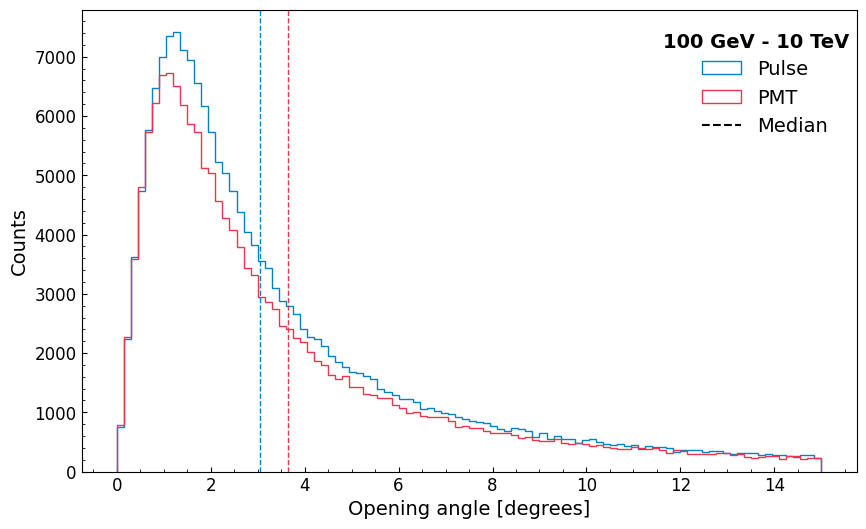

In [ ]:
# plot the distribution of the opening angle for both the pulse and PMT prediction in the same plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(opening_angle_pulse_22010[TC_CC_mask_22010], bins=100, range=(0, 15), histtype='step', color=custom_colors[0], label = "Pulse")
ax.hist(opening_angle_pmt_22010[TC_CC_mask_22010], bins=100, range=(0, 15), histtype='step', color=custom_colors[1], label = "PMT")


ax.set_xlabel("Opening angle [degrees]", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)

plt.text(0.75, 0.95, "100 GeV - 10 TeV", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')

# plot vertical dashed lines for the median
ax.axvline(opening_angle_pmt_22010[TC_CC_mask_22010].median(), color=custom_colors[1], linestyle='dashed', linewidth=1)
ax.axvline(opening_angle_pulse_22010[TC_CC_mask_22010].median(), color=custom_colors[0], linestyle='dashed', linewidth=1)

# add black dashed line to legend
ax.plot([], [], 'k--', label='Median')
ax.legend(loc="upper right", bbox_to_anchor=(0.985, 0.93), frameon=False, fontsize=14)
plt.show()

### 🖼️ **Figure 7.16**  
**Median Opening Angle vs. Pulses per Event**  

Median opening angle as a function of pulses per event for a transformer trained on pulse maps or PMT-fied data. The training data is in the energy range 100 GeV − 10 TeV. The models were truncated to a maximum sequence length of 256 during training, indicated by the black dashed line. The bottom plot shows the ratio in median of the PMT model to the pulse model.


In [ ]:
pulse_data_path_22010 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22010/merged_part_4.db"

#===============LOAD DATA====================#
conn = sql.connect(pulse_data_path_22010)
query = "SELECT event_no FROM SRTInIcePulses LIMIT 30_000_000"
data_pulse_22010 = pd.read_sql(query, conn)
conn.close()

num_pulses_per_event_22010 = data_pulse_22010['event_no'].value_counts(sort=False).values
num_pulses_per_event_22010 = num_pulses_per_event_22010[:500000]

In [ ]:
# plot as function of number of pulses per event
pulse_bins = np.array([8,16, 32, 64, 128, 256, 512, 1024, 2048])

median_opening_angle_pmt_pulses = []
median_opening_angle_pulse_pulses = []
counts_per_bin = []

upper_bounds_pmt = []
lower_bounds_pmt = []

upper_bounds_pulse = []
lower_bounds_pulse = []

quantile = 0.5


for i in range(len(pulse_bins)-1):
    mask = (num_pulses_per_event_22010 > pulse_bins[i]) & (num_pulses_per_event_22010 < pulse_bins[i+1])
    mask = mask & TC_CC_mask_22010
    N_samples = np.sum(mask)
    counts_per_bin.append(N_samples)

    median_opening_angle_pmt_pulses.append(np.median(opening_angle_pmt_22010[mask]))
    median_opening_angle_pulse_pulses.append(np.median(opening_angle_pulse_22010[mask]))

    sorted_opening_angle_pmt_22010 = np.sort(opening_angle_pmt_22010[mask])
    sorted_opening_angle_pulse_22010 = np.sort(opening_angle_pulse_22010[mask])

    k_low = N_samples*quantile - np.sqrt(N_samples*quantile*(1-quantile))
    k_high = N_samples*quantile + np.sqrt(N_samples*quantile*(1-quantile))

    lower_bounds_pmt.append(sorted_opening_angle_pmt_22010[int(k_low)])
    upper_bounds_pmt.append(sorted_opening_angle_pmt_22010[int(k_high)])

    lower_bounds_pulse.append(sorted_opening_angle_pulse_22010[int(k_low)])
    upper_bounds_pulse.append(sorted_opening_angle_pulse_22010[int(k_high)])

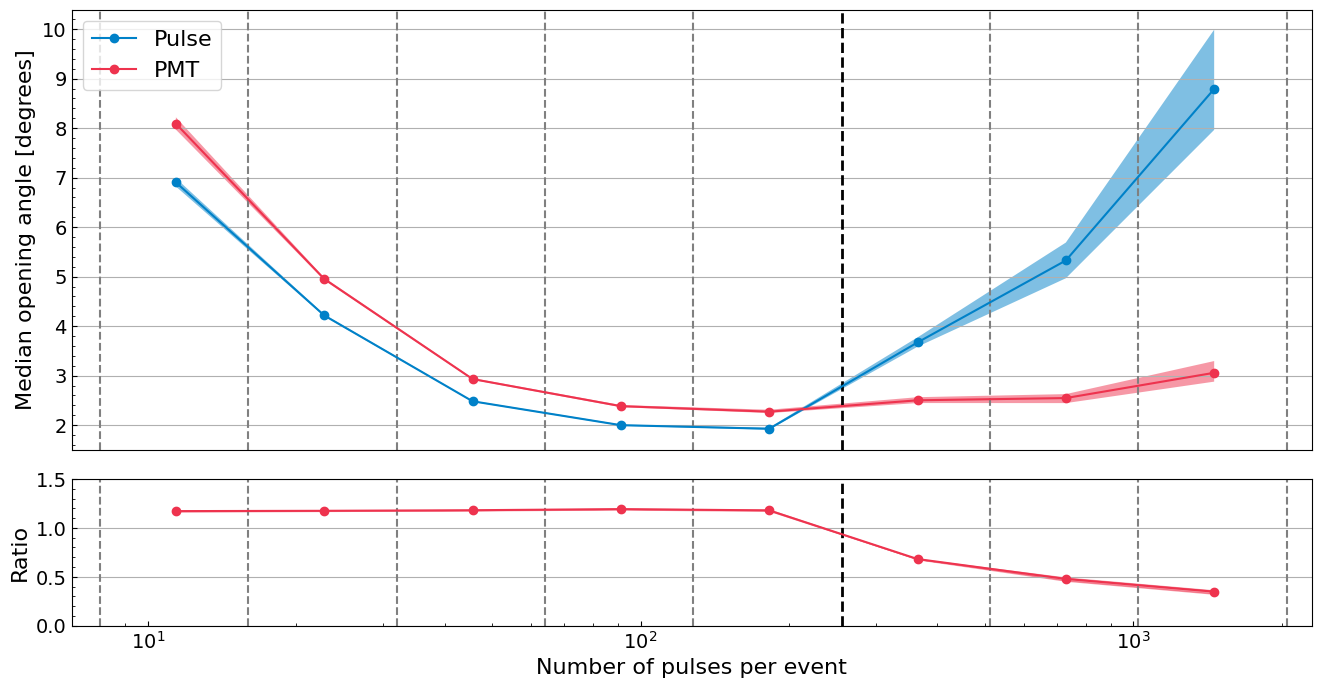

In [ ]:
#Create figure and GridSpec with correct height ratios
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2], hspace=0.1)

# Create subplots with GridSpec
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Vertical dashed lines at bin edges
for pulse_bin in pulse_bins:
    if pulse_bin != 256:
        ax1.axvline(pulse_bin, color='gray', linestyle='--')

# draw thick black dashed line at 256
ax1.axvline(256, color='black', linestyle='--', linewidth=2)

bin_centers = (pulse_bins[:-1] + pulse_bins[1:]) / 2
bin_centers = bin_centers*0.95

# Plot median opening angle
ax1.plot(bin_centers, median_opening_angle_pulse_pulses, '-o', label='Pulse')
ax1.plot(bin_centers, median_opening_angle_pmt_pulses, '-o', label='PMT')
ax1.fill_between(bin_centers, lower_bounds_pulse, upper_bounds_pulse, alpha=0.5)
ax1.fill_between(bin_centers, lower_bounds_pmt, upper_bounds_pmt, alpha=0.5)
ax1.set_ylabel('Median opening angle [degrees]', fontsize=16)
ax1.legend(loc="upper left", fontsize=16)
ax1.set_xscale('log')
ax1.set_xlim(7, 2300)

ax1.grid(axis='y')

ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# set tick size to 14
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Plot relative performance
median_opening_angle_pmt_pulses = np.array(median_opening_angle_pmt_pulses)
median_opening_angle_pulse_pulses = np.array(median_opening_angle_pulse_pulses)
baseline = median_opening_angle_pulse_pulses / median_opening_angle_pulse_pulses
# relative performance
relative = median_opening_angle_pmt_pulses / median_opening_angle_pulse_pulses
error_on_relative_upper = 1/median_opening_angle_pulse_pulses * (upper_bounds_pmt - median_opening_angle_pmt_pulses) - median_opening_angle_pmt_pulses / median_opening_angle_pulse_pulses**2 * (upper_bounds_pulse - median_opening_angle_pulse_pulses)
error_on_relative_lower = 1/median_opening_angle_pulse_pulses * (median_opening_angle_pmt_pulses - lower_bounds_pmt) - median_opening_angle_pmt_pulses / median_opening_angle_pulse_pulses**2 * (median_opening_angle_pulse_pulses - lower_bounds_pulse)

# Vertical dashed lines at bin edges
for pulse_bin in pulse_bins:
    if pulse_bin != 256:
        ax2.axvline(pulse_bin, color='gray', linestyle='--')

# draw thick black dashed line at 256
ax2.axvline(256, color='black', linestyle='--', linewidth=2)

ax2.plot(bin_centers, relative, '-o', color=custom_colors[1])
ax2.fill_between(bin_centers, relative - error_on_relative_lower, relative + error_on_relative_upper, 
                 alpha=0.5, color=custom_colors[1])
ax2.set_ylabel('Ratio', fontsize=16)
ax2.set_xlabel('Number of pulses per event', fontsize=16)
ax2.set_xscale('log')
ax2.set_ylim(0, 1.5)

# set tick size to 14
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)

# Enable grid on y-axis of relative performance plot
ax2.grid(axis='y')

# Show plot
plt.show()

### 🖼️ **Figure 7.17**  
**Median Opening Angle vs. True Neutrino Energy**  

Median opening angle of the PMT-fied and pulse map transformer models as a function of true neutrino energy. The training and validation data is in the energy range 100 GeV − 10 TeV. The bottom plot shows the ratio in median of the PMT model to the pulse model.


In [ ]:
truth_energy_22010 = truth_total_22010['energy']

# plot histogram of median opening angle pmt and pulse, binned in energy
energy_bins = np.logspace(2, 4, 9)

median_opening_angle_pmt_22010 = []
median_opening_angle_pulse_22010 = []

counts_per_bin = []

upper_bound_pmt_22010 = []
lower_bound_pmt_22010 = []    

upper_bound_pulse_22010 = []
lower_bound_pulse_22010 = []

quantile = 0.5


for i in range(len(energy_bins)-1):
    mask = (truth_energy_22010 > energy_bins[i]) & (truth_energy_22010 < energy_bins[i+1])
    mask = mask & TC_CC_mask_22010
    counts = np.sum(mask)
    counts_per_bin.append(counts)

    median_opening_angle_pmt_22010.append(np.median(opening_angle_pmt_22010[mask]))
    median_opening_angle_pulse_22010.append(np.median(opening_angle_pulse_22010[mask]))

    lower_bound, upper_bound = get_quantile_bounds(quantile, counts)

    sorted_opening_angle_pmt_22010 = np.sort(opening_angle_pmt_22010[mask])
    sorted_opening_angle_pulse_22010 = np.sort(opening_angle_pulse_22010[mask])

    lower_bound_pmt_22010.append(sorted_opening_angle_pmt_22010[lower_bound])
    upper_bound_pmt_22010.append(sorted_opening_angle_pmt_22010[upper_bound])

    lower_bound_pulse_22010.append(sorted_opening_angle_pulse_22010[lower_bound])
    upper_bound_pulse_22010.append(sorted_opening_angle_pulse_22010[upper_bound])

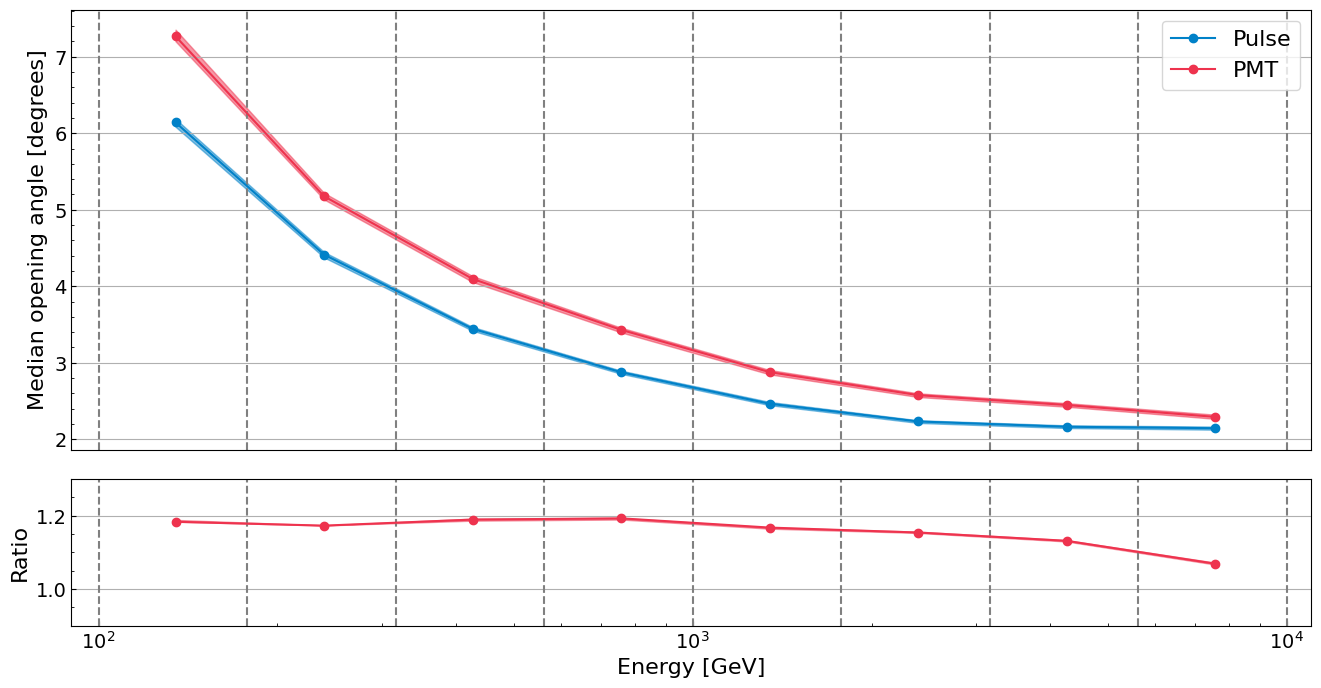

In [ ]:
median_opening_angle_pmt_22010 = np.array(median_opening_angle_pmt_22010)
median_opening_angle_pulse_22010 = np.array(median_opening_angle_pulse_22010)

# relative performance
relative = median_opening_angle_pmt_22010 / median_opening_angle_pulse_22010
error_on_relative_upper = 1/median_opening_angle_pulse_22010 * (upper_bound_pmt_22010 - median_opening_angle_pmt_22010) - median_opening_angle_pmt_22010 / median_opening_angle_pulse_22010**2 * (upper_bound_pulse_22010 - median_opening_angle_pulse_22010)
error_on_relative_lower = 1/median_opening_angle_pulse_22010 * (median_opening_angle_pmt_22010 - lower_bound_pmt_22010) - median_opening_angle_pmt_22010 / median_opening_angle_pulse_22010**2 * (median_opening_angle_pulse_22010 - lower_bound_pulse_22010)

# plot as function of energy
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2], hspace=0.1)

# Create subplots with GridSpec
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Vertical dashed lines at bin edges
for i in range(len(energy_bins)):
    ax1.axvline(energy_bins[i], color='gray', linestyle='--')

# Plot median opening angle
bin_centers = 0.97*(energy_bins[:-1] + energy_bins[1:]) / 2
ax1.plot(bin_centers, median_opening_angle_pulse_22010, '-o', label='Pulse', color=custom_colors[0])
ax1.plot(bin_centers, median_opening_angle_pmt_22010, '-o', label='PMT', color=custom_colors[1])
ax1.fill_between(bin_centers, lower_bound_pulse_22010, upper_bound_pulse_22010, alpha=0.5, color=custom_colors[0])
ax1.fill_between(bin_centers, lower_bound_pmt_22010, upper_bound_pmt_22010, alpha=0.5, color=custom_colors[1])
ax1.set_ylabel('Median opening angle [degrees]', fontsize=16)
ax1.legend(loc="upper right", fontsize=16)
ax1.set_xscale('log')
ax1.set_xlim(9e1, 1.1e4)
ax1.grid(axis='y')
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# set tick size to 14
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Plot relative performance
median_opening_angle_pmt_22010 = np.array(median_opening_angle_pmt_22010)
median_opening_angle_pulse_22010 = np.array(median_opening_angle_pulse_22010)

# relative performance
relative = median_opening_angle_pmt_22010 / median_opening_angle_pulse_22010
error_on_relative_upper = 1/median_opening_angle_pulse_22010 * (upper_bound_pmt_22010 - median_opening_angle_pmt_22010) - median_opening_angle_pmt_22010 / median_opening_angle_pulse_22010**2 * (upper_bound_pulse_22010 - median_opening_angle_pulse_22010)
error_on_relative_lower = 1/median_opening_angle_pulse_22010 * (median_opening_angle_pmt_22010 - lower_bound_pmt_22010) - median_opening_angle_pmt_22010 / median_opening_angle_pulse_22010**2 * (median_opening_angle_pulse_22010 - lower_bound_pulse_22010)

# Vertical dashed lines at bin edges
for i in range(len(energy_bins)):
    ax2.axvline(energy_bins[i], color='gray', linestyle='--')

ax2.plot(bin_centers, relative, '-o', color=custom_colors[1])
ax2.fill_between(bin_centers, relative - error_on_relative_lower, relative + error_on_relative_upper, 
                 alpha=0.5, color=custom_colors[1])
ax2.set_ylabel('Ratio', fontsize=16)
ax2.set_xlabel('Energy [GeV]', fontsize=16)
ax2.set_xscale('log')
ax2.set_xlim(9e1, 1.1e4)
ax2.set_ylim(0.9, 1.3)

# set tick size to 14
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)

# Enable grid on y-axis of relative performance plot
ax2.grid(axis='y')

# Show plot
plt.show()

# 🎯📐 Section 7.4: Directional reconstruction

In [ ]:
# load the predictions
pred_22010 = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22010/neutrino/all_energies_truth10.csv')
pred_22011 = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22011/neutrino/all_energies_truth9.csv')
pred_22012 = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/predictions/22012/neutrino/all_energies_truth10.csv')

# sort on event_no
pred_22010 = pred_22010.sort_values(by=['event_no'])
pred_22011 = pred_22011.sort_values(by=['event_no'])
pred_22012 = pred_22012.sort_values(by=['event_no'])

In [ ]:
# opening angle for 22010
x_pred_22010 = pred_22010['x_pred'].values
y_pred_22010 = pred_22010['y_pred'].values
z_pred_22010 = pred_22010['z_pred'].values

x_truth_22010 = pred_22010['x_truth'].values
y_truth_22010 = pred_22010['y_truth'].values
z_truth_22010 = pred_22010['z_truth'].values

cos_opening_angle_22010 = (x_pred_22010*x_truth_22010 + y_pred_22010*y_truth_22010 + z_pred_22010*z_truth_22010) / (np.sqrt(x_pred_22010**2 + y_pred_22010**2 + z_pred_22010**2) * np.sqrt(x_truth_22010**2 + y_truth_22010**2 + z_truth_22010**2))
cos_opening_angle_22010 = np.clip(cos_opening_angle_22010, -1, 1)
opening_angle_22010 = np.arccos(cos_opening_angle_22010)
opening_angle_22010 = np.degrees(opening_angle_22010)

# opening angle for 22011
x_pred_22011 = pred_22011['x_pred'].values
y_pred_22011 = pred_22011['y_pred'].values
z_pred_22011 = pred_22011['z_pred'].values

x_truth_22011 = pred_22011['x_truth'].values
y_truth_22011 = pred_22011['y_truth'].values
z_truth_22011 = pred_22011['z_truth'].values

cos_opening_angle_22011 = (x_pred_22011*x_truth_22011 + y_pred_22011*y_truth_22011 + z_pred_22011*z_truth_22011) / (np.sqrt(x_pred_22011**2 + y_pred_22011**2 + z_pred_22011**2) * np.sqrt(x_truth_22011**2 + y_truth_22011**2 + z_truth_22011**2))
cos_opening_angle_22011 = np.clip(cos_opening_angle_22011, -1, 1)
opening_angle_22011 = np.arccos(cos_opening_angle_22011)
opening_angle_22011 = np.degrees(opening_angle_22011)

# opening angle for 22012
x_pred_22012 = pred_22012['x_pred'].values
y_pred_22012 = pred_22012['y_pred'].values
z_pred_22012 = pred_22012['z_pred'].values

x_truth_22012 = pred_22012['x_truth'].values
y_truth_22012 = pred_22012['y_truth'].values
z_truth_22012 = pred_22012['z_truth'].values

cos_opening_angle_22012 = (x_pred_22012*x_truth_22012 + y_pred_22012*y_truth_22012 + z_pred_22012*z_truth_22012) / (np.sqrt(x_pred_22012**2 + y_pred_22012**2 + z_pred_22012**2) * np.sqrt(x_truth_22012**2 + y_truth_22012**2 + z_truth_22012**2))
cos_opening_angle_22012 = np.clip(cos_opening_angle_22012, -1, 1)
opening_angle_22012 = np.arccos(cos_opening_angle_22012)
opening_angle_22012 = np.degrees(opening_angle_22012)

# print the describe
print('22010 opening angle:')
print(pd.Series(opening_angle_22010).describe())
print('\n22011 opening angle:')   
print(pd.Series(opening_angle_22011).describe())
print('\n22012 opening angle:')
print(pd.Series(opening_angle_22012).describe())

22010 opening angle:
count    500000.000000
mean         38.856715
std          47.009197
min           0.005601
25%           2.156205
50%          11.160848
75%          71.514809
max         179.616167
dtype: float64

22011 opening angle:
count    402087.000000
mean         17.753859
std          34.135560
min           0.001991
25%           0.779250
50%           1.879042
75%          12.727443
max         179.642720
dtype: float64

22012 opening angle:
count    29449.000000
mean        14.949069
std         31.067126
min          0.001953
25%          0.691243
50%          1.634073
75%          9.146618
max        178.946883
dtype: float64


In [ ]:
# load truth parquet file to find TC_CC event numbers

# 22010
truth_total_22010 = pd.read_parquet('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22010/truth_10.parquet')
truth_tc_cc_22010 = pd.read_parquet('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered/Snowstorm/CC_CRclean_MuonLike/22010/truth_10.parquet')
truth_total_22010 = truth_total_22010[:500000]
# sort on event_no
truth_total_22010 = truth_total_22010.sort_values('event_no')
TC_CC_mask_22010 = truth_total_22010['event_no'].isin(truth_tc_cc_22010['event_no'])

# Print summary
print("22010")
print(f"Total events before selection: {len(truth_total_22010)}")
print(f"Total TC_CC events in 22010: {np.sum(TC_CC_mask_22010)}")

# 22011
truth_total_22011 = pd.read_parquet('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22011/truth_9.parquet')
truth_tc_cc_22011 = pd.read_parquet('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered/Snowstorm/CC_CRclean_MuonLike/22011/truth_9.parquet')
# sort on event_no
truth_total_22011 = truth_total_22011.sort_values('event_no')
TC_CC_mask_22011 = truth_total_22011['event_no'].isin(truth_tc_cc_22011['event_no'])

# Print summary
print("\n22011")
print(f"Total events before selection: {len(truth_total_22011)}")
print(f"Total TC_CC events in 22011: {np.sum(TC_CC_mask_22011)}")

# 22012
truth_total_22012 = pd.read_parquet('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/truth_10.parquet')
truth_tc_cc_22012 = pd.read_parquet('/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered/Snowstorm/CC_CRclean_MuonLike/22012/truth_10.parquet')
# sort on event_no
truth_total_22012 = truth_total_22012.sort_values('event_no')
TC_CC_mask_22012 = truth_total_22012['event_no'].isin(truth_tc_cc_22012['event_no'])

# Print summary
print("\n22012")
print(f"Total events before selection: {len(truth_total_22012)}")
print(f"Total TC_CC events in 22012: {np.sum(TC_CC_mask_22012)}")

22010
Total events before selection: 500000
Total TC_CC events in 22010: 214245

22011
Total events before selection: 402087
Total TC_CC events in 22011: 235946

22012
Total events before selection: 29449
Total TC_CC events in 22012: 19525


In [ ]:
# print describe with mask applied
print("\n22010 TC_CC opening angle:")
print(pd.Series(opening_angle_22010[TC_CC_mask_22010]).describe())
print('\n22011 TC_CC opening angle:')
print(pd.Series(opening_angle_22011[TC_CC_mask_22011]).describe())
print('\n22012 TC_CC opening angle:')
print(pd.Series(opening_angle_22012[TC_CC_mask_22012]).describe())


22010 TC_CC opening angle:
count    214245.000000
mean         18.833879
std          34.010716
min           0.005601
25%           1.284427
50%           3.185561
75%          14.489951
max         179.192837
dtype: float64

22011 TC_CC opening angle:
count    235946.000000
mean          5.160466
std          14.265565
min           0.001991
25%           0.616643
50%           1.102366
75%           2.741053
max         178.582636
dtype: float64

22012 TC_CC opening angle:
count    19525.000000
mean         4.971076
std         13.732799
min          0.002042
25%          0.587217
50%          1.089075
75%          2.813787
max        174.061320
dtype: float64


In [ ]:
starting_event_22010_mask = truth_total_22010['isWithinIceCube']
starting_event_22011_mask = truth_total_22011['isWithinIceCube']
starting_event_22012_mask = truth_total_22012['isWithinIceCube']

# convert to boolean masks
starting_event_22010_mask = starting_event_22010_mask.astype(bool)
starting_event_22011_mask = starting_event_22011_mask.astype(bool)
starting_event_22012_mask = starting_event_22012_mask.astype(bool)

track_length_22010 = truth_total_22010['lepton_intra_distance']
track_length_22011 = truth_total_22011['lepton_intra_distance']
track_length_22012 = truth_total_22012['lepton_intra_distance']

print('22010 total events:', len(truth_total_22010))
print('22010 starting event:', np.sum(starting_event_22010_mask))
print('\n22011 total events:', len(truth_total_22011))
print('22011 starting event:', np.sum(starting_event_22011_mask))
print('\n22012 total events:', len(truth_total_22012))
print('22012 starting event:', np.sum(starting_event_22012_mask))

22010 total events: 500000
22010 starting event: 201958

22011 total events: 402087
22011 starting event: 61383

22012 total events: 29449
22012 starting event: 2385


In [ ]:
# load spline mpe lvl3 reconstructions
spline_mpe_22010 = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/validation/lvl3/22010_part_10_all_lvl3.csv')
spline_mpe_22011 = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/validation/lvl3/22011_part_9_all_lvl3.csv')
spline_mpe_22012 = pd.read_csv('/groups/icecube/luc/Workspace/GraphNet/work/IceCube_transformer/validation/lvl3/22012_part_10_all_lvl3.csv')

# sort on event_no
spline_mpe_22010 = spline_mpe_22010.sort_values(by=['event_no'])
spline_mpe_22011 = spline_mpe_22011.sort_values(by=['event_no'])
spline_mpe_22012 = spline_mpe_22012.sort_values(by=['event_no'])

# create mask for event_no in lvl3 reconstructions
lvl3_mask_22010= truth_total_22010['event_no'].isin(spline_mpe_22010['event_no'])
lvl3_mask_22011= truth_total_22011['event_no'].isin(spline_mpe_22011['event_no'])
lvl3_mask_22012= truth_total_22012['event_no'].isin(spline_mpe_22012['event_no'])

# flipped mask
lvl3_mask_22010_flipped = spline_mpe_22010['event_no'].isin(truth_total_22010['event_no'])
lvl3_mask_22011_flipped = spline_mpe_22011['event_no'].isin(truth_total_22011['event_no'])
lvl3_mask_22012_flipped = spline_mpe_22012['event_no'].isin(truth_total_22012['event_no'])

# tc_cc_mask flipped
TC_CC_mask_22010_flipped = spline_mpe_22010['event_no'].isin(truth_tc_cc_22010['event_no'])
TC_CC_mask_22011_flipped = spline_mpe_22011['event_no'].isin(truth_tc_cc_22011['event_no'])
TC_CC_mask_22012_flipped = spline_mpe_22012['event_no'].isin(truth_tc_cc_22012['event_no'])

# print summary
print("\n22010")
print(f"Total events before selection: {len(truth_total_22010)}")
print(f"Total events with TC_CC: {np.sum(TC_CC_mask_22010)}")
print(f"Total events with lvl3 reconstructions: {np.sum(lvl3_mask_22010)}")
print(f"Total events with lvl3 reconstructions and TC_CC: {np.sum(lvl3_mask_22010 & TC_CC_mask_22010)}")

print("\n22011")
print(f"Total events before selection: {len(truth_total_22011)}")
print(f"Total events with TC_CC: {np.sum(TC_CC_mask_22011)}")
print(f"Total events with lvl3 reconstructions: {np.sum(lvl3_mask_22011)}")
print(f"Total events with lvl3 reconstructions and TC_CC: {np.sum(lvl3_mask_22011 & TC_CC_mask_22011)}")

print("\n22012")
print(f"Total events before selection: {len(truth_total_22012)}")
print(f"Total events with TC_CC: {np.sum(TC_CC_mask_22012)}")
print(f"Total events with lvl3 reconstructions: {np.sum(lvl3_mask_22012)}")
print(f"Total events with lvl3 reconstructions and TC_CC: {np.sum(lvl3_mask_22012 & TC_CC_mask_22012)}")


22010
Total events before selection: 500000
Total events with TC_CC: 214245
Total events with lvl3 reconstructions: 170181
Total events with lvl3 reconstructions and TC_CC: 159243

22011
Total events before selection: 402087
Total events with TC_CC: 235946
Total events with lvl3 reconstructions: 198643
Total events with lvl3 reconstructions and TC_CC: 182504

22012
Total events before selection: 29449
Total events with TC_CC: 19525
Total events with lvl3 reconstructions: 19514
Total events with lvl3 reconstructions and TC_CC: 18082


In [ ]:
truth_energy_22010 = truth_total_22010['energy']
truth_energy_22011 = truth_total_22011['energy']
truth_energy_22012 = truth_total_22012['energy']

truth_zenith_22010 = truth_total_22010['zenith']
truth_zenith_22011 = truth_total_22011['zenith']
truth_zenith_22012 = truth_total_22012['zenith']

In [ ]:
spline_mpe_energy_22010 = spline_mpe_22010['energy_truth']
spline_mpe_energy_22011 = spline_mpe_22011['energy_truth']
spline_mpe_energy_22012 = spline_mpe_22012['energy_truth']

opening_angle_22010_spline_mpe = spline_mpe_22010['opening_angle']
opening_angle_22011_spline_mpe = spline_mpe_22011['opening_angle']
opening_angle_22012_spline_mpe = spline_mpe_22012['opening_angle']

truth_zenith_22010_spline_mpe = spline_mpe_22010['zenith_truth']
truth_zenith_22011_spline_mpe = spline_mpe_22011['zenith_truth']
truth_zenith_22012_spline_mpe = spline_mpe_22012['zenith_truth']

### 🖼️ **Figures 7.18/7.19/7.20**  
**Full distribution transformer vs SplineMPE**  
Distributions of the opening angle between true and predicted neutrino direction
for the transformer and SplineMPE, shown on the test set of the 22010/22011/22012 dataset.

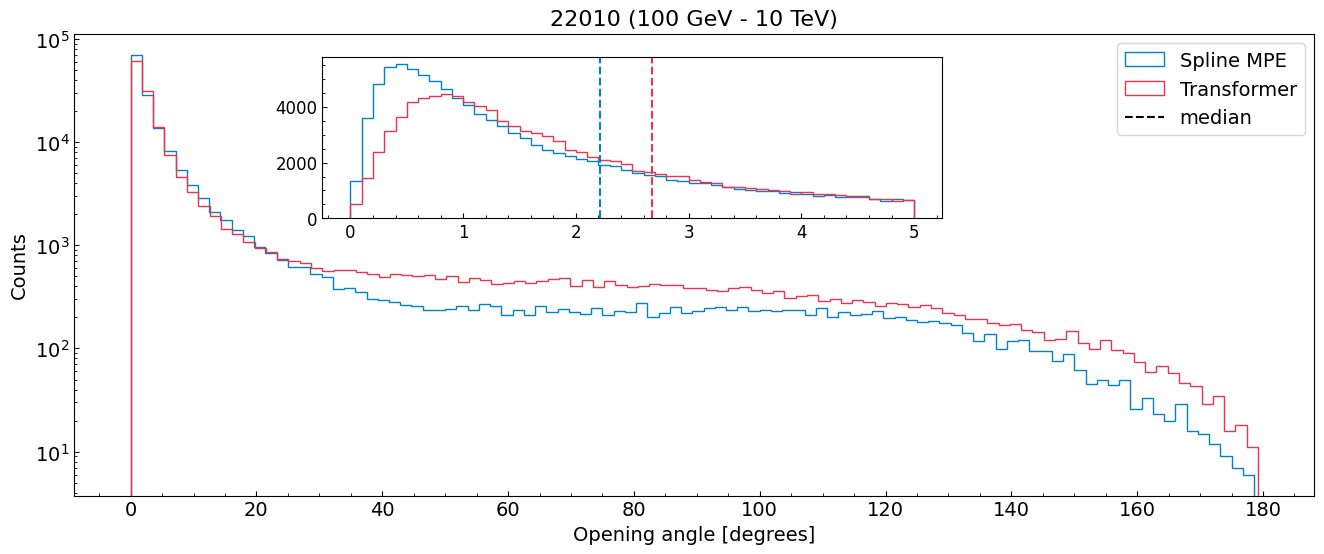

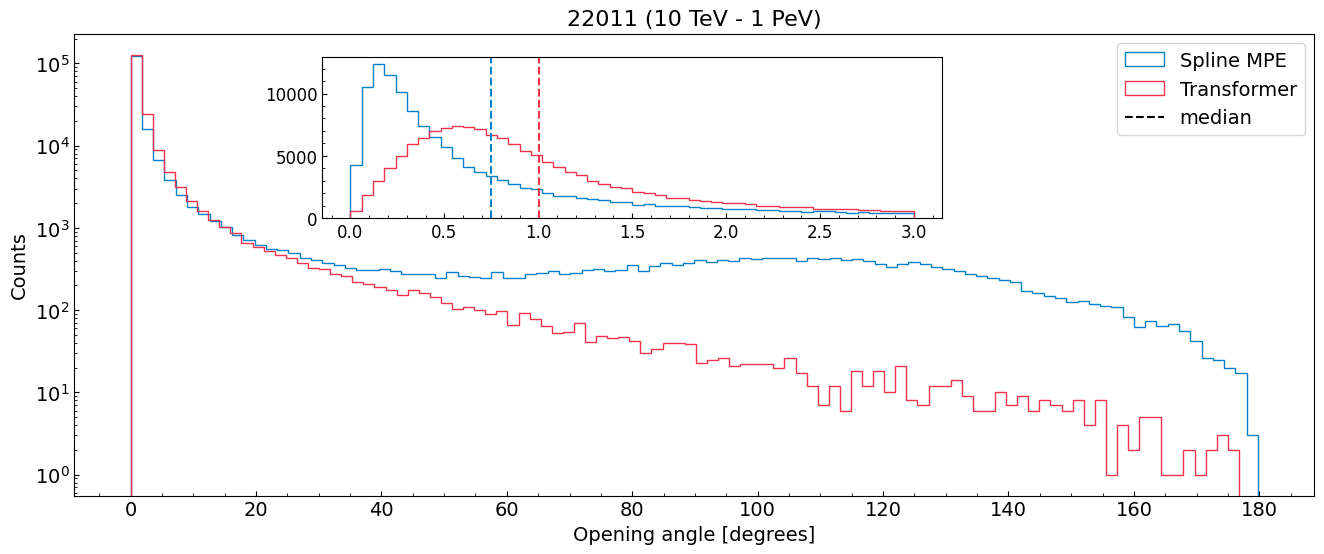

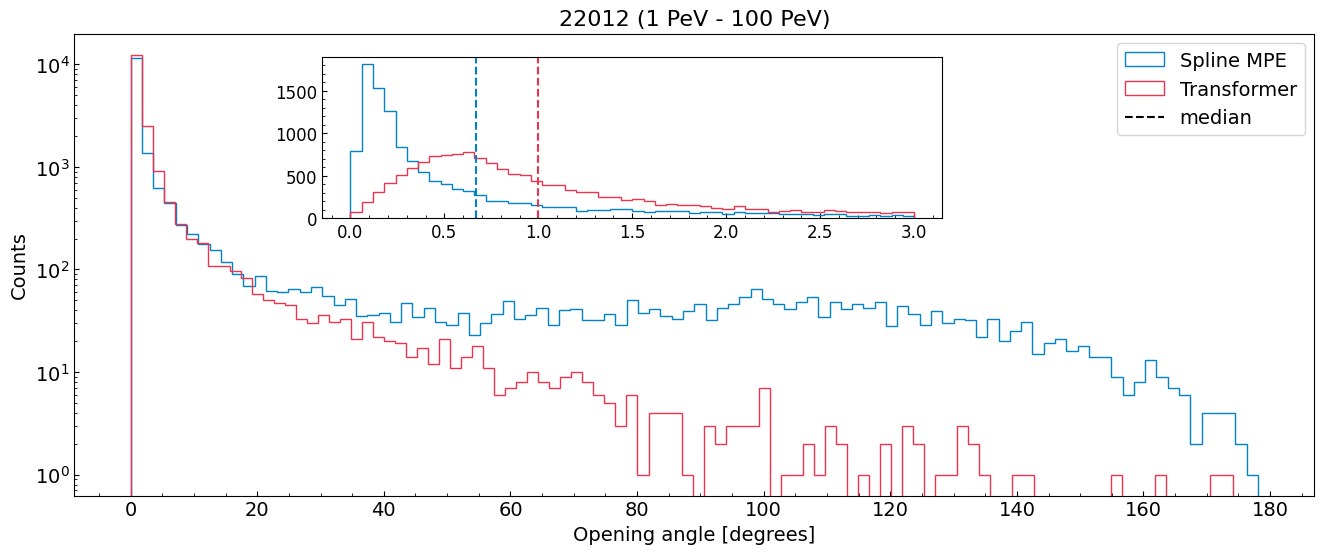

In [ ]:
# plot lvl3 tc_cc opening angle for transformer and spline MPE (22010, 22011, 22012 individually)
fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(opening_angle_22010_spline_mpe[lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped], bins=100, histtype='step', label='Spline MPE')
ax.hist(opening_angle_22010[TC_CC_mask_22010 & lvl3_mask_22010], bins=100, histtype='step', label='Transformer')

# add a second plot with the same x-axis and y-axis
ax2 = ax.inset_axes([0.2, 0.6, 0.5, 0.35])  # [x, y, width, height]
# make a mini histogram of the same data in the range of 0 to 3 degrees
ax2.hist(opening_angle_22010_spline_mpe[lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped], bins=50, range=(0,5), histtype='step', label='Spline MPE')
ax2.hist(opening_angle_22010[TC_CC_mask_22010 & lvl3_mask_22010], bins=50, range=(0,5), histtype='step', label='Transformer')
# plot dashed line in same color as the histogram at the median of the data
median_22010 = np.median(opening_angle_22010[TC_CC_mask_22010 & lvl3_mask_22010])
ax2.axvline(median_22010, color=custom_colors[1], linestyle='--', label='Median')
median_22010_spline_mpe = np.median(opening_angle_22010_spline_mpe[lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped])
ax2.axvline(median_22010_spline_mpe, color=custom_colors[0], linestyle='--', label='Median Spline MPE')

plt.xlabel('Opening angle [degrees]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
# add black dashed line to the legend for the median
ax.plot([], linestyle='--', color='black', label='median')
plt.legend(fontsize=14)
plt.title('22010 (100 GeV - 10 TeV)', fontsize=16)
plt.yscale('log')
# tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# x ticks from 0 to 180 in steps of 20
plt.xticks(np.arange(0, 181, 20))
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(opening_angle_22011_spline_mpe[lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped], bins=100, histtype='step', label='Spline MPE')
ax.hist(opening_angle_22011[TC_CC_mask_22011 & lvl3_mask_22011], bins=100, histtype='step', label='Transformer')

# add a second plot with the same x-axis and y-axis
ax2 = ax.inset_axes([0.2, 0.6, 0.5, 0.35])  # [x, y, width, height]
# make a mini histogram of the same data in the range of 0 to 3 degrees
ax2.hist(opening_angle_22011_spline_mpe[lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped], bins=50, range=(0,3), histtype='step', label='Spline MPE')
ax2.hist(opening_angle_22011[TC_CC_mask_22011 & lvl3_mask_22011], bins=50, range=(0,3), histtype='step', label='Transformer')
# plot dashed line in same color as the histogram at the median of the data
median_22011 = np.median(opening_angle_22011[TC_CC_mask_22011 & lvl3_mask_22011])
ax2.axvline(median_22011, color=custom_colors[1], linestyle='--', label='Median')
median_22011_spline_mpe = np.median(opening_angle_22011_spline_mpe[lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped])
ax2.axvline(median_22011_spline_mpe, color=custom_colors[0], linestyle='--', label='Median Spline MPE')

plt.xlabel('Opening angle [degrees]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
# add black dashed line to the legend for the median
ax.plot([], linestyle='--', color='black', label='median')
plt.legend(fontsize=14)
plt.title('22011 (10 TeV - 1 PeV)', fontsize=16)
# tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# x ticks from 0 to 180 in steps of 20
plt.xticks(np.arange(0, 181, 20))
plt.yscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(opening_angle_22012_spline_mpe[lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped], bins=100, histtype='step', label='Spline MPE')
ax.hist(opening_angle_22012[TC_CC_mask_22012 & lvl3_mask_22012], bins=100, histtype='step', label='Transformer')
# add a second plot with the same x-axis and y-axis
ax2 = ax.inset_axes([0.2, 0.6, 0.5, 0.35])  # [x, y, width, height]
# make a mini histogram of the same data in the range of 0 to 3 degrees
ax2.hist(opening_angle_22012_spline_mpe[lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped], bins=50, range=(0,3), histtype='step', label='Spline MPE')
ax2.hist(opening_angle_22012[TC_CC_mask_22012 & lvl3_mask_22012], bins=50, range=(0,3), histtype='step', label='Transformer')
# plot dashed line in same color as the histogram at the median of the data
median_22012 = np.median(opening_angle_22012[TC_CC_mask_22012 & lvl3_mask_22012])
ax2.axvline(median_22012, color=custom_colors[1], linestyle='--', label='Median')
median_22012_spline_mpe = np.median(opening_angle_22012_spline_mpe[lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped])
ax2.axvline(median_22012_spline_mpe, color=custom_colors[0], linestyle='--', label='Median Spline MPE')


plt.xlabel('Opening angle [degrees]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
# add black dashed line to the legend for the median
ax.plot([], linestyle='--', color='black', label='median')
plt.legend(fontsize=14)
plt.title('22012 (1 PeV - 100 PeV)', fontsize=16)
plt.yscale('log')
# tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# x ticks from 0 to 180 in steps of 20
plt.xticks(np.arange(0, 181, 20))
plt.show()

### 🖼️ **Figure 7.21**  
**Level 3 vs energy**  
Opening angle between the true and reconstructed neutrino direction for SplineMPE
and the transformer, as a function of true neutrino energy for all level 3 tracks passing the Thorsten
cut. The top plot shows the 25%, 50%, and 75% percentiles in opening angle per bin. The bottom
plot shows the ratio of the median opening angle of the transformer to SplineMPE.

In [ ]:
# median opening angle binned in energy
energy_bins_22010 = np.logspace(2, 4, 3)
energy_bins_22011 = np.logspace(4, 6, 3)
energy_bins_22012 = np.logspace(6, 8, 3)

median_opening_angle_22010 = []
upper_bound_22010 = []
lower_bound_22010 = []

median_opening_angle_22011 = []
upper_bound_22011 = []
lower_bound_22011 = []

median_opening_angle_22012 = []
upper_bound_22012 = []
lower_bound_22012 = []

# also track 25% and 75% quantiles
quantile_25_22010 = []
quantile_75_22010 = []

quantile_25_22011 = []
quantile_75_22011 = []

quantile_25_22012 = []
quantile_75_22012 = []

# 22010
for i in range(len(energy_bins_22010)-1):
    mask = (truth_energy_22010 >= energy_bins_22010[i]) & (truth_energy_22010 < energy_bins_22010[i+1])
    mask = mask & TC_CC_mask_22010 
    mask = mask & lvl3_mask_22010

    opening_angle_bin = opening_angle_22010[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22010.append(lower_bound)
    upper_bound_22010.append(upper_bound)
    median_opening_angle_22010.append(median_opening_angle)

    quantile_25_22010.append(np.percentile(opening_angle_bin, 25))
    quantile_75_22010.append(np.percentile(opening_angle_bin, 75))

# 22011
for i in range(len(energy_bins_22011)-1):
    mask = (truth_energy_22011 >= energy_bins_22011[i]) & (truth_energy_22011 < energy_bins_22011[i+1])
    mask = mask & TC_CC_mask_22011 
    mask = mask & lvl3_mask_22011

    opening_angle_bin = opening_angle_22011[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22011.append(lower_bound)
    upper_bound_22011.append(upper_bound)
    median_opening_angle_22011.append(median_opening_angle)

    quantile_25_22011.append(np.percentile(opening_angle_bin, 25))
    quantile_75_22011.append(np.percentile(opening_angle_bin, 75))


# 22012
for i in range(len(energy_bins_22012)-1):
    mask = (truth_energy_22012 >= energy_bins_22012[i]) & (truth_energy_22012 < energy_bins_22012[i+1])
    mask = mask & TC_CC_mask_22012
    mask = mask & lvl3_mask_22012

    opening_angle_bin = opening_angle_22012[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22012.append(lower_bound)
    upper_bound_22012.append(upper_bound)
    median_opening_angle_22012.append(median_opening_angle)

    quantile_25_22012.append(np.percentile(opening_angle_bin, 25))
    quantile_75_22012.append(np.percentile(opening_angle_bin, 75))

In [ ]:
# median opening angle binned in energy for spline mpe
median_opening_angle_22010_spline_mpe = []
upper_bound_22010_spline_mpe = []
lower_bound_22010_spline_mpe = []

median_opening_angle_22011_spline_mpe = []
upper_bound_22011_spline_mpe = []
lower_bound_22011_spline_mpe = []

median_opening_angle_22012_spline_mpe = []
upper_bound_22012_spline_mpe = []
lower_bound_22012_spline_mpe = []

# 25% and 75% quantiles
quantile_25_22010_spline_mpe = []
quantile_75_22010_spline_mpe = []

quantile_25_22011_spline_mpe = []
quantile_75_22011_spline_mpe = []

quantile_25_22012_spline_mpe = []
quantile_75_22012_spline_mpe = []

# 22010
for i in range(len(energy_bins_22010)-1):
    mask = (spline_mpe_energy_22010 >= energy_bins_22010[i]) & (spline_mpe_energy_22010 < energy_bins_22010[i+1])
    mask = mask & lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped

    opening_angle_bin = opening_angle_22010_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22010_spline_mpe.append(lower_bound)
    upper_bound_22010_spline_mpe.append(upper_bound)
    median_opening_angle_22010_spline_mpe.append(median_opening_angle)
    # 25% and 75% quantiles
    quantile_25_22010_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    quantile_75_22010_spline_mpe.append(np.percentile(opening_angle_bin, 75))

# 22011
for i in range(len(energy_bins_22011)-1):
    mask = (spline_mpe_energy_22011 >= energy_bins_22011[i]) & (spline_mpe_energy_22011 < energy_bins_22011[i+1])
    mask = mask & lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped

    opening_angle_bin = opening_angle_22011_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22011_spline_mpe.append(lower_bound)
    upper_bound_22011_spline_mpe.append(upper_bound)
    median_opening_angle_22011_spline_mpe.append(median_opening_angle)

    # 25% and 75% quantiles
    quantile_25_22011_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    quantile_75_22011_spline_mpe.append(np.percentile(opening_angle_bin, 75))

# 22012
for i in range(len(energy_bins_22012)-1):
    mask = (spline_mpe_energy_22012 >= energy_bins_22012[i]) & (spline_mpe_energy_22012 < energy_bins_22012[i+1])
    mask = mask & lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped

    opening_angle_bin = opening_angle_22012_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22012_spline_mpe.append(lower_bound)
    upper_bound_22012_spline_mpe.append(upper_bound)
    median_opening_angle_22012_spline_mpe.append(median_opening_angle)

    # 25% and 75% quantiles
    quantile_25_22012_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    quantile_75_22012_spline_mpe.append(np.percentile(opening_angle_bin, 75))

Relative median opening angle:
[1.18476733 1.28562374 1.23759837 1.60840968 1.60018402 1.40293767]


/tmp/ipykernel_3704425/2596128206.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


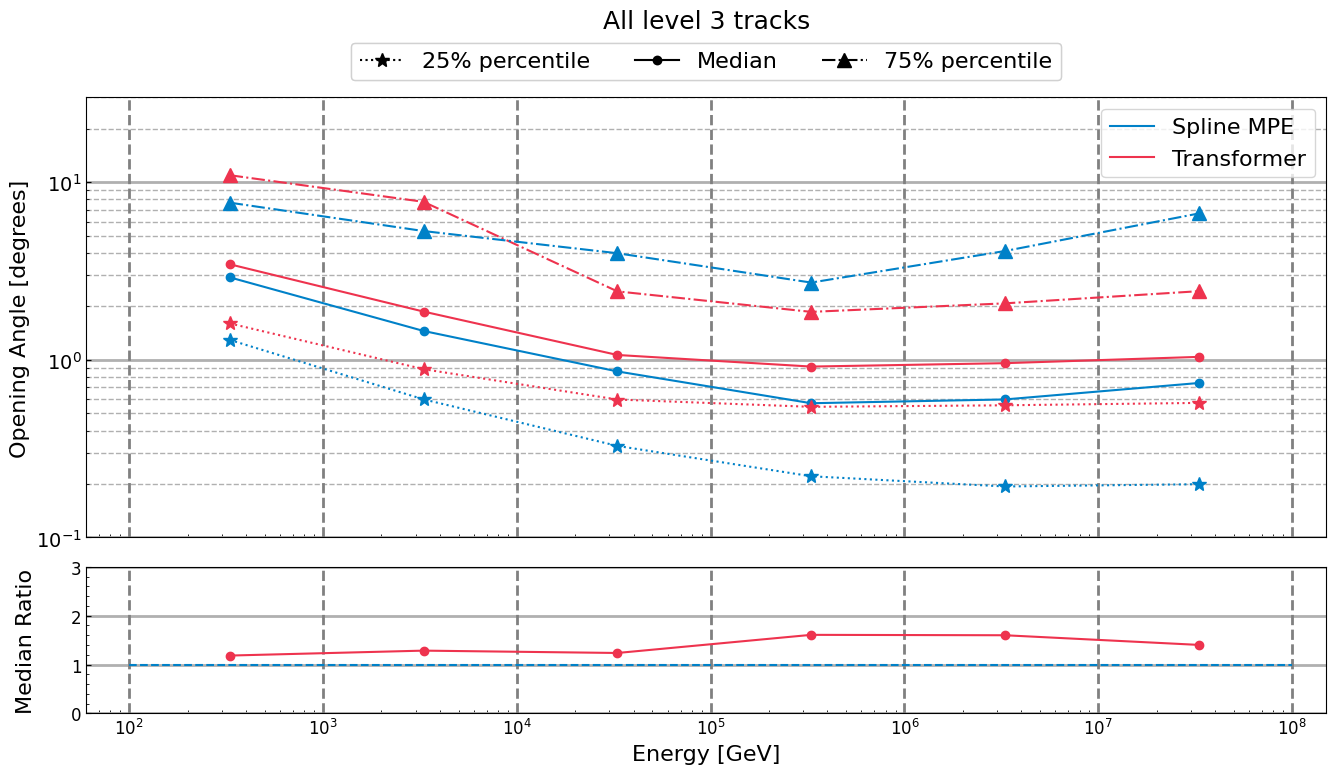

In [ ]:
# plot the median opening angle as function of energy
bin_centers_22010 = (energy_bins_22010[:-1] + energy_bins_22010[1:]) / 2
bin_centers_22011 = (energy_bins_22011[:-1] + energy_bins_22011[1:]) / 2
bin_centers_22012 = (energy_bins_22012[:-1] + energy_bins_22012[1:]) / 2

bin_centers_combined = np.concatenate((bin_centers_22010, bin_centers_22011, bin_centers_22012))
bin_centers_combined = bin_centers_combined*0.6

median_opening_angle_combined = np.concatenate((median_opening_angle_22010, median_opening_angle_22011, median_opening_angle_22012))
lower_bound_combined = np.concatenate((lower_bound_22010, lower_bound_22011, lower_bound_22012))
upper_bound_combined = np.concatenate((upper_bound_22010, upper_bound_22011, upper_bound_22012))

median_opening_angle_combined_spline_mpe = np.concatenate((median_opening_angle_22010_spline_mpe, median_opening_angle_22011_spline_mpe, median_opening_angle_22012_spline_mpe))
lower_bound_combined_spline_mpe = np.concatenate((lower_bound_22010_spline_mpe, lower_bound_22011_spline_mpe, lower_bound_22012_spline_mpe))
upper_bound_combined_spline_mpe = np.concatenate((upper_bound_22010_spline_mpe, upper_bound_22011_spline_mpe, upper_bound_22012_spline_mpe))

quantile_25_combined = np.concatenate((quantile_25_22010, quantile_25_22011, quantile_25_22012))
quantile_75_combined = np.concatenate((quantile_75_22010, quantile_75_22011, quantile_75_22012))

quantile_25_combined_spline_mpe = np.concatenate((quantile_25_22010_spline_mpe, quantile_25_22011_spline_mpe, quantile_25_22012_spline_mpe))
quantile_75_combined_spline_mpe = np.concatenate((quantile_75_22010_spline_mpe, quantile_75_22011_spline_mpe, quantile_75_22012_spline_mpe))

# plot
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2], hspace=0.1)

# Create subplots with GridSpec
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax)

# gray dashed lines at bin edges
for i in range(len(energy_bins_22010)-1):
    ax.axvline(x=energy_bins_22010[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22011)-1):
    ax.axvline(x=energy_bins_22011[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22012)):
    ax.axvline(x=energy_bins_22012[i], color='gray', linestyle='--', linewidth=2)

ax.plot(bin_centers_combined, median_opening_angle_combined_spline_mpe, marker='o', linestyle='-', label='Spline MPE')
#ax.fill_between(bin_centers_combined, lower_bound_combined_spline_mpe, upper_bound_combined_spline_mpe, alpha=0.2)
ax.plot(bin_centers_combined, median_opening_angle_combined, marker='o', linestyle='-', label='Transformer')
#ax.fill_between(bin_centers_combined, lower_bound_combined, upper_bound_combined, alpha=0.2)
ax.plot(bin_centers_combined, quantile_25_combined, marker='*', linestyle=':', color=custom_colors[1], markersize=10)
ax.plot(bin_centers_combined, quantile_75_combined, marker='^', linestyle='-.', color=custom_colors[1], markersize=10)
ax.plot(bin_centers_combined, quantile_25_combined_spline_mpe, marker='*', linestyle=':', color=custom_colors[0], markersize=10)
ax.plot(bin_centers_combined, quantile_75_combined_spline_mpe, marker='^', linestyle='-.', color=custom_colors[0], markersize=10)
ax.set_xscale('log')

ax.set_xlim(60, 1.5e8)
ax.set_ylim(0.1, 30)
ax.set_yscale('log')

# add second legend on top of the plot for linestyle markers
handles, labels = ax.get_legend_handles_labels()
# create a new legend for the markers
marker_handles = [plt.Line2D([0], [0], marker='*', linestyle=':', color='black', markersize=10, label='25% percentile'),
                  plt.Line2D([0], [0], marker='o', linestyle='-', color='black', label='Median'),
                    plt.Line2D([0], [0], marker='^', linestyle='-.', color='black', markersize=10, label='75% percentile')]

model_handles = [plt.Line2D([0], [0], marker='', linestyle='-', color=custom_colors[0], label='Spline MPE'),
                    plt.Line2D([0], [0], marker='', linestyle='-', color=custom_colors[1], label='Transformer')]


# add both legends to the plot
model_legend = ax.legend(handles=model_handles, loc='upper right', fontsize=16)

# add marker legend to top middle
marker_legend = ax.legend(handles=marker_handles, loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.15), ncol=3)

ax.add_artist(model_legend)  # add the model legend to the plot
ax.add_artist(marker_legend)  # add the marker legend to the plot

# remove x tick labels on top plot but keep the ticks
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)

relative_median_opening_angle = median_opening_angle_combined / median_opening_angle_combined_spline_mpe
error_on_relative_upper = 1/median_opening_angle_combined_spline_mpe * (upper_bound_combined - median_opening_angle_combined_spline_mpe) - median_opening_angle_combined_spline_mpe / median_opening_angle_combined**2 * (upper_bound_combined_spline_mpe - median_opening_angle_combined)
error_on_relative_lower = 1/median_opening_angle_combined_spline_mpe * (median_opening_angle_combined - lower_bound_combined_spline_mpe) - median_opening_angle_combined_spline_mpe / median_opening_angle_combined**2 * (median_opening_angle_combined_spline_mpe - lower_bound_combined)

print('Relative median opening angle:')
print(relative_median_opening_angle)
#error_on_relative_upper = 1/median_opening_angle_pulse_pulses * (upper_bounds_pmt - median_opening_angle_pmt_pulses) - median_opening_angle_pmt_pulses / median_opening_angle_pulse_pulses**2 * (upper_bounds_pulse - median_opening_angle_pulse_pulses)

# gray dashed lines at bin edges
for i in range(len(energy_bins_22010)-1):
    ax2.axvline(x=energy_bins_22010[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22011)-1):
    ax2.axvline(x=energy_bins_22011[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22012)):
    ax2.axvline(x=energy_bins_22012[i], color='gray', linestyle='--', linewidth=2)


ax2.plot(bin_centers_combined, relative_median_opening_angle, marker='o', linestyle='-', label='Relative Median Opening Angle', color=custom_colors[1])
#ax2.fill_between(bin_centers_combined, relative_median_opening_angle - error_on_relative_lower, relative_median_opening_angle + error_on_relative_upper, alpha=0.2)
ax2.set_xscale('log')
ax2.set_ylim(0, 3)
ax2.grid(axis='y', linewidth = 2)
x = np.linspace(energy_bins_22010[0], energy_bins_22012[-1], 100)
y = np.ones_like(x)
ax2.plot(x, y, color=custom_colors[0], linestyle='--' )

ax2.set_ylabel('Median Ratio', fontsize=16, labelpad=25)


ax2.set_xlabel('Energy [GeV]', fontsize=16)
ax.set_ylabel('Opening Angle [degrees]', fontsize=16)
ax.set_title('All level 3 tracks', fontsize=18, pad=50)
#ax.legend(loc='upper right', fontsize=16)
ax.grid(axis='y', linewidth = 2)
# enable minor y grid
ax.grid(which='minor', linestyle='--', linewidth=1, axis='y')
# tick size 14
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

### 🖼️ **Figure 7.22**  
**Through-going tracks**  
Median opening angle between the true and predicted neutrino direction for the
transformer and SplineMPE for through-going tracks with a minimum detector-contained track
length of 400 m. The shaded area indicates the 1σ confidence on the median.

In [ ]:
through_going_400_mask_22010 = (track_length_22010 >= 400)
through_going_400_mask_22011 = (track_length_22011 >= 400)
through_going_400_mask_22012 = (track_length_22012 >= 400)

# create flipped mask for splineMPE
through_going_400_mask_22010_spline_mpe = spline_mpe_22010['event_no'].isin(truth_total_22010['event_no'][through_going_400_mask_22010]) 
through_going_400_mask_22011_spline_mpe = spline_mpe_22011['event_no'].isin(truth_total_22011['event_no'][through_going_400_mask_22011])
through_going_400_mask_22012_spline_mpe = spline_mpe_22012['event_no'].isin(truth_total_22012['event_no'][through_going_400_mask_22012])

# starting event mask flipped for splineMPE
starting_event_22010_mask_spline_mpe = spline_mpe_22010['event_no'].isin(truth_total_22010['event_no'][starting_event_22010_mask])
starting_event_22011_mask_spline_mpe = spline_mpe_22011['event_no'].isin(truth_total_22011['event_no'][starting_event_22011_mask])
starting_event_22012_mask_spline_mpe = spline_mpe_22012['event_no'].isin(truth_total_22012['event_no'][starting_event_22012_mask])

In [ ]:
track_length_22010_spline_mpe = track_length_22010[lvl3_mask_22010]
track_length_22011_spline_mpe = track_length_22011[lvl3_mask_22011]
track_length_22012_spline_mpe = track_length_22012[lvl3_mask_22012]

In [ ]:
# same plot as function of energy but only for through going events
median_opening_angle_22010_through_going = []
upper_bound_22010_through_going = []
lower_bound_22010_through_going = []

median_opening_angle_22011_through_going = []
upper_bound_22011_through_going = []
lower_bound_22011_through_going = []

median_opening_angle_22012_through_going = []
upper_bound_22012_through_going = []
lower_bound_22012_through_going = []

percentile_25_22010_through_going = []
percentile_75_22010_through_going = []
percentile_25_22011_through_going = []
percentile_75_22011_through_going = []
percentile_25_22012_through_going = []
percentile_75_22012_through_going = []

# 22010
for i in range(len(energy_bins_22010)-1):
    mask = (truth_energy_22010 >= energy_bins_22010[i]) & (truth_energy_22010 < energy_bins_22010[i+1])
    mask = mask & TC_CC_mask_22010 & through_going_400_mask_22010 & ~starting_event_22010_mask
    mask = mask & lvl3_mask_22010

    opening_angle_bin = opening_angle_22010[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22010_through_going.append(lower_bound)
    upper_bound_22010_through_going.append(upper_bound)
    median_opening_angle_22010_through_going.append(median_opening_angle)
    percentile_25_22010_through_going.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22010_through_going.append(np.percentile(opening_angle_bin, 75))

# 22011
for i in range(len(energy_bins_22011)-1):
    mask = (truth_energy_22011 >= energy_bins_22011[i]) & (truth_energy_22011 < energy_bins_22011[i+1])
    mask = mask & TC_CC_mask_22011 & through_going_400_mask_22011 & ~starting_event_22011_mask
    mask = mask & lvl3_mask_22011

    opening_angle_bin = opening_angle_22011[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22011_through_going.append(lower_bound)
    upper_bound_22011_through_going.append(upper_bound)
    median_opening_angle_22011_through_going.append(median_opening_angle)
    percentile_25_22011_through_going.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22011_through_going.append(np.percentile(opening_angle_bin, 75))

# 22012
for i in range(len(energy_bins_22012)-1):
    mask = (truth_energy_22012 >= energy_bins_22012[i]) & (truth_energy_22012 < energy_bins_22012[i+1])
    mask = mask & TC_CC_mask_22012 & through_going_400_mask_22012 & ~starting_event_22012_mask
    mask = mask & lvl3_mask_22012

    opening_angle_bin = opening_angle_22012[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22012_through_going.append(lower_bound)
    upper_bound_22012_through_going.append(upper_bound)
    median_opening_angle_22012_through_going.append(median_opening_angle)
    percentile_25_22012_through_going.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22012_through_going.append(np.percentile(opening_angle_bin, 75))

# SPLINE MPE
median_opening_angle_22010_through_going_spline_mpe = []
upper_bound_22010_through_going_spline_mpe = []
lower_bound_22010_through_going_spline_mpe = []
median_opening_angle_22011_through_going_spline_mpe = []
upper_bound_22011_through_going_spline_mpe = []
lower_bound_22011_through_going_spline_mpe = []
median_opening_angle_22012_through_going_spline_mpe = []
upper_bound_22012_through_going_spline_mpe = []
lower_bound_22012_through_going_spline_mpe = []

# 25% and 75% quantiles
percentile_25_22010_through_going_spline_mpe = []
percentile_75_22010_through_going_spline_mpe = []
percentile_25_22011_through_going_spline_mpe = []
percentile_75_22011_through_going_spline_mpe = []
percentile_25_22012_through_going_spline_mpe = []
percentile_75_22012_through_going_spline_mpe = []

# 22010
for i in range(len(energy_bins_22010)-1):
    mask = (spline_mpe_energy_22010 >= energy_bins_22010[i]) & (spline_mpe_energy_22010 < energy_bins_22010[i+1])
    mask = mask & lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped & through_going_400_mask_22010_spline_mpe & ~starting_event_22010_mask_spline_mpe

    opening_angle_bin = opening_angle_22010_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22010_through_going_spline_mpe.append(lower_bound)
    upper_bound_22010_through_going_spline_mpe.append(upper_bound)
    median_opening_angle_22010_through_going_spline_mpe.append(median_opening_angle)
    # 25% and 75% quantiles
    percentile_25_22010_through_going_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22010_through_going_spline_mpe.append(np.percentile(opening_angle_bin, 75))
# 22011
for i in range(len(energy_bins_22011)-1):
    mask = (spline_mpe_energy_22011 >= energy_bins_22011[i]) & (spline_mpe_energy_22011 < energy_bins_22011[i+1])
    mask = mask & lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped & through_going_400_mask_22011_spline_mpe & ~starting_event_22011_mask_spline_mpe

    opening_angle_bin = opening_angle_22011_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22011_through_going_spline_mpe.append(lower_bound)
    upper_bound_22011_through_going_spline_mpe.append(upper_bound)
    median_opening_angle_22011_through_going_spline_mpe.append(median_opening_angle)
    # 25% and 75% quantiles
    percentile_25_22011_through_going_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22011_through_going_spline_mpe.append(np.percentile(opening_angle_bin, 75))

# 22012
for i in range(len(energy_bins_22012)-1):
    mask = (spline_mpe_energy_22012 >= energy_bins_22012[i]) & (spline_mpe_energy_22012 < energy_bins_22012[i+1])
    mask = mask & lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped & through_going_400_mask_22012_spline_mpe & ~starting_event_22012_mask_spline_mpe

    opening_angle_bin = opening_angle_22012_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22012_through_going_spline_mpe.append(lower_bound)
    upper_bound_22012_through_going_spline_mpe.append(upper_bound)
    median_opening_angle_22012_through_going_spline_mpe.append(median_opening_angle)
    # 25% and 75% quantiles
    percentile_25_22012_through_going_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22012_through_going_spline_mpe.append(np.percentile(opening_angle_bin, 75))

Spline MPE: [1.83582036 0.86588208 0.46100126 0.2838452  0.20560159 0.18502243]
IceCube Transformer: [2.35328302 1.26487422 0.77960737 0.67596193 0.61816228 0.60869938]


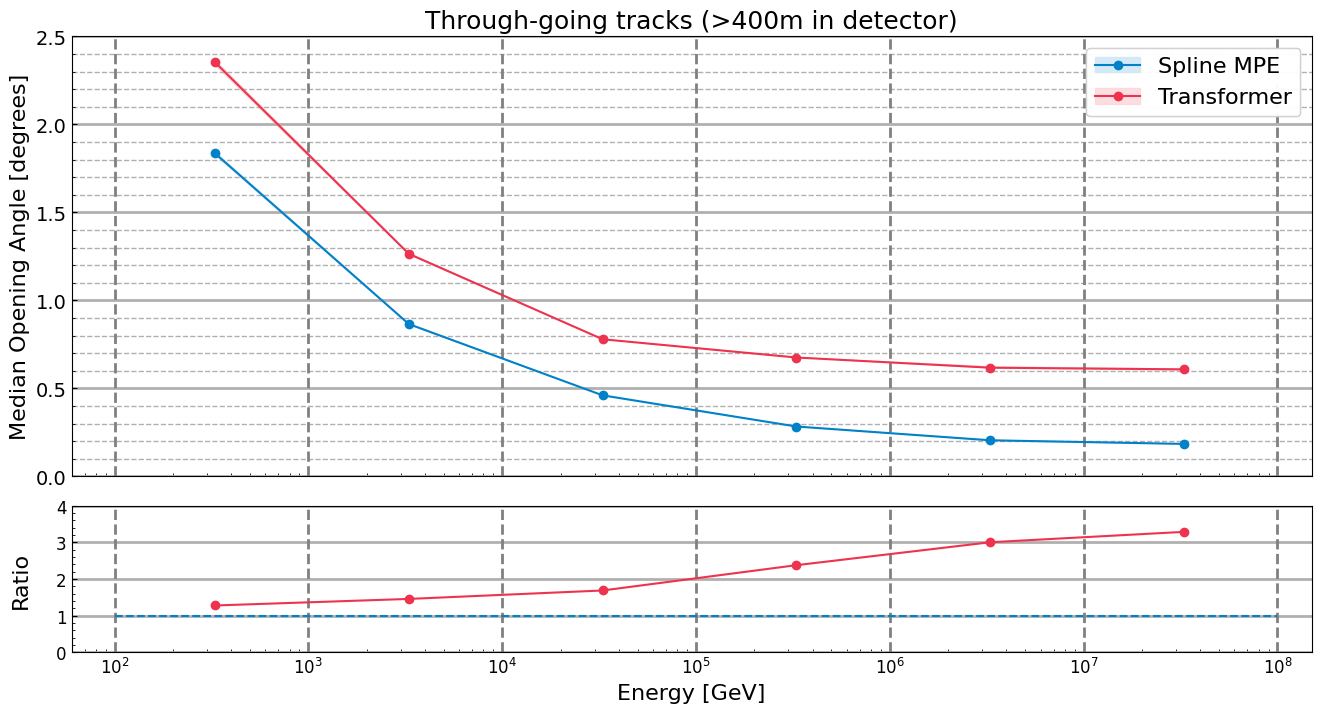

In [ ]:
median_opening_angle_through_going_spline_mpe_combined = np.concatenate((median_opening_angle_22010_through_going_spline_mpe, median_opening_angle_22011_through_going_spline_mpe, median_opening_angle_22012_through_going_spline_mpe))
lower_bound_through_going_spline_mpe_combined = np.concatenate((lower_bound_22010_through_going_spline_mpe, lower_bound_22011_through_going_spline_mpe, lower_bound_22012_through_going_spline_mpe))
upper_bound_through_going_spline_mpe_combined = np.concatenate((upper_bound_22010_through_going_spline_mpe, upper_bound_22011_through_going_spline_mpe, upper_bound_22012_through_going_spline_mpe))

median_opening_angle_through_going_combined = np.concatenate((median_opening_angle_22010_through_going, median_opening_angle_22011_through_going, median_opening_angle_22012_through_going))
lower_bound_through_going_combined = np.concatenate((lower_bound_22010_through_going, lower_bound_22011_through_going, lower_bound_22012_through_going))
upper_bound_through_going_combined = np.concatenate((upper_bound_22010_through_going, upper_bound_22011_through_going, upper_bound_22012_through_going))

percentile_25_through_going_combined = np.concatenate((percentile_25_22010_through_going, percentile_25_22011_through_going, percentile_25_22012_through_going))
percentile_75_through_going_combined = np.concatenate((percentile_75_22010_through_going, percentile_75_22011_through_going, percentile_75_22012_through_going))
percentile_25_through_going_combined_spline_mpe = np.concatenate((percentile_25_22010_through_going_spline_mpe, percentile_25_22011_through_going_spline_mpe, percentile_25_22012_through_going_spline_mpe))
percentile_75_through_going_combined_spline_mpe = np.concatenate((percentile_75_22010_through_going_spline_mpe, percentile_75_22011_through_going_spline_mpe, percentile_75_22012_through_going_spline_mpe))

print(f"Spline MPE: {median_opening_angle_through_going_spline_mpe_combined}")
print(f"IceCube Transformer: {median_opening_angle_through_going_combined}")


# bin centers
bin_centers_22010_through_going = (energy_bins_22010[:-1] + energy_bins_22010[1:]) / 2
bin_centers_22011_through_going = (energy_bins_22011[:-1] + energy_bins_22011[1:]) / 2
bin_centers_22012_through_going = (energy_bins_22012[:-1] + energy_bins_22012[1:]) / 2
bin_centers_combined = np.concatenate((bin_centers_22010_through_going, bin_centers_22011_through_going, bin_centers_22012_through_going))
bin_centers_combined = bin_centers_combined*0.6

# Plot
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2], hspace=0.1)
# Create subplots with GridSpec
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax)
# gray dashed lines at bin edges
for i in range(len(energy_bins_22010)-1):
    ax.axvline(x=energy_bins_22010[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22011)-1):
    ax.axvline(x=energy_bins_22011[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22012)):
    ax.axvline(x=energy_bins_22012[i], color='gray', linestyle='--', linewidth=2)
ax.plot(bin_centers_combined, median_opening_angle_through_going_spline_mpe_combined, marker='o', linestyle='-', label='Spline MPE')
ax.fill_between(bin_centers_combined, lower_bound_through_going_spline_mpe_combined, upper_bound_through_going_spline_mpe_combined, alpha=0.2)
ax.plot(bin_centers_combined, median_opening_angle_through_going_combined, marker='o', linestyle='-', label='Transformer')
ax.fill_between(bin_centers_combined, lower_bound_through_going_combined, upper_bound_through_going_combined, alpha=0.2)


ax.set_xscale('log')
ax.set_xlim(60, 1.5e8)
ax.set_ylim(0, 2.5)

# remove x tick labels on top plot but keep the ticks
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
relative_median_opening_angle = median_opening_angle_through_going_combined / median_opening_angle_through_going_spline_mpe_combined

# gray dashed lines at bin edges
for i in range(len(energy_bins_22010)-1):
    ax2.axvline(x=energy_bins_22010[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22011)-1):
    ax2.axvline(x=energy_bins_22011[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22012)):
    ax2.axvline(x=energy_bins_22012[i], color='gray', linestyle='--', linewidth=2)
ax2.plot(bin_centers_combined, relative_median_opening_angle, marker='o', linestyle='-', label='Relative Median Opening Angle', color=custom_colors[1])
#blue dashed line (horizontal) at 1 between first and last bin edge
x = np.linspace(energy_bins_22010[0], energy_bins_22012[-1], 100)
y = np.ones_like(x)
ax2.plot(x, y, color=custom_colors[0], linestyle='--' )
ax2.set_xscale('log')
ax2.set_ylim(0, 4)
ax2.grid(axis='y', linewidth=2)
ax2.set_ylabel('Ratio', fontsize=16, labelpad=18)
ax2.set_xlabel('Energy [GeV]', fontsize=16)
ax.set_ylabel('Median Opening Angle [degrees]', fontsize=16)
ax.set_title('Through-going tracks (>400m in detector)', fontsize=18)
ax.grid(axis='y', linewidth=2)
# dashed grid lines at minor ticks on y axis
ax.grid(which='minor', linestyle='--', linewidth=1, axis='y')

# add shaded area to the legend
# create a new legend for the markers
marker_handles = [plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[0], label='Spline MPE'),
                    plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[1], label='Transformer'),]

shaded_handles = [plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='Spline MPE'),
                    plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='Transformer')]


# add both legends to the plot
shaded_legend = ax.legend(handles=shaded_handles, loc='upper right', fontsize=16)
# add marker legend
marker_legend = ax.legend(handles=marker_handles, loc='upper right', fontsize=16)
ax.add_artist(shaded_legend)  # add the model legend to the plot
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### 🖼️ **Figure 7.23**  
**Starting tracks**  
Median opening angle between the true and predicted neutrino direction for the
transformer and SplineMPE for starting tracks. All test events shown have a minimum detector-
contained track length of 400 m. The shaded area indicates the 1σ confidence on the median.

In [ ]:
# same for starting tracks with 400m cut
median_opening_angle_22010_starting_400 = []
upper_bound_22010_starting_400 = []
lower_bound_22010_starting_400 = []
median_opening_angle_22011_starting_400 = []
upper_bound_22011_starting_400 = []
lower_bound_22011_starting_400 = []
median_opening_angle_22012_starting_400 = []
upper_bound_22012_starting_400 = []
lower_bound_22012_starting_400 = []

# 25% and 75% quantiles
percentile_25_22010_starting_400 = []
percentile_75_22010_starting_400 = []
percentile_25_22011_starting_400 = []
percentile_75_22011_starting_400 = []
percentile_25_22012_starting_400 = []
percentile_75_22012_starting_400 = []

# 22010
for i in range(len(energy_bins_22010)-1):
    mask = (truth_energy_22010 >= energy_bins_22010[i]) & (truth_energy_22010 < energy_bins_22010[i+1])
    mask = mask & TC_CC_mask_22010 & starting_event_22010_mask & through_going_400_mask_22010
    mask = mask & lvl3_mask_22010

    opening_angle_bin = opening_angle_22010[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22010_starting_400.append(lower_bound)
    upper_bound_22010_starting_400.append(upper_bound)
    median_opening_angle_22010_starting_400.append(median_opening_angle)
    # 25% and 75% quantiles
    percentile_25_22010_starting_400.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22010_starting_400.append(np.percentile(opening_angle_bin, 75))

# 22011
for i in range(len(energy_bins_22011)-1):
    mask = (truth_energy_22011 >= energy_bins_22011[i]) & (truth_energy_22011 < energy_bins_22011[i+1])
    mask = mask & TC_CC_mask_22011 & starting_event_22011_mask & through_going_400_mask_22011
    mask = mask & lvl3_mask_22011

    opening_angle_bin = opening_angle_22011[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22011_starting_400.append(lower_bound)
    upper_bound_22011_starting_400.append(upper_bound)
    median_opening_angle_22011_starting_400.append(median_opening_angle)
    # 25% and 75% quantiles
    percentile_25_22011_starting_400.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22011_starting_400.append(np.percentile(opening_angle_bin, 75))
# 22012
for i in range(len(energy_bins_22012)-1):
    mask = (truth_energy_22012 >= energy_bins_22012[i]) & (truth_energy_22012 < energy_bins_22012[i+1])
    mask = mask & TC_CC_mask_22012 & starting_event_22012_mask & through_going_400_mask_22012
    mask = mask & lvl3_mask_22012

    opening_angle_bin = opening_angle_22012[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22012_starting_400.append(lower_bound)
    upper_bound_22012_starting_400.append(upper_bound)
    median_opening_angle_22012_starting_400.append(median_opening_angle)
    # percentile 25 and 75
    percentile_25_22012_starting_400.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22012_starting_400.append(np.percentile(opening_angle_bin, 75))

# SPLINE MPE
median_opening_angle_22010_starting_400_spline_mpe = []
upper_bound_22010_starting_400_spline_mpe = []
lower_bound_22010_starting_400_spline_mpe = []
median_opening_angle_22011_starting_400_spline_mpe = []
upper_bound_22011_starting_400_spline_mpe = []
lower_bound_22011_starting_400_spline_mpe = []
median_opening_angle_22012_starting_400_spline_mpe = []
upper_bound_22012_starting_400_spline_mpe = []
lower_bound_22012_starting_400_spline_mpe = []

# 25% and 75% quantiles
percentile_25_22010_starting_400_spline_mpe = []
percentile_75_22010_starting_400_spline_mpe = []
percentile_25_22011_starting_400_spline_mpe = []
percentile_75_22011_starting_400_spline_mpe = []
percentile_25_22012_starting_400_spline_mpe = []
percentile_75_22012_starting_400_spline_mpe = []

# 22010
for i in range(len(energy_bins_22010)-1):
    mask = (spline_mpe_energy_22010 >= energy_bins_22010[i]) & (spline_mpe_energy_22010 < energy_bins_22010[i+1])
    mask = mask & lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped & starting_event_22010_mask_spline_mpe & through_going_400_mask_22010_spline_mpe

    opening_angle_bin = opening_angle_22010_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22010_starting_400_spline_mpe.append(lower_bound)
    upper_bound_22010_starting_400_spline_mpe.append(upper_bound)
    median_opening_angle_22010_starting_400_spline_mpe.append(median_opening_angle)
# 25% and 75% quantiles
    percentile_25_22010_starting_400_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22010_starting_400_spline_mpe.append(np.percentile(opening_angle_bin, 75))
# 22011
for i in range(len(energy_bins_22011)-1):
    mask = (spline_mpe_energy_22011 >= energy_bins_22011[i]) & (spline_mpe_energy_22011 < energy_bins_22011[i+1])
    mask = mask & lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped & starting_event_22011_mask_spline_mpe & through_going_400_mask_22011_spline_mpe

    opening_angle_bin = opening_angle_22011_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22011_starting_400_spline_mpe.append(lower_bound)
    upper_bound_22011_starting_400_spline_mpe.append(upper_bound)
    median_opening_angle_22011_starting_400_spline_mpe.append(median_opening_angle)
# 25% and 75% quantiles
    percentile_25_22011_starting_400_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22011_starting_400_spline_mpe.append(np.percentile(opening_angle_bin, 75))
# 22012
for i in range(len(energy_bins_22012)-1):
    mask = (spline_mpe_energy_22012 >= energy_bins_22012[i]) & (spline_mpe_energy_22012 < energy_bins_22012[i+1])
    mask = mask & lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped & starting_event_22012_mask_spline_mpe & through_going_400_mask_22012_spline_mpe

    opening_angle_bin = opening_angle_22012_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_22012_starting_400_spline_mpe.append(lower_bound)
    upper_bound_22012_starting_400_spline_mpe.append(upper_bound)
    median_opening_angle_22012_starting_400_spline_mpe.append(median_opening_angle)
# 25% and 75% quantiles
    percentile_25_22012_starting_400_spline_mpe.append(np.percentile(opening_angle_bin, 25))
    percentile_75_22012_starting_400_spline_mpe.append(np.percentile(opening_angle_bin, 75))

median_opening_angle_starting_400_spline_mpe_combined = np.concatenate((median_opening_angle_22010_starting_400_spline_mpe, median_opening_angle_22011_starting_400_spline_mpe, median_opening_angle_22012_starting_400_spline_mpe))
lower_bound_starting_400_spline_mpe_combined = np.concatenate((lower_bound_22010_starting_400_spline_mpe, lower_bound_22011_starting_400_spline_mpe, lower_bound_22012_starting_400_spline_mpe))
upper_bound_starting_400_spline_mpe_combined = np.concatenate((upper_bound_22010_starting_400_spline_mpe, upper_bound_22011_starting_400_spline_mpe, upper_bound_22012_starting_400_spline_mpe))
median_opening_angle_starting_400_combined = np.concatenate((median_opening_angle_22010_starting_400, median_opening_angle_22011_starting_400, median_opening_angle_22012_starting_400))
lower_bound_starting_400_combined = np.concatenate((lower_bound_22010_starting_400, lower_bound_22011_starting_400, lower_bound_22012_starting_400))
upper_bound_starting_400_combined = np.concatenate((upper_bound_22010_starting_400, upper_bound_22011_starting_400, upper_bound_22012_starting_400))
percentile_25_starting_400_combined = np.concatenate((percentile_25_22010_starting_400, percentile_25_22011_starting_400, percentile_25_22012_starting_400))
percentile_75_starting_400_combined = np.concatenate((percentile_75_22010_starting_400, percentile_75_22011_starting_400, percentile_75_22012_starting_400))
percentile_25_starting_400_combined_spline_mpe = np.concatenate((percentile_25_22010_starting_400_spline_mpe, percentile_25_22011_starting_400_spline_mpe, percentile_25_22012_starting_400_spline_mpe))
percentile_75_starting_400_combined_spline_mpe = np.concatenate((percentile_75_22010_starting_400_spline_mpe, percentile_75_22011_starting_400_spline_mpe, percentile_75_22012_starting_400_spline_mpe))
bin_centers_22010_starting_400 = (energy_bins_22010[:-1] + energy_bins_22010[1:]) / 2
bin_centers_22011_starting_400 = (energy_bins_22011[:-1] + energy_bins_22011[1:]) / 2
bin_centers_22012_starting_400 = (energy_bins_22012[:-1] + energy_bins_22012[1:]) / 2
bin_centers_combined = np.concatenate((bin_centers_22010_starting_400, bin_centers_22011_starting_400, bin_centers_22012_starting_400))
bin_centers_combined = bin_centers_combined*0.6

Opening angle transformer:
[3.38704622 1.66112344 0.86968865 0.73198173 0.69166874 0.65759486]

Opening angle spline MPE:
[2.93342551 1.66241652 0.80888597 0.46081212 0.32108188 0.31346122]

Relative median opening angle:
[1.15463857 0.99922217 1.07516842 1.58846026 2.15418183 2.09785076]


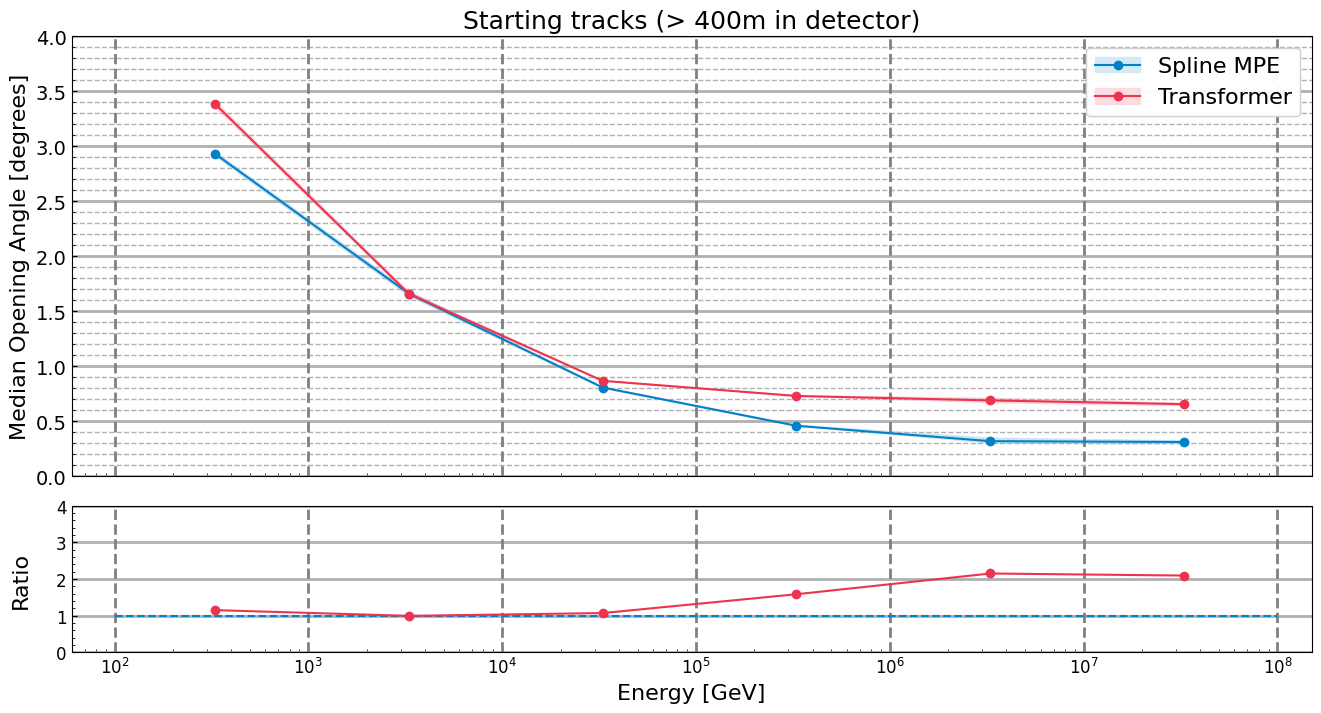

In [ ]:
#plot 
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2], hspace=0.1)
# Create subplots with GridSpec
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax)
# gray dashed lines at bin edges
for i in range(len(energy_bins_22010)-1):
    ax.axvline(x=energy_bins_22010[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22011)-1):
    ax.axvline(x=energy_bins_22011[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22012)):
    ax.axvline(x=energy_bins_22012[i], color='gray', linestyle='--', linewidth=2)
ax.plot(bin_centers_combined, median_opening_angle_starting_400_spline_mpe_combined, marker='o', linestyle='-', label='Spline MPE')
ax.fill_between(bin_centers_combined, lower_bound_starting_400_spline_mpe_combined, upper_bound_starting_400_spline_mpe_combined, alpha=0.2)
ax.plot(bin_centers_combined, median_opening_angle_starting_400_combined, marker='o', linestyle='-', label='IceCube Transformer')
ax.fill_between(bin_centers_combined, lower_bound_starting_400_combined, upper_bound_starting_400_combined, alpha=0.2)

ax.set_xscale('log')
ax.set_xlim(60, 1.5e8)
ax.set_ylim(0, 4)
# remove x tick labels on top plot but keep the ticks
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
relative_median_opening_angle = median_opening_angle_starting_400_combined / median_opening_angle_starting_400_spline_mpe_combined
relative_median_opening_angle = np.array(relative_median_opening_angle)

print('Opening angle transformer:')
print(median_opening_angle_starting_400_combined)
print('\nOpening angle spline MPE:')
print(median_opening_angle_starting_400_spline_mpe_combined)
print('\nRelative median opening angle:')
print(relative_median_opening_angle)
error_on_relative_upper = 1/median_opening_angle_starting_400_spline_mpe_combined * (upper_bound_starting_400_combined - median_opening_angle_starting_400_spline_mpe_combined) - median_opening_angle_starting_400_spline_mpe_combined / median_opening_angle_starting_400_combined**2 * (upper_bound_starting_400_spline_mpe_combined - median_opening_angle_starting_400_combined)
error_on_relative_lower = 1/median_opening_angle_starting_400_spline_mpe_combined * (median_opening_angle_starting_400_combined - lower_bound_starting_400_spline_mpe_combined) - median_opening_angle_starting_400_spline_mpe_combined / median_opening_angle_starting_400_combined**2 * (median_opening_angle_starting_400_combined - lower_bound_starting_400_combined)
# gray dashed lines at bin edges
for i in range(len(energy_bins_22010)-1):
    ax2.axvline(x=energy_bins_22010[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22011)-1):
    ax2.axvline(x=energy_bins_22011[i], color='gray', linestyle='--', linewidth=2)
for i in range(len(energy_bins_22012)):
    ax2.axvline(x=energy_bins_22012[i], color='gray', linestyle='--', linewidth=2)
x = np.linspace(energy_bins_22010[0], energy_bins_22012[-1], 100)
y = np.ones_like(x)
ax2.plot(x, y, color=custom_colors[0], linestyle='--' )
ax2.plot(bin_centers_combined, relative_median_opening_angle, marker='o', linestyle='-', label='Relative Median Opening Angle', color=custom_colors[1])

#blue dashed line (horizontal) at 1 between first and last bin edge
ax2.set_xscale('log')
ax2.set_ylim(0, 4)
ax2.grid(axis='y', linewidth=2)
ax2.set_ylabel('Ratio', fontsize=16, labelpad=18)
ax2.set_xlabel('Energy [GeV]', fontsize=16)
ax.set_ylabel('Median Opening Angle [degrees]', fontsize=16)
ax.set_title('Starting tracks (> 400m in detector)', fontsize=18)

# create a new legend for the markers
marker_handles = [plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[0], label='Spline MPE'),
                    plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[1], label='Transformer'),]

shaded_handles = [plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='Spline MPE'),
                    plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='Transformer')]

# add both legends to the plot
shaded_legend = ax.legend(handles=shaded_handles, loc='upper right', fontsize=16)
# add marker legend to top middle
marker_legend = ax.legend(handles=marker_handles, loc='upper right', fontsize=16)
ax.add_artist(shaded_legend)  # add the model legend to the plot
# ticksize 14
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(axis='y', linewidth=2)
ax.grid(which='minor', linestyle='--', linewidth=1, axis='y')
plt.show()

### 🖼️ **Figure 7.24**  
**Opening angle vs track length**  
Median opening angle between the true and predicted neutrino direction for the
transformer and SplineMPE for starting tracks. All test events shown have a minimum detector-
contained track length of 400 m. The shaded area indicates the 1σ confidence on the median.

In [ ]:
truth_total_22010_intersect = truth_total_22010[lvl3_mask_22010 & TC_CC_mask_22010]
spline_mpe_22010_intersect = spline_mpe_22010[lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped]
truth_total_22011_intersect = truth_total_22011[lvl3_mask_22011 & TC_CC_mask_22011]
spline_mpe_22011_intersect = spline_mpe_22011[lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped]
truth_total_22012_intersect = truth_total_22012[lvl3_mask_22012 & TC_CC_mask_22012]
spline_mpe_22012_intersect = spline_mpe_22012[lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped]

opeing_angle_22010_intersect = opening_angle_22010[lvl3_mask_22010 & TC_CC_mask_22010]
opeing_angle_22011_intersect = opening_angle_22011[lvl3_mask_22011 & TC_CC_mask_22011]
opeing_angle_22012_intersect = opening_angle_22012[lvl3_mask_22012 & TC_CC_mask_22012]

track_length_22010_intersect = truth_total_22010_intersect['lepton_intra_distance']
track_length_22011_intersect = truth_total_22011_intersect['lepton_intra_distance']
track_length_22012_intersect = truth_total_22012_intersect['lepton_intra_distance']

starting_track_22010_intersect = truth_total_22010_intersect['isWithinIceCube']
starting_track_22011_intersect = truth_total_22011_intersect['isWithinIceCube']
starting_track_22012_intersect = truth_total_22012_intersect['isWithinIceCube']

opening_angle_22010_spline_mpe_intersect = spline_mpe_22010_intersect['opening_angle']
opening_angle_22011_spline_mpe_intersect = spline_mpe_22011_intersect['opening_angle']
opening_angle_22012_spline_mpe_intersect = spline_mpe_22012_intersect['opening_angle']

truth_energy_22010_intersect = truth_total_22010_intersect['energy']
truth_energy_22011_intersect = truth_total_22011_intersect['energy']
truth_energy_22012_intersect = truth_total_22012_intersect['energy']

# concatenate all data
track_length_combined_intersect = np.concatenate((track_length_22010_intersect, track_length_22011_intersect, track_length_22012_intersect))
starting_track_combined_intersect = np.concatenate((starting_track_22010_intersect, starting_track_22011_intersect, starting_track_22012_intersect))
opening_angle_combined_intersect = np.concatenate((opeing_angle_22010_intersect, opeing_angle_22011_intersect, opeing_angle_22012_intersect))
opening_angle_combined_spline_mpe_intersect = np.concatenate((opening_angle_22010_spline_mpe_intersect, opening_angle_22011_spline_mpe_intersect, opening_angle_22012_spline_mpe_intersect))
truth_energy_combined_intersect = np.concatenate((truth_energy_22010_intersect, truth_energy_22011_intersect, truth_energy_22012_intersect))

In [ ]:
track_length_bins = np.linspace(0.1, 1400.1, 15)
median_opening_angle_through_going_track_length_intersect = []
upper_bound_through_going_track_length_intersect = []
lower_bound_through_going_track_length_intersect = []
median_opening_angle_starting_track_length_intersect = []
upper_bound_starting_track_length_intersect = []
lower_bound_starting_track_length_intersect = []

median_opening_angle_through_going_track_length_spline_mpe_intersect = []
upper_bound_through_going_track_length_spline_mpe_intersect = []
lower_bound_through_going_track_length_spline_mpe_intersect = []
median_opening_angle_starting_track_length_spline_mpe_intersect = []
upper_bound_starting_track_length_spline_mpe_intersect = []
lower_bound_starting_track_length_spline_mpe_intersect = []

# all parts combined
for i in range(len(track_length_bins)-1):
    mask = (track_length_combined_intersect >= track_length_bins[i]) & (track_length_combined_intersect < track_length_bins[i+1])
    mask_starting = mask & starting_track_combined_intersect
    mask_through_going = mask & ~starting_track_combined_intersect

    # convert to boolean mask
    mask_starting = mask_starting.astype(bool)
    mask_through_going = mask_through_going.astype(bool)

    # starting track
    opening_angle_bin_starting = opening_angle_combined_intersect[mask_starting]
    median_opening_angle_starting = np.median(opening_angle_bin_starting)
    sorted_opening_angle_bin_starting = np.sort(opening_angle_bin_starting)
    N_samples_starting = np.sum(mask_starting)
    lower_bound_starting, upper_bound_starting = get_quantile_bounds(quantile=0.5, N_samples=N_samples_starting)
    lower_bound_starting = sorted_opening_angle_bin_starting[lower_bound_starting]
    upper_bound_starting = sorted_opening_angle_bin_starting[upper_bound_starting]
    median_opening_angle_starting_track_length_intersect.append(median_opening_angle_starting)
    lower_bound_starting_track_length_intersect.append(lower_bound_starting)
    upper_bound_starting_track_length_intersect.append(upper_bound_starting)

    # through going track
    opening_angle_bin_through_going = opening_angle_combined_intersect[mask_through_going]
    median_opening_angle_through_going = np.median(opening_angle_bin_through_going)
    sorted_opening_angle_bin_through_going = np.sort(opening_angle_bin_through_going)
    N_samples_through_going = np.sum(mask_through_going)
    lower_bound_through_going, upper_bound_through_going = get_quantile_bounds(quantile=0.5, N_samples=N_samples_through_going)
    lower_bound_through_going = sorted_opening_angle_bin_through_going[lower_bound_through_going]
    upper_bound_through_going = sorted_opening_angle_bin_through_going[upper_bound_through_going]
    median_opening_angle_through_going_track_length_intersect.append(median_opening_angle_through_going)
    lower_bound_through_going_track_length_intersect.append(lower_bound_through_going)
    upper_bound_through_going_track_length_intersect.append(upper_bound_through_going)

    # spline mpe starting track
    opening_angle_bin_starting_spline_mpe = opening_angle_combined_spline_mpe_intersect[mask_starting]
    median_opening_angle_starting_spline_mpe = np.median(opening_angle_bin_starting_spline_mpe)
    sorted_opening_angle_bin_starting_spline_mpe = np.sort(opening_angle_bin_starting_spline_mpe)
    N_samples_starting_spline_mpe = np.sum(mask_starting)
    lower_bound_starting_spline_mpe, upper_bound_starting_spline_mpe = get_quantile_bounds(quantile=0.5, N_samples=N_samples_starting_spline_mpe)
    lower_bound_starting_spline_mpe = sorted_opening_angle_bin_starting_spline_mpe[lower_bound_starting_spline_mpe]
    upper_bound_starting_spline_mpe = sorted_opening_angle_bin_starting_spline_mpe[upper_bound_starting_spline_mpe]
    median_opening_angle_starting_track_length_spline_mpe_intersect.append(median_opening_angle_starting_spline_mpe)
    lower_bound_starting_track_length_spline_mpe_intersect.append(lower_bound_starting_spline_mpe)
    upper_bound_starting_track_length_spline_mpe_intersect.append(upper_bound_starting_spline_mpe)

    # through going track
    opening_angle_bin_through_going_spline_mpe = opening_angle_combined_spline_mpe_intersect[mask_through_going]
    median_opening_angle_through_going_spline_mpe = np.median(opening_angle_bin_through_going_spline_mpe)
    sorted_opening_angle_bin_through_going_spline_mpe = np.sort(opening_angle_bin_through_going_spline_mpe)
    N_samples_through_going_spline_mpe = np.sum(mask_through_going)
    lower_bound_through_going_spline_mpe, upper_bound_through_going_spline_mpe = get_quantile_bounds(quantile=0.5, N_samples=N_samples_through_going_spline_mpe)
    lower_bound_through_going_spline_mpe = sorted_opening_angle_bin_through_going_spline_mpe[lower_bound_through_going_spline_mpe]
    upper_bound_through_going_spline_mpe = sorted_opening_angle_bin_through_going_spline_mpe[upper_bound_through_going_spline_mpe]
    median_opening_angle_through_going_track_length_spline_mpe_intersect.append(median_opening_angle_through_going_spline_mpe)
    lower_bound_through_going_track_length_spline_mpe_intersect.append(lower_bound_through_going_spline_mpe)
    upper_bound_through_going_track_length_spline_mpe_intersect.append(upper_bound_through_going_spline_mpe)

In [ ]:
print('Median opening angle through going SplineMPE:')
print(median_opening_angle_through_going_track_length_spline_mpe_intersect)
print('\nMedian opening angle starting SplineMPE:')
print(median_opening_angle_starting_track_length_spline_mpe_intersect)

print('\nMedian opening angle through going transformer:')
print(median_opening_angle_through_going_track_length_intersect)
print('\nMedian opening angle starting transformer:')
print(median_opening_angle_starting_track_length_intersect)

Median opening angle through going SplineMPE:
[5.982645799722399, 3.452740777319438, 2.2357576016690643, 1.57960344152974, 1.1810588648986862, 0.9812738116554682, 0.8352006165541471, 0.6917304628137688, 0.5802476017722471, 0.4780840884602642, 0.4584596385497423, 0.38433067221997874, 0.34141932783566264, 0.3065628904078089]

Median opening angle starting SplineMPE:
[86.75186428469854, 36.69644806815614, 7.866689612086151, 4.355125192344943, 3.176717828682855, 2.4942950632933782, 2.029043023678693, 1.6302247375625207, 1.4742531871722715, 1.2872386975585988, 1.2183991480383582, 1.065195691201149, 1.1129046937403881, 1.0441365393147002]

Median opening angle through going transformer:
[3.2826339931697555, 2.691802142321608, 2.214522038330892, 1.8038836608676208, 1.5002265490931028, 1.2927876239644738, 1.1634034487790954, 1.0195141738750415, 0.9015881889780306, 0.8100635442698071, 0.7964956570698971, 0.7473138946412903, 0.7036591062985597, 0.6669498014388268]

Median opening angle starting 

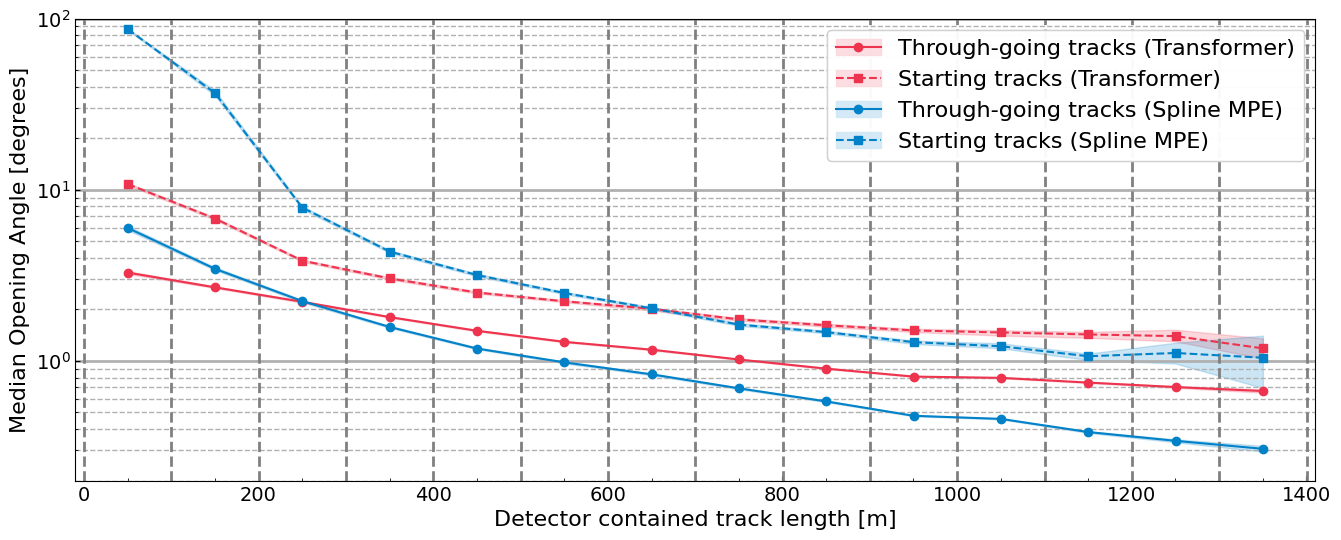

In [ ]:
# plot opening angle as function of track length
track_length_bins_centers = (track_length_bins[:-1] + track_length_bins[1:]) / 2
track_length_bins_centers = track_length_bins_centers
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 1, height_ratios=[6], hspace=0.1)
# Create subplots with GridSpec
ax = fig.add_subplot(gs[0])
# gray dashed lines at bin edges
for i in range(len(track_length_bins)):
    ax.axvline(x=track_length_bins[i], color='gray', linestyle='--', linewidth=2)
# blue and red bar chart for events in each bin
ax.plot(track_length_bins_centers, median_opening_angle_through_going_track_length_intersect, marker='o', linestyle='-', label='Throughgoing tracks (transformer)', color=custom_colors[1])
ax.fill_between(track_length_bins_centers, lower_bound_through_going_track_length_intersect, upper_bound_through_going_track_length_intersect, alpha=0.2, color=custom_colors[1])

ax.plot(track_length_bins_centers, median_opening_angle_starting_track_length_intersect, marker='s', linestyle='--', label='Starting tracks (transformer)', color=custom_colors[1])
ax.fill_between(track_length_bins_centers, lower_bound_starting_track_length_intersect, upper_bound_starting_track_length_intersect, alpha=0.2, color=custom_colors[1])

ax.plot(track_length_bins_centers, median_opening_angle_through_going_track_length_spline_mpe_intersect, marker='o', linestyle='-', label='Throughgoing tracks (Spline MPE)', color=custom_colors[0])
ax.fill_between(track_length_bins_centers, lower_bound_through_going_track_length_spline_mpe_intersect, upper_bound_through_going_track_length_spline_mpe_intersect, alpha=0.2, color=custom_colors[0])

ax.plot(track_length_bins_centers, median_opening_angle_starting_track_length_spline_mpe_intersect, marker='s', linestyle='--', label='Starting tracks (Spline MPE)', color=custom_colors[0])
ax.fill_between(track_length_bins_centers, lower_bound_starting_track_length_spline_mpe_intersect, upper_bound_starting_track_length_spline_mpe_intersect, alpha=0.2, color=custom_colors[0])

ax.set_xlim(-10, 1410)
ax.set_ylim(0.2, 100)

plt.grid(axis='y', linewidth=2)
# dashed grid lines at minor ticks on y axis
plt.grid(which='minor', linestyle='--', linewidth=1, axis='y')

ax.set_xlabel('Detector contained track length [m]', fontsize=16)
ax.set_ylabel('Median Opening Angle [degrees]', fontsize=16)
ax.set_yscale('log')

# create a new legend for the markers
marker_handles = [plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[1], label='Through-going tracks (Transformer)'),
                  plt.Line2D([0], [0], marker='s', linestyle='--', color=custom_colors[1], label='Starting tracks (Transformer)'),
                  plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[0], label='Through-going tracks (Spline MPE)'),
                  plt.Line2D([0], [0], marker='s', linestyle='--', color=custom_colors[0], label='Starting tracks (Spline MPE)'),]

shaded_handles = [plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='Through-going tracks (Transformer)'),
                    plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='Starting tracks (Transformer)'),
                    plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='Through-going tracks (Spline MPE)'),
                    plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='Starting tracks (Spline MPE)')]


# add both legends to the plot
shaded_legend = ax.legend(handles=shaded_handles, loc='upper right', fontsize=16)
# add marker legend 
marker_legend = ax.legend(handles=marker_handles, loc='upper right', fontsize=16)
ax.add_artist(shaded_legend)  # add the model legend to the plot
# axis tick size 14
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### 🖼️ **Figures 7.25/7.26**  
**Heatmap opening angle vs energy and track length**  
atio of the median opening angle between predicted and true neutrino direction for
the transformer to SplineMPE for through-going tracks and starting tracks, as a function of both energy and detector-
contained track length. The small number in parentheses below the ratio shows the number
of testing events in each bin. Normalized color scales highlight regions where the transformer
outperforms SplineMPE in red, while the opposite is indicated in blue.

In [ ]:
# track length bins
track_length_bins = np.linspace(0.1, 1400.1, 8)
# energy bins
energy_bins = np.logspace(2, 8, 7)

# create a meshgrid of track length and energy bins
grid = np.meshgrid(track_length_bins, energy_bins, indexing='ij')

# print shape of grid
print(np.shape(grid))

median_opening_angle_grid = np.zeros((len(track_length_bins)-1, len(energy_bins)-1))
median_opening_angle_grid_spline_mpe = np.zeros((len(track_length_bins)-1, len(energy_bins)-1))

events_per_bin = np.zeros((len(track_length_bins)-1, len(energy_bins)-1))

for i in range(len(track_length_bins)-1):
    for j in range(len(energy_bins)-1):
        # mask for track length and energy
        mask = (track_length_combined_intersect >= track_length_bins[i]) & (track_length_combined_intersect < track_length_bins[i+1])
        mask = mask & (truth_energy_combined_intersect >= energy_bins[j]) & (truth_energy_combined_intersect < energy_bins[j+1])
        mask = mask & starting_track_combined_intersect

        # convert to boolean mask
        mask = mask.astype(bool)
        n_events = np.sum(mask)
        events_per_bin[i, j] = n_events
 
        # transformer
        opening_angle_bin = opening_angle_combined_intersect[mask]
        median_opening_angle = np.median(opening_angle_bin)
        median_opening_angle_grid[i, j] = median_opening_angle

        # spline mpe
        opening_angle_bin_spline_mpe = opening_angle_combined_spline_mpe_intersect[mask]
        median_opening_angle_spline_mpe = np.median(opening_angle_bin_spline_mpe)
        median_opening_angle_grid_spline_mpe[i, j] = median_opening_angle_spline_mpe

(2, 8, 7)


In [ ]:
grid_ratio = median_opening_angle_grid / median_opening_angle_grid_spline_mpe
grid_ratio_original = grid_ratio.copy()

# normalize all grid ratios < 1 between 0 and 1
grid_ratio[grid_ratio < 1] = (grid_ratio[grid_ratio < 1] - np.min(grid_ratio[grid_ratio < 1])) / (1 - np.min(grid_ratio[grid_ratio < 1]))
# normalize all grid ratios > 1 between 1 and 2
grid_ratio[grid_ratio > 1] = (grid_ratio[grid_ratio > 1] - 1) / (np.max(grid_ratio[grid_ratio > 1]) - 1) + 1

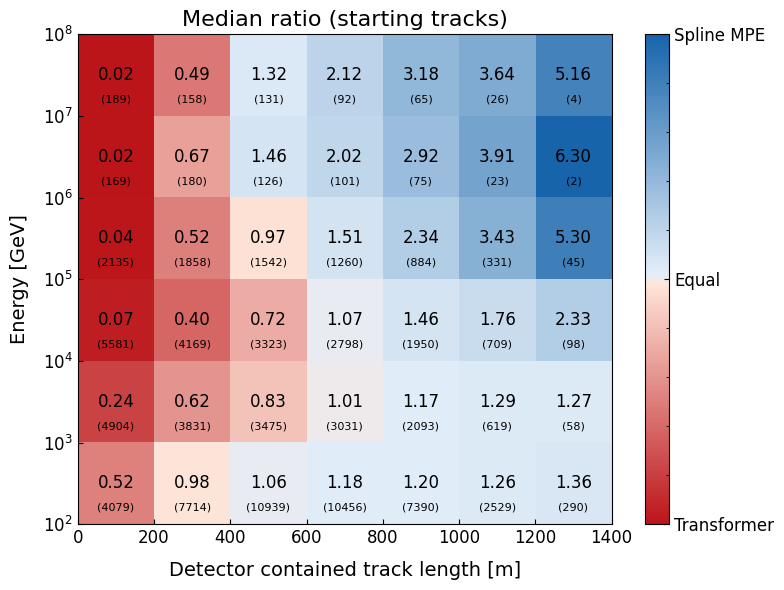

In [ ]:
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

# --- Define Normalization (still use TwoSlopeNorm) ---
vcenter = 1
vmin = np.min(grid_ratio)
vmax = np.max(grid_ratio)
norm = TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

# --- Define Custom Colormap for Sharp Transition ---
# Define nodes and colors for the colormap.
# Nodes are in the range [0, 1]. We put the transition colors very close to 0.5.
epsilon = 0.01 # How sharp the transition is (smaller = sharper)
nodes = [0.0, 0.5 - epsilon, 0.5 + epsilon, 1.0]

# Define corresponding colors (e.g., Dark Blue -> Lighter Blue -> Lighter Red -> Dark Red)
# Using colors from existing sequential maps:
colors = [plt.cm.Reds(0.8), plt.cm.Reds(0.1), # Dark to light blue ending near center
          plt.cm.Blues(0.1), plt.cm.Blues(0.8)]      # Light to dark red starting near center

# Create the colormap
cmap_sharp = LinearSegmentedColormap.from_list(
    "BlueRedSharp", list(zip(nodes, colors))
)


# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the heatmap using the TwoSlopeNorm and the SHARP custom colormap
c = ax.imshow(
    grid_ratio.T,
    cmap=cmap_sharp, # Use the custom sharp colormap
    norm=norm,      # Use the TwoSlopeNorm
    aspect='auto',
    origin='lower',
    interpolation='nearest',
)

# Set the colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Ratio (Transformer / Spline MPE) - Sharp Transition', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# set ticks to be "Transformer, Equal, Spline MPE" at 0, 1, 2
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Transformer', 'Equal', 'Spline MPE'])

# Set labels and title
ax.set_xlabel('Detector contained track length [m]', fontsize=14, labelpad=10)
ax.set_ylabel('Energy [GeV]', fontsize=14, labelpad=10)
ax.set_title('Median ratio (starting tracks)', fontsize=16)

# set x ticks to be from 0 to 1400 in step of 200
ax.set_xticks(np.arange(-0.5, 7.5))
ax.set_xticklabels(np.arange(0, 1401, 200), fontsize=12)

ax.set_yticks(np.arange(-0.5, 6.5))
ax.set_yticklabels(['$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$'], fontsize=12)

# disable minor ticks on both axes
ax.tick_params(axis='both', which='minor', bottom=False, top=False, left=False, right=False)

#print the numbers from the original grid ratio on the heatmap and the number of events in each bin
for i in range(len(grid_ratio_original.T)):
    for j in range(len(grid_ratio_original.T[i])):
        ax.text(j, i, f"{grid_ratio_original.T[i, j]:.2f}", ha='center', va='center', color='black', fontsize=12)
        ax.text(j, i-0.3, f"({events_per_bin.T[i, j]:.0f})", ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# track length bins
track_length_bins = np.linspace(0.1, 1400.1, 8)
# energy bins
energy_bins = np.logspace(2, 8, 7)

# create a meshgrid of track length and energy bins
grid = np.meshgrid(track_length_bins, energy_bins, indexing='ij')

median_opening_angle_grid = np.zeros((len(track_length_bins)-1, len(energy_bins)-1))
median_opening_angle_grid_spline_mpe = np.zeros((len(track_length_bins)-1, len(energy_bins)-1))

events_per_bin = np.zeros((len(track_length_bins)-1, len(energy_bins)-1))

for i in range(len(track_length_bins)-1):
    for j in range(len(energy_bins)-1):
        # mask for track length and energy
        mask = (track_length_combined_intersect >= track_length_bins[i]) & (track_length_combined_intersect < track_length_bins[i+1])
        mask = mask & (truth_energy_combined_intersect >= energy_bins[j]) & (truth_energy_combined_intersect < energy_bins[j+1])
        mask = mask & ~starting_track_combined_intersect

        # convert to boolean mask
        mask = mask.astype(bool)
        n_events = np.sum(mask)
        events_per_bin[i, j] = n_events
 
        # transformer
        opening_angle_bin = opening_angle_combined_intersect[mask]
        median_opening_angle = np.median(opening_angle_bin)
        median_opening_angle_grid[i, j] = median_opening_angle

        # spline mpe
        opening_angle_bin_spline_mpe = opening_angle_combined_spline_mpe_intersect[mask]
        median_opening_angle_spline_mpe = np.median(opening_angle_bin_spline_mpe)
        median_opening_angle_grid_spline_mpe[i, j] = median_opening_angle_spline_mpe

(2, 8, 7)


In [ ]:
grid_ratio = median_opening_angle_grid / median_opening_angle_grid_spline_mpe
grid_ratio_original = grid_ratio.copy()

# normalize all grid ratios < 1 between 0 and 1
grid_ratio[grid_ratio < 1] = (grid_ratio[grid_ratio < 1] - np.min(grid_ratio[grid_ratio < 1])) / (1 - np.min(grid_ratio[grid_ratio < 1]))
# normalize all grid ratios > 1 between 1 and 2
grid_ratio[grid_ratio > 1] = (grid_ratio[grid_ratio > 1] - 1) / (np.max(grid_ratio[grid_ratio > 1]) - 1) + 1

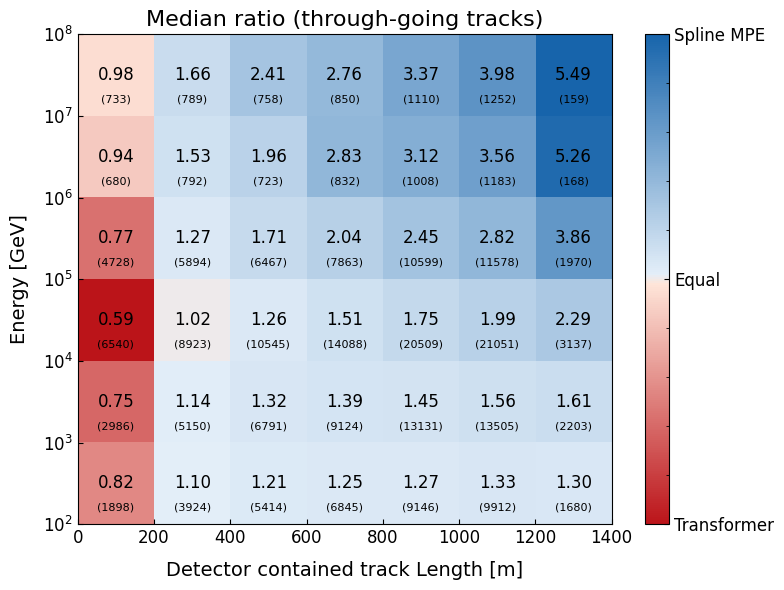

In [ ]:
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

# --- Define Normalization (still use TwoSlopeNorm) ---
vcenter = 1
vmin = np.min(grid_ratio)
vmax = np.max(grid_ratio)
norm = TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

# --- Define Custom Colormap for Sharp Transition ---
# Define nodes and colors for the colormap.
# Nodes are in the range [0, 1]. We put the transition colors very close to 0.5.
epsilon = 0.01 # How sharp the transition is (smaller = sharper)
nodes = [0.0, 0.5 - epsilon, 0.5 + epsilon, 1.0]

# Define corresponding colors (e.g., Dark Blue -> Lighter Blue -> Lighter Red -> Dark Red)
# Using colors from existing sequential maps:
colors = [plt.cm.Reds(0.8), plt.cm.Reds(0.1), # Dark to light blue ending near center
          plt.cm.Blues(0.1), plt.cm.Blues(0.8)]      # Light to dark red starting near center

# Create the colormap
cmap_sharp = LinearSegmentedColormap.from_list(
    "BlueRedSharp", list(zip(nodes, colors))
)


# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the heatmap using the TwoSlopeNorm and the SHARP custom colormap
c = ax.imshow(
    grid_ratio.T,
    cmap=cmap_sharp, # Use the custom sharp colormap
    norm=norm,      # Use the TwoSlopeNorm
    aspect='auto',
    origin='lower',
    interpolation='nearest',
)

# Set the colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Ratio (Transformer / Spline MPE) - Sharp Transition', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# set ticks to be "Transformer, Equal, Spline MPE" at 0, 1, 2
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Transformer', 'Equal', 'Spline MPE'])

# Set labels and title
ax.set_xlabel('Detector contained track Length [m]', fontsize=14, labelpad=10)
ax.set_ylabel('Energy [GeV]', fontsize=14, labelpad=10)
ax.set_title('Median ratio (through-going tracks)', fontsize=16)

# set x ticks to be from 0 to 1400 in step of 200
ax.set_xticks(np.arange(-0.5, 7.5))
ax.set_xticklabels(np.arange(0, 1401, 200), fontsize=12)

ax.set_yticks(np.arange(-0.5, 6.5))
ax.set_yticklabels(['$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$'], fontsize=12)

# disable minor ticks on both axes
ax.tick_params(axis='both', which='minor', bottom=False, top=False, left=False, right=False)

#print the numbers from the original grid ratio on the heatmap and the number of events in each bin
for i in range(len(grid_ratio_original.T)):
    for j in range(len(grid_ratio_original.T[i])):
        ax.text(j, i, f"{grid_ratio_original.T[i, j]:.2f}", ha='center', va='center', color='black', fontsize=12)
        ax.text(j, i-0.3, f"({events_per_bin.T[i, j]:.0f})", ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

### 🖼️ **Figures 7.27/7.28/7.29**  
**Opening angle as function of zenith angle**  
Median opening angle between true and predicted neutrino angle as a function of
true zenith angle for the 22010/22011/22012 dataset. The results are shown for SplineMPE (blue) and the
transformer (red), with shaded areas indicating the 1σ confidence bounds on the median. The
gray histogram shows the shape of a normalized distribution of the true zenith angle, scaled to
the y-axis for visualization.

In [ ]:
# thorsten cut lvl 3 as a function of true zenith 
zenith_bins = np.linspace(0, np.pi, 10)

median_opening_angle_zenith_22010 = []
upper_bound_zenith_22010 = []
lower_bound_zenith_22010 = []

median_opening_angle_zenith_22011 = []
upper_bound_zenith_22011 = []
lower_bound_zenith_22011 = []

median_opening_angle_zenith_22012 = []
upper_bound_zenith_22012 = []
lower_bound_zenith_22012 = []

# 22010
for i in range(len(zenith_bins)-1):
    mask = (truth_zenith_22010 >= zenith_bins[i]) & (truth_zenith_22010 < zenith_bins[i+1])
    mask = mask & TC_CC_mask_22010
    mask = mask & lvl3_mask_22010
    #mask = mask & through_going_400_mask_22010

    opening_angle_bin = opening_angle_22010[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_zenith_22010.append(lower_bound)
    upper_bound_zenith_22010.append(upper_bound)
    median_opening_angle_zenith_22010.append(median_opening_angle)

# 22011
for i in range(len(zenith_bins)-1):
    mask = (truth_zenith_22011 >= zenith_bins[i]) & (truth_zenith_22011 < zenith_bins[i+1])
    mask = mask & TC_CC_mask_22011
    mask = mask & lvl3_mask_22011
    #mask = mask & through_going_400_mask_22011

    opening_angle_bin = opening_angle_22011[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_zenith_22011.append(lower_bound)
    upper_bound_zenith_22011.append(upper_bound)
    median_opening_angle_zenith_22011.append(median_opening_angle)
# 22012
for i in range(len(zenith_bins)-1):
    mask = (truth_zenith_22012 >= zenith_bins[i]) & (truth_zenith_22012 < zenith_bins[i+1])
    mask = mask & TC_CC_mask_22012
    mask = mask & lvl3_mask_22012
    #mask = mask & through_going_400_mask_22012

    opening_angle_bin = opening_angle_22012[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_zenith_22012.append(lower_bound)
    upper_bound_zenith_22012.append(upper_bound)
    median_opening_angle_zenith_22012.append(median_opening_angle)

# SPLINE MPE
median_opening_angle_zenith_spline_mpe_22010 = []
upper_bound_zenith_spline_mpe_22010 = []
lower_bound_zenith_spline_mpe_22010 = []

median_opening_angle_zenith_spline_mpe_22011 = []
upper_bound_zenith_spline_mpe_22011 = []
lower_bound_zenith_spline_mpe_22011 = []

median_opening_angle_zenith_spline_mpe_22012 = []
upper_bound_zenith_spline_mpe_22012 = []
lower_bound_zenith_spline_mpe_22012 = []
# 22010
for i in range(len(zenith_bins)-1):
    mask = (truth_zenith_22010_spline_mpe >= zenith_bins[i]) & (truth_zenith_22010_spline_mpe < zenith_bins[i+1])
    mask = mask & lvl3_mask_22010_flipped & TC_CC_mask_22010_flipped #& through_going_400_mask_22010_spline_mpe

    opening_angle_bin = opening_angle_22010_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_zenith_spline_mpe_22010.append(lower_bound)
    upper_bound_zenith_spline_mpe_22010.append(upper_bound)
    median_opening_angle_zenith_spline_mpe_22010.append(median_opening_angle)

# 22011
for i in range(len(zenith_bins)-1):
    mask = (truth_zenith_22011_spline_mpe >= zenith_bins[i]) & (truth_zenith_22011_spline_mpe < zenith_bins[i+1])
    mask = mask & lvl3_mask_22011_flipped & TC_CC_mask_22011_flipped #& through_going_400_mask_22011_spline_mpe

    opening_angle_bin = opening_angle_22011_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_zenith_spline_mpe_22011.append(lower_bound)
    upper_bound_zenith_spline_mpe_22011.append(upper_bound)
    median_opening_angle_zenith_spline_mpe_22011.append(median_opening_angle)
# 22012
for i in range(len(zenith_bins)-1):
    mask = (truth_zenith_22012_spline_mpe >= zenith_bins[i]) & (truth_zenith_22012_spline_mpe < zenith_bins[i+1])
    mask = mask & lvl3_mask_22012_flipped & TC_CC_mask_22012_flipped #& through_going_400_mask_22012_spline_mpe

    opening_angle_bin = opening_angle_22012_spline_mpe[mask]

    median_opening_angle = np.median(opening_angle_bin)

    sorted_opening_angle_bin = np.sort(opening_angle_bin)
    N_samples = np.sum(mask)

    lower_bound, upper_bound = get_quantile_bounds(quantile=0.5, N_samples=N_samples)
    lower_bound = sorted_opening_angle_bin[lower_bound]
    upper_bound = sorted_opening_angle_bin[upper_bound]
    
    lower_bound_zenith_spline_mpe_22012.append(lower_bound)
    upper_bound_zenith_spline_mpe_22012.append(upper_bound)
    median_opening_angle_zenith_spline_mpe_22012.append(median_opening_angle)

In [ ]:
# distribution of number of events in each bin
hist22010, _ = np.histogram(truth_zenith_22010[TC_CC_mask_22010&lvl3_mask_22010], bins=zenith_bins, density=True)
hist22011, _ = np.histogram(truth_zenith_22011[TC_CC_mask_22011&lvl3_mask_22011], bins=zenith_bins, density=True)
hist22012, _ = np.histogram(truth_zenith_22012[TC_CC_mask_22012&lvl3_mask_22012], bins=zenith_bins, density=True)

In [ ]:
zenith_bins = np.degrees(zenith_bins)

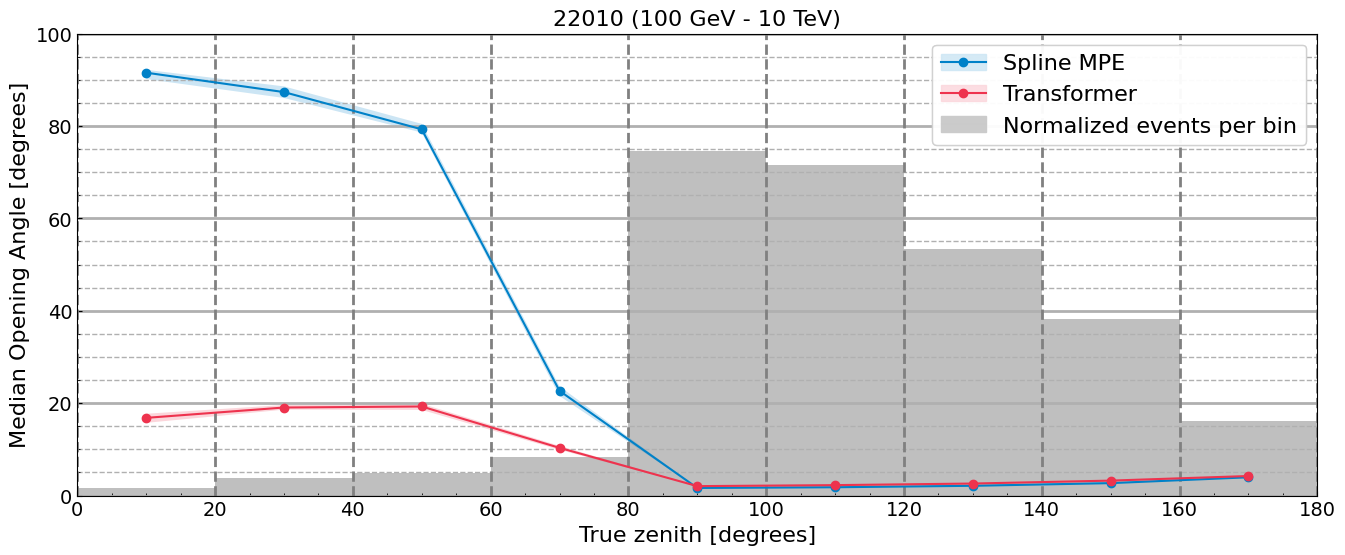

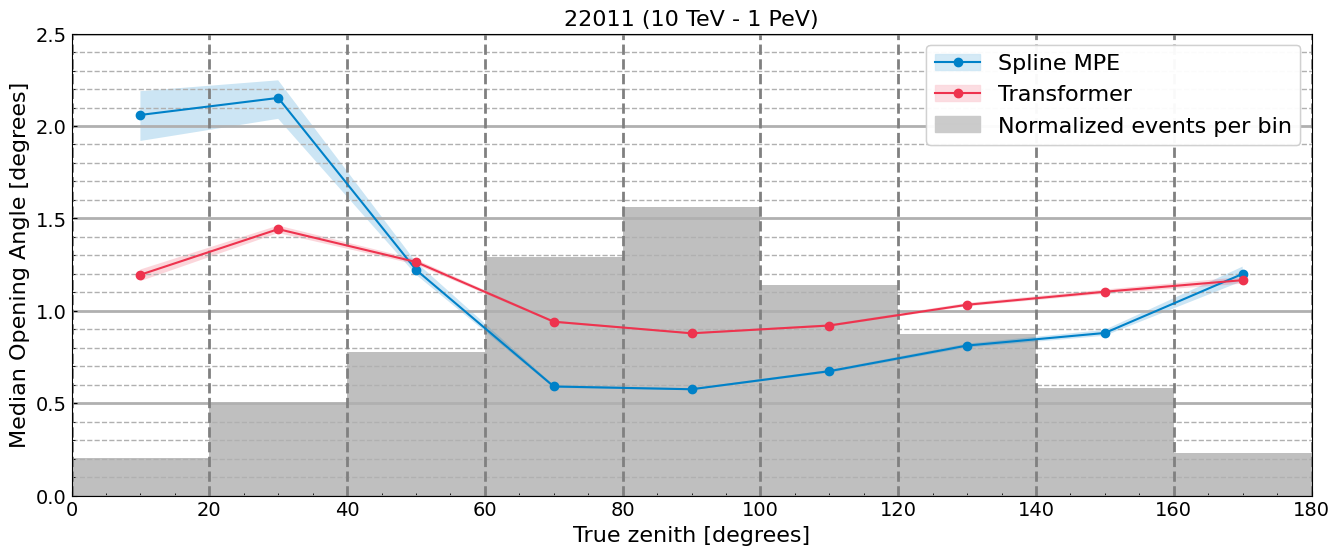

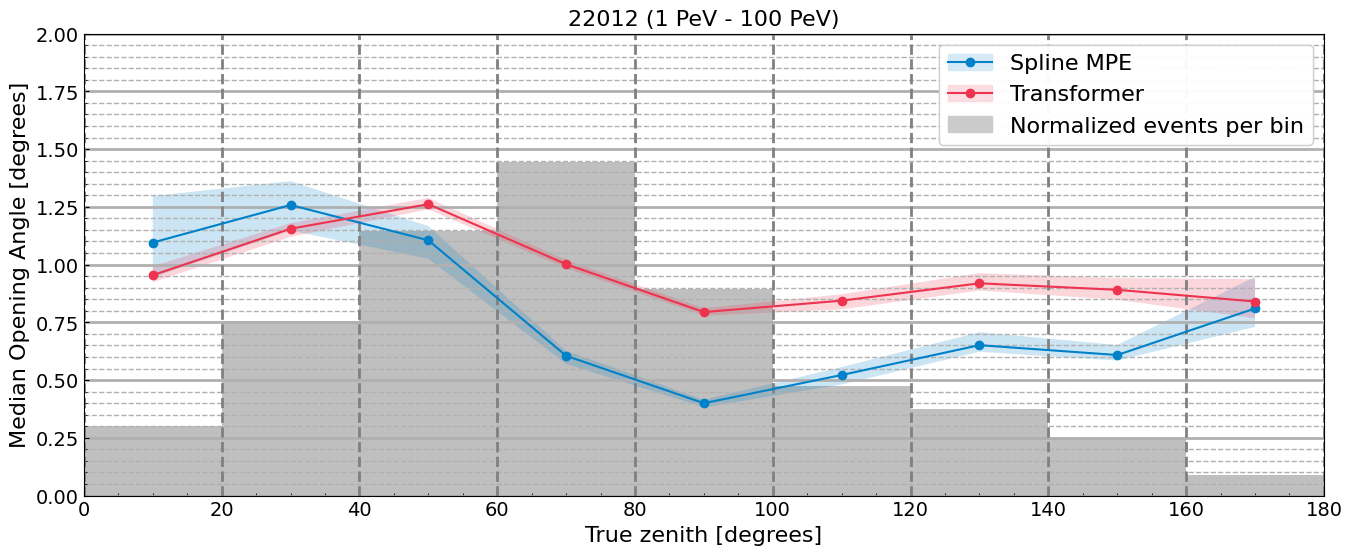

In [ ]:
bin_centers_zenith = (zenith_bins[:-1] + zenith_bins[1:]) / 2


# make 3 separate plots for 22010, 22011, 22012
fig, ax = plt.subplots(figsize=(16, 6))

marker_handles = [plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[0], label='Spline MPE'),
                    plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[1], label='Transformer'),
                    plt.Line2D([0], [0], marker=None, linestyle=None, color='gray', alpha=0.01, label='Normalized events per bin'),]

shaded_handles = [plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='Spline MPE'),
                    plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='Transformer'),
                    plt.fill_between([], [], color='black', alpha=1, label='Normalized events per bin')]

# gray dashed lines at bin edges
for i in range(len(zenith_bins)):
    ax.axvline(x=zenith_bins[i], color='gray', linestyle='--', linewidth=2)

# plot hist22010 as gray bars
ax.bar(bin_centers_zenith, hist22010*95, width=np.diff(zenith_bins), color='gray', alpha=0.5, label='Normalized events per bin')
ax.plot(bin_centers_zenith, median_opening_angle_zenith_spline_mpe_22010, marker='o', linestyle='-', label='Spline MPE')
ax.plot(bin_centers_zenith, median_opening_angle_zenith_22010, marker='o', linestyle='-', label='IceCube Transformer')
ax.fill_between(bin_centers_zenith, lower_bound_zenith_spline_mpe_22010, upper_bound_zenith_spline_mpe_22010, alpha=0.2)
ax.fill_between(bin_centers_zenith, lower_bound_zenith_22010, upper_bound_zenith_22010, alpha=0.2)

ax.set_xlim(0, 180)
ax.set_ylim(0, 100)

ax.set_xlabel('True zenith [degrees]', fontsize=16)
ax.set_ylabel('Median Opening Angle [degrees]', fontsize=16)
ax.set_title('22010 (100 GeV - 10 TeV)', fontsize=16)
ax.grid(axis='y', linewidth=2)
# enable minor grid lines in y
ax.grid(which='minor', linestyle='--', linewidth=1, axis='y')
# tick labels size 14
ax.tick_params(axis='both', which='major', labelsize=14)

shaded_legend = ax.legend(handles=shaded_handles, loc='upper right', fontsize=16)
marker_legend = ax.legend(handles=marker_handles, loc='upper right', fontsize=16)
ax.add_artist(shaded_legend)  # add the model legend to the plot

plt.show()

# make 3 separate plots for 22010, 22011, 22012
fig, ax2 = plt.subplots(figsize=(16, 6))

marker_handles = [plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[0], label='Spline MPE'),
                    plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[1], label='Transformer'),
                    plt.Line2D([0], [0], marker=None, linestyle=None, color='gray', alpha=0.01, label='Normalized events per bin'),]

shaded_handles = [plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='Spline MPE'),
                    plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='Transformer'),
                    plt.fill_between([], [], color='black', alpha=1, label='Normalized events per bin')]

for i in range(len(zenith_bins)):
    ax2.axvline(x=zenith_bins[i], color='gray', linestyle='--', linewidth=2)

ax2.bar(bin_centers_zenith, hist22011*2.5, width=np.diff(zenith_bins), color='gray', alpha=0.5, label='Normalized events per bin')
ax2.plot(bin_centers_zenith, median_opening_angle_zenith_spline_mpe_22011, marker='o', linestyle='-', label='Spline MPE')
ax2.fill_between(bin_centers_zenith, lower_bound_zenith_spline_mpe_22011, upper_bound_zenith_spline_mpe_22011, alpha=0.2)
ax2.plot(bin_centers_zenith, median_opening_angle_zenith_22011, marker='o', linestyle='-', label='IceCube Transformer')
ax2.fill_between(bin_centers_zenith, lower_bound_zenith_22011, upper_bound_zenith_22011, alpha=0.2)

ax2.set_xlim(0, 180)
ax2.set_ylim(0, 2.5)
ax2.set_xlabel('True zenith [degrees]', fontsize=16)
ax2.set_ylabel('Median Opening Angle [degrees]', fontsize=16)
ax2.set_title('22011 (10 TeV - 1 PeV)', fontsize=16)
ax2.legend(loc='upper right')
ax2.grid(axis='y', linewidth=2)
ax2.grid(which='minor', linestyle='--', linewidth=1, axis='y')
# tick labels size 14
ax2.tick_params(axis='both', which='major', labelsize=14)

shaded_legend = ax2.legend(handles=shaded_handles, loc='upper right', fontsize=16)
marker_legend = ax2.legend(handles=marker_handles, loc='upper right', fontsize=16)
ax2.add_artist(shaded_legend)  # add the model legend to the plot
plt.show()

fig, ax3 = plt.subplots(figsize=(16, 6))

marker_handles = [plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[0], label='Spline MPE'),
                    plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[1], label='Transformer'),
                    plt.Line2D([0], [0], marker=None, linestyle=None, color='gray', alpha=0.01, label='Normalized events per bin'),]

shaded_handles = [plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='Spline MPE'),
                    plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='Transformer'),
                    plt.fill_between([], [], color='black', alpha=1, label='Normalized events per bin')]

for i in range(len(zenith_bins)):
    ax3.axvline(x=zenith_bins[i], color='gray', linestyle='--', linewidth=2)


ax3.bar(bin_centers_zenith, hist22012*2, width=np.diff(zenith_bins), color='gray', alpha=0.5, label='Normalized events per bin')
ax3.plot(bin_centers_zenith, median_opening_angle_zenith_spline_mpe_22012, marker='o', linestyle='-', label='Spline MPE')
ax3.fill_between(bin_centers_zenith, lower_bound_zenith_spline_mpe_22012, upper_bound_zenith_spline_mpe_22012, alpha=0.2)
ax3.plot(bin_centers_zenith, median_opening_angle_zenith_22012, marker='o', linestyle='-', label='IceCube Transformer')
ax3.fill_between(bin_centers_zenith, lower_bound_zenith_22012, upper_bound_zenith_22012, alpha=0.2)

ax3.set_xlim(0, 180)
ax3.set_ylim(0, 2)
# remove x tick labels on top plot but keep the ticks
ax3.set_xlabel('True zenith [degrees]', fontsize=16)


ax3.set_ylabel('Median Opening Angle [degrees]', fontsize=16)
ax3.set_title('22012 (1 PeV - 100 PeV)', fontsize=16)
ax3.legend(loc='upper right')
ax3.grid(axis='y', linewidth=2)
ax3.grid(which='minor', linestyle='--', linewidth=1, axis='y')
# tick labels size 14
ax3.tick_params(axis='both', which='major', labelsize=14)

shaded_legend = ax3.legend(handles=shaded_handles, loc='upper right', fontsize=16)
marker_legend = ax3.legend(handles=marker_handles, loc='upper right', fontsize=16)
ax3.add_artist(shaded_legend)  # add the model legend to the plot
plt.show()

### 🖼️ **Figures 7.30/7.31**  
**Full zenith and azimuth distributions**  
Distributions of the true and predicted zenith/azimuth angle for the test set (all datasets combined).

In [ ]:
# plot the distribution of true azimuth and zenith angles vs the predicted azimuth and zenith angles
pred_zenith_22010 = np.arccos(z_pred_22010/np.sqrt(x_pred_22010**2 + y_pred_22010**2 + z_pred_22010**2))
pred_zenith_22011 = np.arccos(z_pred_22011/np.sqrt(x_pred_22011**2 + y_pred_22011**2 + z_pred_22011**2))
pred_zenith_22012 = np.arccos(z_pred_22012/np.sqrt(x_pred_22012**2 + y_pred_22012**2 + z_pred_22012**2))

truth_zenith_22010 = truth_total_22010['zenith'].values
truth_zenith_22011 = truth_total_22011['zenith'].values
truth_zenith_22012 = truth_total_22012['zenith'].values

pred_azimuth_22010 = np.arctan2(y_pred_22010, x_pred_22010)
pred_azimuth_22011 = np.arctan2(y_pred_22011, x_pred_22011)
pred_azimuth_22012 = np.arctan2(y_pred_22012, x_pred_22012)

# shift the azimuth angles to be in the range [0, 2*pi]
pred_azimuth_22010 = np.where(pred_azimuth_22010 < 0, pred_azimuth_22010 + 2*np.pi, pred_azimuth_22010)
pred_azimuth_22011 = np.where(pred_azimuth_22011 < 0, pred_azimuth_22011 + 2*np.pi, pred_azimuth_22011)
pred_azimuth_22012 = np.where(pred_azimuth_22012 < 0, pred_azimuth_22012 + 2*np.pi, pred_azimuth_22012)

truth_azimuth_22010 = truth_total_22010['azimuth'].values
truth_azimuth_22011 = truth_total_22011['azimuth'].values
truth_azimuth_22012 = truth_total_22012['azimuth'].values

# apply the TC_CC mask
pred_zenith_22010 = pred_zenith_22010[TC_CC_mask_22010]
pred_zenith_22011 = pred_zenith_22011[TC_CC_mask_22011]
pred_zenith_22012 = pred_zenith_22012[TC_CC_mask_22012]

truth_zenith_22010 = truth_zenith_22010[TC_CC_mask_22010]
truth_zenith_22011 = truth_zenith_22011[TC_CC_mask_22011]
truth_zenith_22012 = truth_zenith_22012[TC_CC_mask_22012]

pred_azimuth_22010 = pred_azimuth_22010[TC_CC_mask_22010]
pred_azimuth_22011 = pred_azimuth_22011[TC_CC_mask_22011]
pred_azimuth_22012 = pred_azimuth_22012[TC_CC_mask_22012]

truth_azimuth_22010 = truth_azimuth_22010[TC_CC_mask_22010]
truth_azimuth_22011 = truth_azimuth_22011[TC_CC_mask_22011]
truth_azimuth_22012 = truth_azimuth_22012[TC_CC_mask_22012]

# concatenate the predictions and truths
pred_zenith = np.concatenate((pred_zenith_22010, pred_zenith_22011, pred_zenith_22012))
truth_zenith = np.concatenate((truth_zenith_22010, truth_zenith_22011, truth_zenith_22012))
pred_azimuth = np.concatenate((pred_azimuth_22010, pred_azimuth_22011, pred_azimuth_22012))
truth_azimuth = np.concatenate((truth_azimuth_22010, truth_azimuth_22011, truth_azimuth_22012))

In [ ]:
# convert to degrees
pred_zenith = np.degrees(pred_zenith)
truth_zenith = np.degrees(truth_zenith)
pred_azimuth = np.degrees(pred_azimuth)
truth_azimuth = np.degrees(truth_azimuth)

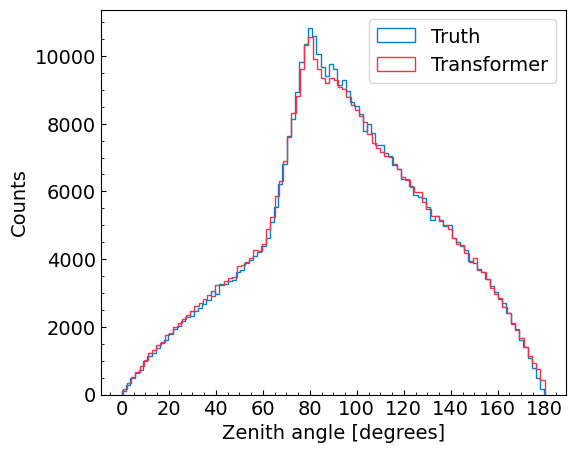

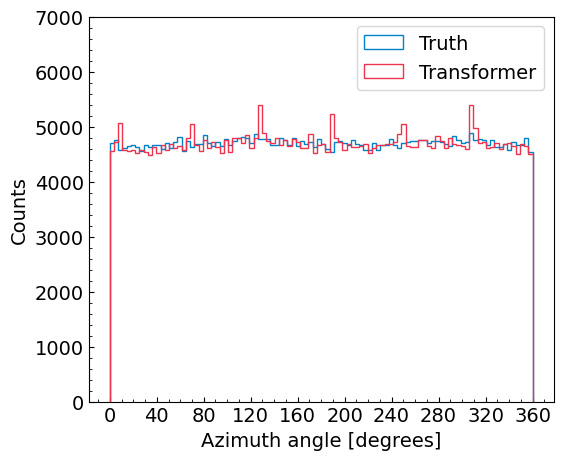

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(truth_zenith, bins=100, histtype='step', label='Truth')
ax.hist(pred_zenith, bins=100, histtype='step',label='Transformer')
plt.xlabel('Zenith angle [degrees]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
# ticks every 20 degrees (including 180)
plt.xticks(np.arange(0, 181, 20), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(truth_azimuth, bins=100, histtype='step',label='Truth')
ax.hist(pred_azimuth, bins=100, histtype='step',label='Transformer')

# find the 6 modes of pred_azimuth and plot vertical lines
pred_azimuth_bins = np.linspace(0, 2*np.pi, 100)
pred_azimuth_hist, _ = np.histogram(pred_azimuth, bins=pred_azimuth_bins)
pred_azimuth_modes = np.argsort(pred_azimuth_hist)[-10:]
bin_centers = 0.5*(pred_azimuth_bins[:-1] + pred_azimuth_bins[1:])
plt.ylim(0, 7000)
plt.yticks(fontsize=14)
plt.xlabel('Azimuth angle [degrees]', fontsize=14)
plt.ylabel('Counts',    fontsize=14)
plt.legend(loc='upper right', fontsize=14)
# ticks every 40 degrees (including 360)
plt.xticks(np.arange(0, 361, 40), fontsize=14)
plt.show()

### 🖼️ **Figure 7.32**  
**Azimuth peaks**  
Graphical representation of the direction of the six peaks in azimuthal direction of
figure 7.31, with respect to the IceCube string locations. Blue dots indicate the location of the
strings, while the red lines (drawn through the origin) show the azimuthal directions at the bin
centers of the first six modes.

In [ ]:
path = "/groups/icecube/cyan/factory/DOMification/dom_ref_pos/unique_string_dom_completed.csv"
dom_pos = pd.read_csv(path)
dom_pos = dom_pos[dom_pos['dom_number'] == 1]
dom_pos = dom_pos[['dom_x', 'dom_y', 'dom_z']]

In [ ]:
hist, bins = np.histogram(pred_azimuth, bins=100)
bin_centers = 0.5*(bins[:-1] + bins[1:])
# find the 6 modes of pred_azimuth
pred_azimuth_modes = np.argsort(hist)[-6:]
# find the bin centers of the modes
pred_azimuth_modes = bin_centers[pred_azimuth_modes]

# convert to radians
pred_azimuth_modes = np.radians(pred_azimuth_modes)

# sort the modes
pred_azimuth_modes = np.sort(pred_azimuth_modes)

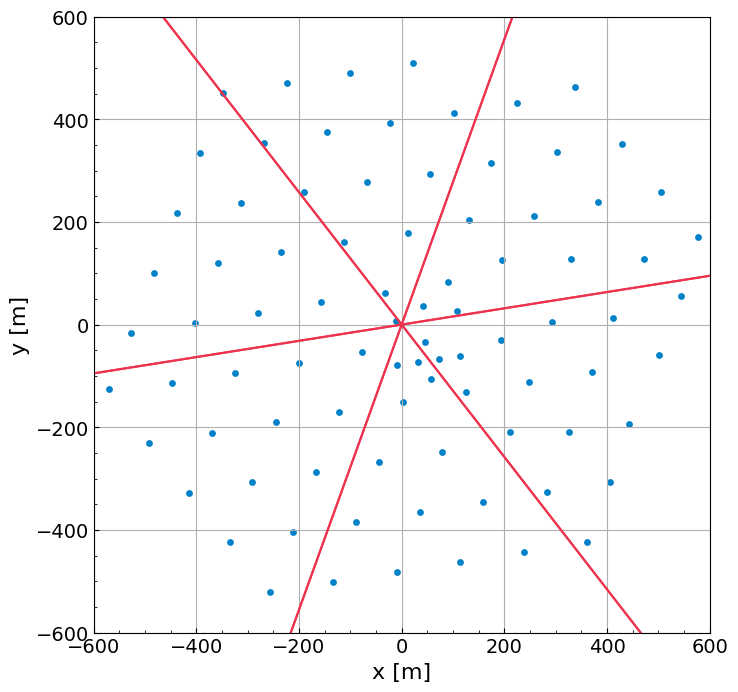

In [ ]:
azimuths = pred_azimuth_modes

# plot lines for each azimuth going through the origin
plt.figure(figsize=(8, 8))
for azimuth in azimuths:
    x = np.linspace(-700, 700, 100)
    y = np.tan(azimuth) * x
    plt.plot(x, y, color=custom_colors[1])
plt.scatter(dom_pos['dom_x'], dom_pos['dom_y'], s=15, color=custom_colors[0])
plt.xlim(-600, 600)
plt.ylim(-600, 600)
plt.xlabel('x [m]', fontsize=16)
plt.ylabel('y [m]', fontsize=16)
# equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
# ticksize 14
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### 🖼️ **Figures 7.33/7.34**  
**Distribution of bias error**  
Distribution of the error
between true and predicted zenith/azimuth angle by the
transformer for the 22010, 22011 and 22012
datasets. The dashed line indicates an error of
0◦.

22010 zenith error:
count    159243.000000
mean         -0.244251
std          17.238124
min        -163.966780
25%          -1.416453
50%          -0.138846
75%           1.234437
max         162.177462
dtype: float64

22011 zenith error:
count    182504.000000
mean         -0.403047
std           6.656853
min        -144.527892
25%          -0.836876
50%          -0.319691
75%           0.228962
max         147.205208
dtype: float64

22012 zenith error:
count    18082.000000
mean        -0.637584
std          6.868714
min       -158.774451
25%         -0.929394
50%         -0.421612
75%          0.091826
max        124.317613
dtype: float64


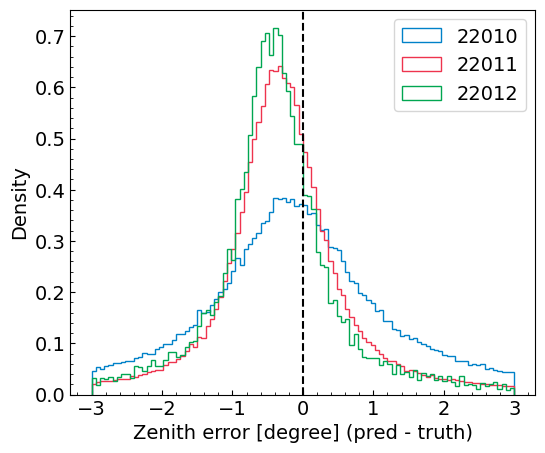

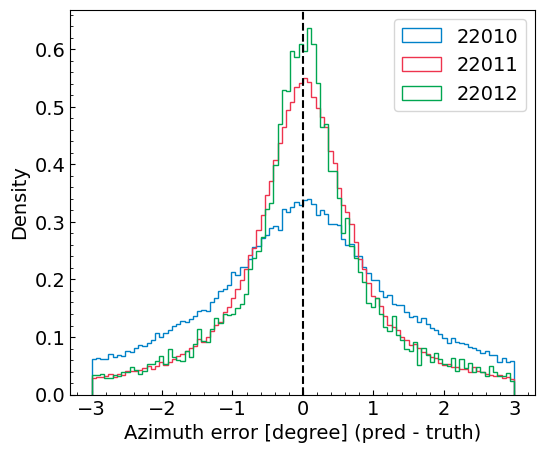

In [ ]:
zenith_pred_22010 = np.arccos(z_pred_22010/np.sqrt(x_pred_22010**2 + y_pred_22010**2 + z_pred_22010**2))
zenith_pred_22011 = np.arccos(z_pred_22011/np.sqrt(x_pred_22011**2 + y_pred_22011**2 + z_pred_22011**2))
zenith_pred_22012 = np.arccos(z_pred_22012/np.sqrt(x_pred_22012**2 + y_pred_22012**2 + z_pred_22012**2))

azimuth_pred_22010 = np.arctan2(y_pred_22010, x_pred_22010)
azimuth_pred_22011 = np.arctan2(y_pred_22011, x_pred_22011)
azimuth_pred_22012 = np.arctan2(y_pred_22012, x_pred_22012)

zenith_truth_22010 = np.arccos(z_truth_22010/np.sqrt(x_truth_22010**2 + y_truth_22010**2 + z_truth_22010**2))
zenith_truth_22011 = np.arccos(z_truth_22011/np.sqrt(x_truth_22011**2 + y_truth_22011**2 + z_truth_22011**2))
zenith_truth_22012 = np.arccos(z_truth_22012/np.sqrt(x_truth_22012**2 + y_truth_22012**2 + z_truth_22012**2))

azimuth_truth_22010 = np.arctan2(y_truth_22010, x_truth_22010)
azimuth_truth_22011 = np.arctan2(y_truth_22011, x_truth_22011)
azimuth_truth_22012 = np.arctan2(y_truth_22012, x_truth_22012)

zenith_error_22010 = zenith_pred_22010 - zenith_truth_22010
zenith_error_22011 = zenith_pred_22011 - zenith_truth_22011
zenith_error_22012 = zenith_pred_22012 - zenith_truth_22012

azimuth_error_22010 = azimuth_pred_22010 - azimuth_truth_22010
azimuth_error_22011 = azimuth_pred_22011 - azimuth_truth_22011
azimuth_error_22012 = azimuth_pred_22012 - azimuth_truth_22012

# convert to degrees
zenith_error_22010 = np.degrees(zenith_error_22010)
zenith_error_22011 = np.degrees(zenith_error_22011)
zenith_error_22012 = np.degrees(zenith_error_22012)
azimuth_error_22010 = np.degrees(azimuth_error_22010)
azimuth_error_22011 = np.degrees(azimuth_error_22011)
azimuth_error_22012 = np.degrees(azimuth_error_22012)

# print describe of zenith error
print('22010 zenith error:')
print(pd.Series(zenith_error_22010[TC_CC_mask_22010 & lvl3_mask_22010]).describe())
print('\n22011 zenith error:')
print(pd.Series(zenith_error_22011[TC_CC_mask_22011 & lvl3_mask_22011]).describe())
print('\n22012 zenith error:')
print(pd.Series(zenith_error_22012[TC_CC_mask_22012 & lvl3_mask_22012]).describe())

# plot the distribution of zenith and azimuth errors
fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(zenith_error_22010[TC_CC_mask_22010 & lvl3_mask_22010], bins=100, range=(-3,3), histtype='step', label='22010', density=True)
ax.hist(zenith_error_22011[TC_CC_mask_22011 & lvl3_mask_22011], bins=100, range=(-3,3),histtype='step', label='22011', density=True)
ax.hist(zenith_error_22012[TC_CC_mask_22012 & lvl3_mask_22012], bins=100, range=(-3,3),histtype='step', label='22012', density=True)
ax.set_xlabel('Zenith error [degree] (pred - truth)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.legend(fontsize=14)

# dashed line at 0
ax.axvline(0, color='black', linestyle='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(azimuth_error_22010[TC_CC_mask_22010 & lvl3_mask_22010], bins=100, range=(-3,3),histtype='step', label='22010', density=True)
ax.hist(azimuth_error_22011[TC_CC_mask_22011 & lvl3_mask_22011], bins=100, range=(-3,3),histtype='step', label='22011', density=True)
ax.hist(azimuth_error_22012[TC_CC_mask_22012 & lvl3_mask_22012], bins=100, range=(-3,3),histtype='step', label='22012', density=True)
ax.set_xlabel('Azimuth error [degree] (pred - truth)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.legend(fontsize=14)

# dashed line at 0
ax.axvline(0, color='black', linestyle='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 🖼️ **Figure 7.35**  
**Zenith error as function of zenith**  
Median error in zenith prediction for the 22011 and 22012 datasets as a function of
true zenith direction. The shaded area indicates the 1σ confidence bounds on the sample median.

In [ ]:
zenith_truth_22010 = np.degrees(zenith_truth_22010)
zenith_truth_22011 = np.degrees(zenith_truth_22011)
zenith_truth_22012 = np.degrees(zenith_truth_22012)

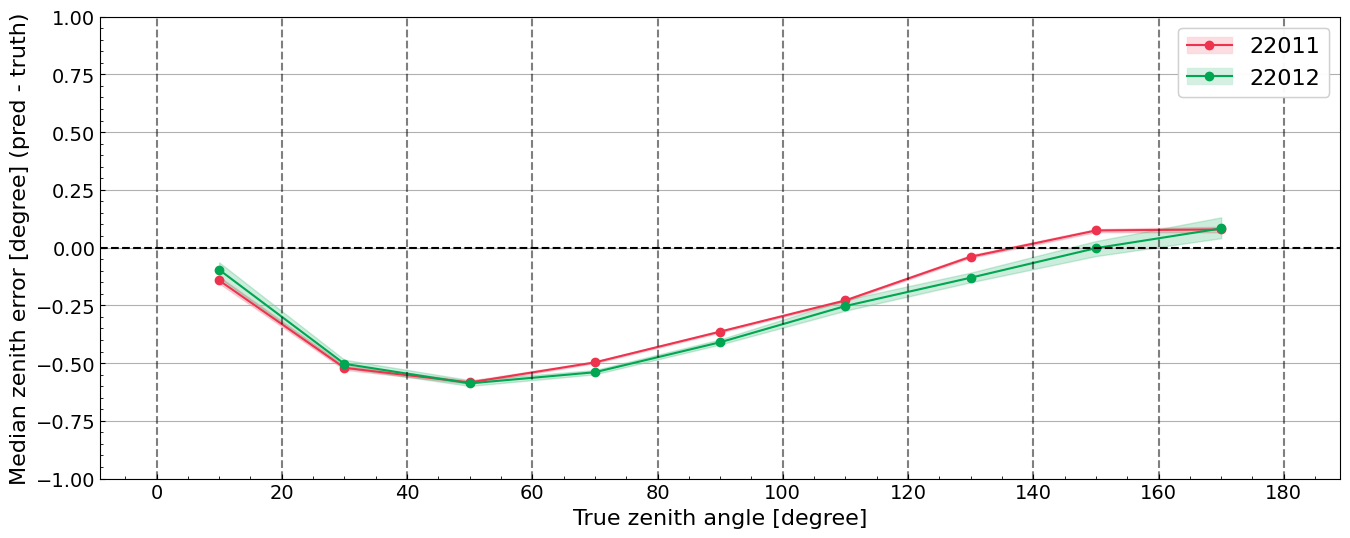

In [ ]:
# zenith error binned in true zenith
median_errors_zenith_22010 = []
median_errors_zenith_22011 = []
median_errors_zenith_22012 = []

upper_22010 = []
lower_22010 = []
upper_22011 = []
lower_22011 = []
upper_22012 = []
lower_22012 = []

zenith_bins = np.linspace(0, 180, 10)
for i in range(len(zenith_bins)-1):
    mask_22010 = (zenith_truth_22010 >= zenith_bins[i]) & (zenith_truth_22010 < zenith_bins[i+1])
    mask_22011 = (zenith_truth_22011 >= zenith_bins[i]) & (zenith_truth_22011 < zenith_bins[i+1])
    mask_22012 = (zenith_truth_22012 >= zenith_bins[i]) & (zenith_truth_22012 < zenith_bins[i+1])

    median_errors_zenith_22010.append(np.median(zenith_error_22010[mask_22010 & TC_CC_mask_22010 & lvl3_mask_22010]))
    median_errors_zenith_22011.append(np.median(zenith_error_22011[mask_22011 & TC_CC_mask_22011 & lvl3_mask_22011]))
    median_errors_zenith_22012.append(np.median(zenith_error_22012[mask_22012 & TC_CC_mask_22012 & lvl3_mask_22012]))

    sorted_zenith_22010 = np.sort(zenith_error_22010[mask_22010 & TC_CC_mask_22010 & lvl3_mask_22010])
    sorted_zenith_22011 = np.sort(zenith_error_22011[mask_22011 & TC_CC_mask_22011 & lvl3_mask_22011])
    sorted_zenith_22012 = np.sort(zenith_error_22012[mask_22012 & TC_CC_mask_22012 & lvl3_mask_22012])

    lower_bound, upper_bound = get_quantile_bounds(0.5, len(sorted_zenith_22010))
    lower_22010.append(sorted_zenith_22010[lower_bound])
    upper_22010.append(sorted_zenith_22010[upper_bound])
    lower_bound, upper_bound = get_quantile_bounds(0.5, len(sorted_zenith_22011))
    lower_22011.append(sorted_zenith_22011[lower_bound])
    upper_22011.append(sorted_zenith_22011[upper_bound])
    lower_bound, upper_bound = get_quantile_bounds(0.5, len(sorted_zenith_22012))
    lower_22012.append(sorted_zenith_22012[lower_bound])
    upper_22012.append(sorted_zenith_22012[upper_bound])


# plot
fig, ax = plt.subplots(figsize=(16, 6))
#ax.plot(0.5*(zenith_bins[:-1] + zenith_bins[1:]), median_errors_zenith_22010, label='22010', marker='o')
#ax.fill_between(0.5*(zenith_bins[:-1] + zenith_bins[1:]), lower_22010, upper_22010, alpha=0.2, color=custom_colors[0])
ax.plot(0.5*(zenith_bins[:-1] + zenith_bins[1:]), median_errors_zenith_22011, label='22011', marker='o', color=custom_colors[1])
ax.fill_between(0.5*(zenith_bins[:-1] + zenith_bins[1:]), lower_22011, upper_22011, alpha=0.2, color=custom_colors[1])
ax.plot(0.5*(zenith_bins[:-1] + zenith_bins[1:]), median_errors_zenith_22012, label='22012', marker='o', color=custom_colors[2])
ax.fill_between(0.5*(zenith_bins[:-1] + zenith_bins[1:]), lower_22012, upper_22012, alpha=0.2, color=custom_colors[2])
ax.set_xlabel('True zenith angle [degree]', fontsize=16)
ax.set_ylabel('Median zenith error [degree] (pred - truth)', fontsize=16)

# create a new legend for the markers
marker_handles = [#plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[0], label='22010'),
                    plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[1], label='22011'),
                    plt.Line2D([0], [0], marker='o', linestyle='-', color=custom_colors[2], label='22012')]

shaded_handles = [#plt.fill_between([], [], color=custom_colors[0], alpha=0.8, label='22010'),
                    plt.fill_between([], [], color=custom_colors[1], alpha=0.8, label='22011'),
                    plt.fill_between([], [], color=custom_colors[2], alpha=0.8, label='22012')]


# add both legends to the plot
shaded_legend = ax.legend(handles=shaded_handles, loc='upper right', fontsize=16)
# add marker legend to top middle
marker_legend = ax.legend(handles=marker_handles, loc='upper right', fontsize=16)
ax.add_artist(shaded_legend)  # add the model legend to the plot

plt.ylim(-1,1)
# dashed vertical lines at bin edges
for bin_edge in zenith_bins:
    ax.axvline(bin_edge, color='black', linestyle='--', alpha=0.5)
plt.grid(axis='y')
# dashed line at 0
ax.axhline(0, color='black', linestyle='--')
# ticks at bin edges
plt.xticks(zenith_bins, fontsize=14)
plt.yticks(fontsize=14)
plt.show()